In [1]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf /content/sample_data

Mounted at /content/drive


In [2]:
!pip install torch torchvision matplotlib


In [ ]:
!pip install requests
!pip install pydrive


In [ ]:
!pip install pydrive2


In [ ]:
import os
import shutil
import random

# Paths
source_dataset_path = '/content/'
destination_path = '/content/drive/MyDrive/po'
train_images_path = os.path.join(destination_path, 'train_images')
val_images_path = os.path.join(destination_path, 'val_images')
test_images_path = os.path.join(destination_path, 'test_images')
train_ann_path = os.path.join(destination_path, 'train_ann')
val_ann_path = os.path.join(destination_path, 'val_ann')
test_ann_path = os.path.join(destination_path, 'test_ann')

# Create directories if they do not exist
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(train_ann_path, exist_ok=True)
os.makedirs(val_ann_path, exist_ok=True)
os.makedirs(test_ann_path, exist_ok=True)

# Get all image files and corresponding annotation files
image_files = [f for f in os.listdir(source_dataset_path) if f.endswith('.bmp')]
annotation_files = [f.replace('.bmp', '.xml') for f in image_files]

# Check if there are any files to process
if not image_files:
    print("No image files found in the dataset path.")
else:
    # Shuffle the data
    combined = list(zip(image_files, annotation_files))
    random.shuffle(combined)

    # Unzipping the combined list
    if combined:
        image_files[:], annotation_files[:] = zip(*combined)
    else:
        image_files, annotation_files = [], []

    # Split the data
    total_images = len(image_files)
    train_split = int(0.8 * total_images)
    val_split = int(0.1 * total_images) + train_split

    train_images = image_files[:train_split]
    val_images = image_files[train_split:val_split]
    test_images = image_files[val_split:]

    train_annotations = annotation_files[:train_split]
    val_annotations = annotation_files[train_split:val_split]
    test_annotations = annotation_files[val_split:]

    # Function to move files
    def move_files(files, source_dir, dest_dir):
        for file in files:
            try:
                shutil.move(os.path.join(source_dir, file), os.path.join(dest_dir, file))
            except FileNotFoundError:
                print(f"File not found: {file}. Skipping.")
            except Exception as e:
                print(f"Error moving file {file}: {e}")

    # Move the files
    move_files(train_images, source_dataset_path, train_images_path)
    move_files(val_images, source_dataset_path, val_images_path)
    move_files(test_images, source_dataset_path, test_images_path)

    move_files(train_annotations, source_dataset_path, train_ann_path)
    move_files(val_annotations, source_dataset_path, val_ann_path)
    move_files(test_annotations, source_dataset_path, test_ann_path)

    print("Dataset split completed successfully.")


No image files found in the dataset path.


In [ ]:
import os
import shutil
import random

# Paths
source_dataset_path = '/content/'  # Update this to your dataset source path
destination_path = '/content/drive/MyDrive/po'

# Define sub-directories for train, validation, and test splits
train_images_path = os.path.join(destination_path, 'train_images')
val_images_path = os.path.join(destination_path, 'val_images')
test_images_path = os.path.join(destination_path, 'test_images')
train_ann_path = os.path.join(destination_path, 'train_ann')
val_ann_path = os.path.join(destination_path, 'val_ann')
test_ann_path = os.path.join(destination_path, 'test_ann')

# Create directories if they do not exist
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(train_ann_path, exist_ok=True)
os.makedirs(val_ann_path, exist_ok=True)
os.makedirs(test_ann_path, exist_ok=True)

# Get all image files and corresponding annotation files
image_files = [f for f in os.listdir(source_dataset_path) if f.endswith('.bmp')]
annotation_files = [f.replace('.bmp', '.xml') for f in image_files]

# Check if there are any files to process
if not image_files:
    print("No image files found in the dataset path.")
else:
    # Shuffle the data
    combined = list(zip(image_files, annotation_files))
    random.shuffle(combined)

    # Unzip the combined list
    if combined:
        image_files[:], annotation_files[:] = zip(*combined)
    else:
        image_files, annotation_files = [], []

    # Split the data
    total_images = len(image_files)
    train_split = int(0.8 * total_images)
    val_split = int(0.1 * total_images) + train_split

    train_images = image_files[:train_split]
    val_images = image_files[train_split:val_split]
    test_images = image_files[val_split:]

    train_annotations = annotation_files[:train_split]
    val_annotations = annotation_files[train_split:val_split]
    test_annotations = annotation_files[val_split:]

    # Function to move files
    def move_files(files, source_dir, dest_dir):
        for file in files:
            try:
                src_file = os.path.join(source_dir, file)
                dst_file = os.path.join(dest_dir, file)
                if os.path.exists(src_file):
                    shutil.move(src_file, dst_file)
                else:
                    print(f"File not found: {file}. Skipping.")
            except FileNotFoundError:
                print(f"File not found: {file}. Skipping.")
            except Exception as e:
                print(f"Error moving file {file}: {e}")

    # Move the files
    print("Moving training images and annotations...")
    move_files(train_images, source_dataset_path, train_images_path)
    move_files(train_annotations, source_dataset_path, train_ann_path)

    print("Moving validation images and annotations...")
    move_files(val_images, source_dataset_path, val_images_path)
    move_files(val_annotations, source_dataset_path, val_ann_path)

    print("Moving test images and annotations...")
    move_files(test_images, source_dataset_path, test_images_path)
    move_files(test_annotations, source_dataset_path, test_ann_path)

    print("Dataset split completed successfully.")


No image files found in the dataset path.


In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
import os
import xml.etree.ElementTree as ET
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, img_dir, ann_dir, transforms=None):
        self.img_dir = img_dir
        self.ann_dir = ann_dir
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(img_dir)))

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.imgs[idx])
        ann_path = os.path.join(self.ann_dir, os.path.splitext(self.imgs[idx])[0] + '.xml')
        img = Image.open(img_path).convert("RGB")

        tree = ET.parse(ann_path)
        root = tree.getroot()
        boxes = []
        labels = []
        for obj in root.findall("object"):
            xmin = int(obj.find("bndbox").find("xmin").text)
            ymin = int(obj.find("bndbox").find("ymin").text)
            xmax = int(obj.find("bndbox").find("xmax").text)
            ymax = int(obj.find("bndbox").find("ymax").text)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(1)  # Assuming all annotations are for 'stenosis'

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

# Paths to your images and annotations
train_img_dir = '/content/drive/MyDrive/po/train_images'
train_ann_dir = '/content/drive/MyDrive/po/train_ann'
val_img_dir = '/content/drive/MyDrive/po/val_images'
val_ann_dir = '/content/drive/MyDrive/po/val_ann'

# Create the datasets and data loaders
train_dataset = CustomDataset(img_dir=train_img_dir, ann_dir=train_ann_dir, transforms=T.Compose([T.ToTensor()]))
val_dataset = CustomDataset(img_dir=val_img_dir, ann_dir=val_ann_dir, transforms=T.Compose([T.ToTensor()]))

train_data_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_data_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Load pre-trained Faster R-CNN model with ResNet-50 backbone
backbone = resnet_fpn_backbone('resnet50', pretrained=True)
model = FasterRCNN(backbone, num_classes=2)

# Move model to the appropriate device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Learning rate scheduler
lr_scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# Training function
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    for i, (images, targets) in enumerate(tqdm(data_loader, desc=f"Epoch [{epoch+1}/10]")):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if i % 10 == 0:  # Print loss every 10 steps
            print(f"Epoch [{epoch+1}/10], Step [{i}/{len(data_loader)}], Loss: {losses.item()}")

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_data_loader, device, epoch)
    lr_scheduler.step()

# Save the Faster R-CNN model to Google Drive
model_save_path = '/content/drive/MyDrive/faster_rcnn_resnet50.pth'
torch.save(model.state_dict(), model_save_path)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676

Epoch [1/10], Step [0/1665], Loss: 1.2942039966583252


Epoch [1/10]:   1%|          | 11/1665 [01:51<3:09:31,  6.87s/it]

Epoch [1/10], Step [10/1665], Loss: 0.29229170083999634


Epoch [1/10]:   1%|▏         | 21/1665 [02:56<3:00:06,  6.57s/it]

Epoch [1/10], Step [20/1665], Loss: 0.11704685539007187


Epoch [1/10]:   2%|▏         | 31/1665 [04:00<2:51:25,  6.29s/it]

Epoch [1/10], Step [30/1665], Loss: 0.16395707428455353


Epoch [1/10]:   2%|▏         | 41/1665 [05:03<2:51:55,  6.35s/it]

Epoch [1/10], Step [40/1665], Loss: 0.17578819394111633


Epoch [1/10]:   3%|▎         | 51/1665 [06:07<2:51:10,  6.36s/it]

Epoch [1/10], Step [50/1665], Loss: 0.31242766976356506


Epoch [1/10]:   4%|▎         | 61/1665 [07:10<2:51:02,  6.40s/it]

Epoch [1/10], Step [60/1665], Loss: 0.1517554670572281


Epoch [1/10]:   4%|▍         | 71/1665 [08:13<2:48:22,  6.34s/it]

Epoch [1/10], Step [70/1665], Loss: 0.22477252781391144


Epoch [1/10]:   5%|▍         | 81/1665 [09:17<2:52:07,  6.52s/it]

Epoch [1/10], Step [80/1665], Loss: 0.19489151239395142


Epoch [1/10]:   5%|▌         | 91/1665 [10:19<2:43:55,  6.25s/it]

Epoch [1/10], Step [90/1665], Loss: 0.22985513508319855


Epoch [1/10]:   6%|▌         | 101/1665 [11:23<2:48:19,  6.46s/it]

Epoch [1/10], Step [100/1665], Loss: 0.19986513257026672


Epoch [1/10]:   7%|▋         | 111/1665 [12:25<2:43:21,  6.31s/it]

Epoch [1/10], Step [110/1665], Loss: 0.19146659970283508


Epoch [1/10]:   7%|▋         | 121/1665 [13:27<2:48:27,  6.55s/it]

Epoch [1/10], Step [120/1665], Loss: 0.2859790623188019


Epoch [1/10]:   8%|▊         | 131/1665 [14:31<2:42:31,  6.36s/it]

Epoch [1/10], Step [130/1665], Loss: 0.2495989352464676


Epoch [1/10]:   8%|▊         | 141/1665 [15:33<2:41:49,  6.37s/it]

Epoch [1/10], Step [140/1665], Loss: 0.17247779667377472


Epoch [1/10]:   9%|▉         | 151/1665 [16:36<2:41:12,  6.39s/it]

Epoch [1/10], Step [150/1665], Loss: 0.17336513102054596


Epoch [1/10]:  10%|▉         | 161/1665 [17:39<2:46:18,  6.63s/it]

Epoch [1/10], Step [160/1665], Loss: 0.2196028083562851


Epoch [1/10]:  10%|█         | 171/1665 [18:41<2:37:14,  6.32s/it]

Epoch [1/10], Step [170/1665], Loss: 0.17568595707416534


Epoch [1/10]:  11%|█         | 181/1665 [19:43<2:34:41,  6.25s/it]

Epoch [1/10], Step [180/1665], Loss: 0.17863869667053223


Epoch [1/10]:  11%|█▏        | 191/1665 [20:45<2:31:57,  6.19s/it]

Epoch [1/10], Step [190/1665], Loss: 0.15194262564182281


Epoch [1/10]:  12%|█▏        | 201/1665 [21:48<2:33:49,  6.30s/it]

Epoch [1/10], Step [200/1665], Loss: 0.16877250373363495


Epoch [1/10]:  13%|█▎        | 211/1665 [22:53<2:37:13,  6.49s/it]

Epoch [1/10], Step [210/1665], Loss: 0.22163026034832


Epoch [1/10]:  13%|█▎        | 221/1665 [23:53<2:24:55,  6.02s/it]

Epoch [1/10], Step [220/1665], Loss: 0.2705727517604828


Epoch [1/10]:  14%|█▍        | 231/1665 [24:54<2:30:21,  6.29s/it]

Epoch [1/10], Step [230/1665], Loss: 0.21128016710281372


Epoch [1/10]:  14%|█▍        | 241/1665 [25:57<2:30:27,  6.34s/it]

Epoch [1/10], Step [240/1665], Loss: 0.16846103966236115


Epoch [1/10]:  15%|█▌        | 251/1665 [26:59<2:28:07,  6.29s/it]

Epoch [1/10], Step [250/1665], Loss: 0.2235158234834671


Epoch [1/10]:  16%|█▌        | 261/1665 [28:01<2:29:10,  6.38s/it]

Epoch [1/10], Step [260/1665], Loss: 0.26060789823532104


Epoch [1/10]:  16%|█▋        | 271/1665 [29:03<2:26:11,  6.29s/it]

Epoch [1/10], Step [270/1665], Loss: 0.2150305211544037


Epoch [1/10]:  17%|█▋        | 281/1665 [30:06<2:27:59,  6.42s/it]

Epoch [1/10], Step [280/1665], Loss: 0.15993985533714294


Epoch [1/10]:  17%|█▋        | 291/1665 [31:08<2:22:08,  6.21s/it]

Epoch [1/10], Step [290/1665], Loss: 0.2511836290359497


Epoch [1/10]:  18%|█▊        | 301/1665 [32:10<2:28:13,  6.52s/it]

Epoch [1/10], Step [300/1665], Loss: 0.19879299402236938


Epoch [1/10]:  19%|█▊        | 311/1665 [33:15<2:22:17,  6.31s/it]

Epoch [1/10], Step [310/1665], Loss: 0.23085518181324005


Epoch [1/10]:  19%|█▉        | 321/1665 [34:16<2:24:12,  6.44s/it]

Epoch [1/10], Step [320/1665], Loss: 0.1845695823431015


Epoch [1/10]:  20%|█▉        | 331/1665 [35:19<2:20:10,  6.30s/it]

Epoch [1/10], Step [330/1665], Loss: 0.25213584303855896


Epoch [1/10]:  20%|██        | 341/1665 [36:22<2:18:54,  6.30s/it]

Epoch [1/10], Step [340/1665], Loss: 0.16916479170322418


Epoch [1/10]:  21%|██        | 351/1665 [37:25<2:20:25,  6.41s/it]

Epoch [1/10], Step [350/1665], Loss: 0.25427156686782837


Epoch [1/10]:  22%|██▏       | 361/1665 [38:29<2:17:51,  6.34s/it]

Epoch [1/10], Step [360/1665], Loss: 0.19198209047317505


Epoch [1/10]:  22%|██▏       | 371/1665 [39:31<2:17:20,  6.37s/it]

Epoch [1/10], Step [370/1665], Loss: 0.24901136755943298


Epoch [1/10]:  23%|██▎       | 381/1665 [40:32<2:11:53,  6.16s/it]

Epoch [1/10], Step [380/1665], Loss: 0.19049040973186493


Epoch [1/10]:  23%|██▎       | 391/1665 [41:35<2:15:13,  6.37s/it]

Epoch [1/10], Step [390/1665], Loss: 0.22347937524318695


Epoch [1/10]:  24%|██▍       | 401/1665 [42:37<2:12:33,  6.29s/it]

Epoch [1/10], Step [400/1665], Loss: 0.15119296312332153


Epoch [1/10]:  25%|██▍       | 411/1665 [43:40<2:15:53,  6.50s/it]

Epoch [1/10], Step [410/1665], Loss: 0.21256959438323975


Epoch [1/10]:  25%|██▌       | 421/1665 [44:42<2:11:30,  6.34s/it]

Epoch [1/10], Step [420/1665], Loss: 0.23935113847255707


Epoch [1/10]:  26%|██▌       | 431/1665 [45:44<2:05:54,  6.12s/it]

Epoch [1/10], Step [430/1665], Loss: 0.15936137735843658


Epoch [1/10]:  26%|██▋       | 441/1665 [46:47<2:07:46,  6.26s/it]

Epoch [1/10], Step [440/1665], Loss: 0.1622333973646164


Epoch [1/10]:  27%|██▋       | 451/1665 [47:52<2:32:08,  7.52s/it]

Epoch [1/10], Step [450/1665], Loss: 0.15554358065128326


Epoch [1/10]:  28%|██▊       | 461/1665 [48:55<2:08:37,  6.41s/it]

Epoch [1/10], Step [460/1665], Loss: 0.21676306426525116


Epoch [1/10]:  28%|██▊       | 471/1665 [49:56<2:00:28,  6.05s/it]

Epoch [1/10], Step [470/1665], Loss: 0.2646503150463104


Epoch [1/10]:  29%|██▉       | 481/1665 [50:57<2:05:43,  6.37s/it]

Epoch [1/10], Step [480/1665], Loss: 0.17723633348941803


Epoch [1/10]:  29%|██▉       | 491/1665 [52:00<2:05:05,  6.39s/it]

Epoch [1/10], Step [490/1665], Loss: 0.14384134113788605


Epoch [1/10]:  30%|███       | 501/1665 [53:01<2:01:15,  6.25s/it]

Epoch [1/10], Step [500/1665], Loss: 0.15752479434013367


Epoch [1/10]:  31%|███       | 511/1665 [54:04<2:02:39,  6.38s/it]

Epoch [1/10], Step [510/1665], Loss: 0.23942241072654724


Epoch [1/10]:  31%|███▏      | 521/1665 [55:06<2:00:22,  6.31s/it]

Epoch [1/10], Step [520/1665], Loss: 0.17789597809314728


Epoch [1/10]:  32%|███▏      | 531/1665 [56:08<1:55:58,  6.14s/it]

Epoch [1/10], Step [530/1665], Loss: 0.1482790857553482


Epoch [1/10]:  32%|███▏      | 541/1665 [57:09<1:54:21,  6.10s/it]

Epoch [1/10], Step [540/1665], Loss: 0.1682230532169342


Epoch [1/10]:  33%|███▎      | 551/1665 [58:11<1:55:16,  6.21s/it]

Epoch [1/10], Step [550/1665], Loss: 0.19123265147209167


Epoch [1/10]:  34%|███▎      | 561/1665 [59:14<1:58:11,  6.42s/it]

Epoch [1/10], Step [560/1665], Loss: 0.17339079082012177


Epoch [1/10]:  34%|███▍      | 571/1665 [1:00:17<1:57:13,  6.43s/it]

Epoch [1/10], Step [570/1665], Loss: 0.188439279794693


Epoch [1/10]:  35%|███▍      | 581/1665 [1:01:19<1:51:22,  6.16s/it]

Epoch [1/10], Step [580/1665], Loss: 0.2194509506225586


Epoch [1/10]:  35%|███▌      | 591/1665 [1:02:21<1:54:13,  6.38s/it]

Epoch [1/10], Step [590/1665], Loss: 0.18521016836166382


Epoch [1/10]:  36%|███▌      | 601/1665 [1:03:24<1:54:49,  6.48s/it]

Epoch [1/10], Step [600/1665], Loss: 0.18748155236244202


Epoch [1/10]:  37%|███▋      | 611/1665 [1:04:24<1:48:33,  6.18s/it]

Epoch [1/10], Step [610/1665], Loss: 0.20820683240890503


Epoch [1/10]:  37%|███▋      | 621/1665 [1:05:25<1:45:23,  6.06s/it]

Epoch [1/10], Step [620/1665], Loss: 0.1495123654603958


Epoch [1/10]:  38%|███▊      | 631/1665 [1:06:25<1:44:54,  6.09s/it]

Epoch [1/10], Step [630/1665], Loss: 0.15945853292942047


Epoch [1/10]:  38%|███▊      | 641/1665 [1:07:25<1:42:42,  6.02s/it]

Epoch [1/10], Step [640/1665], Loss: 0.17083728313446045


Epoch [1/10]:  39%|███▉      | 651/1665 [1:08:27<1:46:55,  6.33s/it]

Epoch [1/10], Step [650/1665], Loss: 0.2211102992296219


Epoch [1/10]:  40%|███▉      | 661/1665 [1:09:30<1:47:41,  6.44s/it]

Epoch [1/10], Step [660/1665], Loss: 0.18231500685214996


Epoch [1/10]:  40%|████      | 671/1665 [1:10:41<1:53:11,  6.83s/it]

Epoch [1/10], Step [670/1665], Loss: 0.1604769378900528


Epoch [1/10]:  41%|████      | 681/1665 [1:11:44<1:45:21,  6.42s/it]

Epoch [1/10], Step [680/1665], Loss: 0.19673693180084229


Epoch [1/10]:  42%|████▏     | 691/1665 [1:12:46<1:44:13,  6.42s/it]

Epoch [1/10], Step [690/1665], Loss: 0.19811542332172394


Epoch [1/10]:  42%|████▏     | 701/1665 [1:13:51<1:45:20,  6.56s/it]

Epoch [1/10], Step [700/1665], Loss: 0.16836002469062805


Epoch [1/10]:  43%|████▎     | 711/1665 [1:14:53<1:38:22,  6.19s/it]

Epoch [1/10], Step [710/1665], Loss: 0.14831286668777466


Epoch [1/10]:  43%|████▎     | 721/1665 [1:15:55<1:39:31,  6.33s/it]

Epoch [1/10], Step [720/1665], Loss: 0.1899808794260025


Epoch [1/10]:  44%|████▍     | 731/1665 [1:16:57<1:37:04,  6.24s/it]

Epoch [1/10], Step [730/1665], Loss: 0.13802587985992432


Epoch [1/10]:  45%|████▍     | 741/1665 [1:17:57<1:37:14,  6.31s/it]

Epoch [1/10], Step [740/1665], Loss: 0.18918931484222412


Epoch [1/10]:  45%|████▌     | 751/1665 [1:19:00<1:36:13,  6.32s/it]

Epoch [1/10], Step [750/1665], Loss: 0.2139519900083542


Epoch [1/10]:  46%|████▌     | 761/1665 [1:20:02<1:34:03,  6.24s/it]

Epoch [1/10], Step [760/1665], Loss: 0.17401690781116486


Epoch [1/10]:  46%|████▋     | 771/1665 [1:21:02<1:30:47,  6.09s/it]

Epoch [1/10], Step [770/1665], Loss: 0.21695423126220703


Epoch [1/10]:  47%|████▋     | 781/1665 [1:22:05<1:30:17,  6.13s/it]

Epoch [1/10], Step [780/1665], Loss: 0.2706534266471863


Epoch [1/10]:  48%|████▊     | 791/1665 [1:23:08<1:35:54,  6.58s/it]

Epoch [1/10], Step [790/1665], Loss: 0.21361277997493744


Epoch [1/10]:  48%|████▊     | 801/1665 [1:24:09<1:30:55,  6.31s/it]

Epoch [1/10], Step [800/1665], Loss: 0.132691890001297


Epoch [1/10]:  49%|████▊     | 811/1665 [1:25:11<1:27:51,  6.17s/it]

Epoch [1/10], Step [810/1665], Loss: 0.16092193126678467


Epoch [1/10]:  49%|████▉     | 821/1665 [1:26:12<1:26:09,  6.13s/it]

Epoch [1/10], Step [820/1665], Loss: 0.1676735281944275


Epoch [1/10]:  50%|████▉     | 831/1665 [1:27:14<1:28:04,  6.34s/it]

Epoch [1/10], Step [830/1665], Loss: 0.1740047186613083


Epoch [1/10]:  51%|█████     | 841/1665 [1:28:17<1:27:33,  6.38s/it]

Epoch [1/10], Step [840/1665], Loss: 0.11824030429124832


Epoch [1/10]:  51%|█████     | 851/1665 [1:29:21<1:28:10,  6.50s/it]

Epoch [1/10], Step [850/1665], Loss: 0.12900809943675995


Epoch [1/10]:  52%|█████▏    | 861/1665 [1:30:24<1:25:05,  6.35s/it]

Epoch [1/10], Step [860/1665], Loss: 0.20144934952259064


Epoch [1/10]:  52%|█████▏    | 871/1665 [1:31:24<1:18:40,  5.95s/it]

Epoch [1/10], Step [870/1665], Loss: 0.1705556958913803


Epoch [1/10]:  53%|█████▎    | 881/1665 [1:32:27<1:25:48,  6.57s/it]

Epoch [1/10], Step [880/1665], Loss: 0.17338162660598755


Epoch [1/10]:  54%|█████▎    | 891/1665 [1:33:29<1:21:35,  6.32s/it]

Epoch [1/10], Step [890/1665], Loss: 0.17467936873435974


Epoch [1/10]:  54%|█████▍    | 901/1665 [1:34:33<1:22:42,  6.50s/it]

Epoch [1/10], Step [900/1665], Loss: 0.16756238043308258


Epoch [1/10]:  55%|█████▍    | 911/1665 [1:35:38<1:24:31,  6.73s/it]

Epoch [1/10], Step [910/1665], Loss: 0.1929510235786438


Epoch [1/10]:  55%|█████▌    | 921/1665 [1:36:42<1:20:23,  6.48s/it]

Epoch [1/10], Step [920/1665], Loss: 0.19755639135837555


Epoch [1/10]:  56%|█████▌    | 931/1665 [1:37:44<1:17:01,  6.30s/it]

Epoch [1/10], Step [930/1665], Loss: 0.13221575319766998


Epoch [1/10]:  57%|█████▋    | 941/1665 [1:38:48<1:17:16,  6.40s/it]

Epoch [1/10], Step [940/1665], Loss: 0.17860159277915955


Epoch [1/10]:  57%|█████▋    | 951/1665 [1:39:49<1:13:37,  6.19s/it]

Epoch [1/10], Step [950/1665], Loss: 0.16681566834449768


Epoch [1/10]:  58%|█████▊    | 961/1665 [1:40:51<1:14:12,  6.32s/it]

Epoch [1/10], Step [960/1665], Loss: 0.1566910296678543


Epoch [1/10]:  58%|█████▊    | 971/1665 [1:41:54<1:14:54,  6.48s/it]

Epoch [1/10], Step [970/1665], Loss: 0.14549842476844788


Epoch [1/10]:  59%|█████▉    | 981/1665 [1:42:56<1:13:46,  6.47s/it]

Epoch [1/10], Step [980/1665], Loss: 0.15200716257095337


Epoch [1/10]:  60%|█████▉    | 991/1665 [1:43:59<1:13:10,  6.51s/it]

Epoch [1/10], Step [990/1665], Loss: 0.16057923436164856


Epoch [1/10]:  60%|██████    | 1001/1665 [1:45:02<1:10:29,  6.37s/it]

Epoch [1/10], Step [1000/1665], Loss: 0.15100547671318054


Epoch [1/10]:  61%|██████    | 1011/1665 [1:46:05<1:08:44,  6.31s/it]

Epoch [1/10], Step [1010/1665], Loss: 0.18383531272411346


Epoch [1/10]:  61%|██████▏   | 1021/1665 [1:47:07<1:06:48,  6.22s/it]

Epoch [1/10], Step [1020/1665], Loss: 0.12473179399967194


Epoch [1/10]:  62%|██████▏   | 1031/1665 [1:48:10<1:06:57,  6.34s/it]

Epoch [1/10], Step [1030/1665], Loss: 0.20067214965820312


Epoch [1/10]:  63%|██████▎   | 1041/1665 [1:49:13<1:05:22,  6.29s/it]

Epoch [1/10], Step [1040/1665], Loss: 0.20956143736839294


Epoch [1/10]:  63%|██████▎   | 1051/1665 [1:50:14<1:04:01,  6.26s/it]

Epoch [1/10], Step [1050/1665], Loss: 0.18041519820690155


Epoch [1/10]:  64%|██████▎   | 1061/1665 [1:51:15<1:02:39,  6.22s/it]

Epoch [1/10], Step [1060/1665], Loss: 0.17903760075569153


Epoch [1/10]:  64%|██████▍   | 1071/1665 [1:52:17<1:03:01,  6.37s/it]

Epoch [1/10], Step [1070/1665], Loss: 0.2207154780626297


Epoch [1/10]:  65%|██████▍   | 1081/1665 [1:53:21<1:03:38,  6.54s/it]

Epoch [1/10], Step [1080/1665], Loss: 0.19268909096717834


Epoch [1/10]:  66%|██████▌   | 1091/1665 [1:54:23<59:07,  6.18s/it]

Epoch [1/10], Step [1090/1665], Loss: 0.13769617676734924


Epoch [1/10]:  66%|██████▌   | 1101/1665 [1:55:25<58:05,  6.18s/it]

Epoch [1/10], Step [1100/1665], Loss: 0.25925213098526


Epoch [1/10]:  67%|██████▋   | 1111/1665 [1:56:28<59:20,  6.43s/it]

Epoch [1/10], Step [1110/1665], Loss: 0.22539427876472473


Epoch [1/10]:  67%|██████▋   | 1121/1665 [1:57:31<58:11,  6.42s/it]

Epoch [1/10], Step [1120/1665], Loss: 0.1482377052307129


Epoch [1/10]:  68%|██████▊   | 1131/1665 [1:58:33<55:03,  6.19s/it]

Epoch [1/10], Step [1130/1665], Loss: 0.14392007887363434


Epoch [1/10]:  69%|██████▊   | 1141/1665 [1:59:35<54:05,  6.19s/it]

Epoch [1/10], Step [1140/1665], Loss: 0.16431622207164764


Epoch [1/10]:  69%|██████▉   | 1151/1665 [2:00:37<52:49,  6.17s/it]

Epoch [1/10], Step [1150/1665], Loss: 0.1454601138830185


Epoch [1/10]:  70%|██████▉   | 1161/1665 [2:01:39<53:32,  6.37s/it]

Epoch [1/10], Step [1160/1665], Loss: 0.16831088066101074


Epoch [1/10]:  70%|███████   | 1171/1665 [2:02:40<50:19,  6.11s/it]

Epoch [1/10], Step [1170/1665], Loss: 0.15344484150409698


Epoch [1/10]:  71%|███████   | 1181/1665 [2:03:43<52:57,  6.57s/it]

Epoch [1/10], Step [1180/1665], Loss: 0.1374054253101349


Epoch [1/10]:  72%|███████▏  | 1191/1665 [2:04:45<49:31,  6.27s/it]

Epoch [1/10], Step [1190/1665], Loss: 0.15375836193561554


Epoch [1/10]:  72%|███████▏  | 1201/1665 [2:05:48<49:38,  6.42s/it]

Epoch [1/10], Step [1200/1665], Loss: 0.20024065673351288


Epoch [1/10]:  73%|███████▎  | 1211/1665 [2:06:49<48:25,  6.40s/it]

Epoch [1/10], Step [1210/1665], Loss: 0.3618132174015045


Epoch [1/10]:  73%|███████▎  | 1221/1665 [2:07:51<46:39,  6.30s/it]

Epoch [1/10], Step [1220/1665], Loss: 0.12525799870491028


Epoch [1/10]:  74%|███████▍  | 1231/1665 [2:08:53<44:29,  6.15s/it]

Epoch [1/10], Step [1230/1665], Loss: 0.18941175937652588


Epoch [1/10]:  75%|███████▍  | 1241/1665 [2:09:55<43:31,  6.16s/it]

Epoch [1/10], Step [1240/1665], Loss: 0.16163714230060577


Epoch [1/10]:  75%|███████▌  | 1251/1665 [2:10:57<42:50,  6.21s/it]

Epoch [1/10], Step [1250/1665], Loss: 0.13185974955558777


Epoch [1/10]:  76%|███████▌  | 1261/1665 [2:11:58<41:56,  6.23s/it]

Epoch [1/10], Step [1260/1665], Loss: 0.24352504312992096


Epoch [1/10]:  76%|███████▋  | 1271/1665 [2:13:01<41:03,  6.25s/it]

Epoch [1/10], Step [1270/1665], Loss: 0.12992322444915771


Epoch [1/10]:  77%|███████▋  | 1281/1665 [2:14:02<40:24,  6.31s/it]

Epoch [1/10], Step [1280/1665], Loss: 0.18968825042247772


Epoch [1/10]:  78%|███████▊  | 1291/1665 [2:15:06<41:17,  6.63s/it]

Epoch [1/10], Step [1290/1665], Loss: 0.14495059847831726


Epoch [1/10]:  78%|███████▊  | 1301/1665 [2:16:08<38:29,  6.34s/it]

Epoch [1/10], Step [1300/1665], Loss: 0.1974000185728073


Epoch [1/10]:  79%|███████▊  | 1311/1665 [2:17:10<37:06,  6.29s/it]

Epoch [1/10], Step [1310/1665], Loss: 0.14556027948856354


Epoch [1/10]:  79%|███████▉  | 1321/1665 [2:18:12<35:26,  6.18s/it]

Epoch [1/10], Step [1320/1665], Loss: 0.25207701325416565


Epoch [1/10]:  80%|███████▉  | 1331/1665 [2:19:13<34:36,  6.22s/it]

Epoch [1/10], Step [1330/1665], Loss: 0.1609681099653244


Epoch [1/10]:  81%|████████  | 1341/1665 [2:20:13<33:11,  6.15s/it]

Epoch [1/10], Step [1340/1665], Loss: 0.18890459835529327


Epoch [1/10]:  81%|████████  | 1351/1665 [2:21:14<33:07,  6.33s/it]

Epoch [1/10], Step [1350/1665], Loss: 0.1450016349554062


Epoch [1/10]:  82%|████████▏ | 1361/1665 [2:22:16<31:36,  6.24s/it]

Epoch [1/10], Step [1360/1665], Loss: 0.14969085156917572


Epoch [1/10]:  82%|████████▏ | 1371/1665 [2:23:17<30:12,  6.17s/it]

Epoch [1/10], Step [1370/1665], Loss: 0.13081654906272888


Epoch [1/10]:  83%|████████▎ | 1381/1665 [2:24:18<29:09,  6.16s/it]

Epoch [1/10], Step [1380/1665], Loss: 0.16992191970348358


Epoch [1/10]:  84%|████████▎ | 1391/1665 [2:25:21<29:13,  6.40s/it]

Epoch [1/10], Step [1390/1665], Loss: 0.12259534746408463


Epoch [1/10]:  84%|████████▍ | 1401/1665 [2:26:23<27:42,  6.30s/it]

Epoch [1/10], Step [1400/1665], Loss: 0.14867939054965973


Epoch [1/10]:  85%|████████▍ | 1411/1665 [2:27:25<25:48,  6.10s/it]

Epoch [1/10], Step [1410/1665], Loss: 0.20288781821727753


Epoch [1/10]:  85%|████████▌ | 1421/1665 [2:28:32<26:44,  6.58s/it]

Epoch [1/10], Step [1420/1665], Loss: 0.17387065291404724


Epoch [1/10]:  86%|████████▌ | 1431/1665 [2:29:34<23:36,  6.05s/it]

Epoch [1/10], Step [1430/1665], Loss: 0.12013515830039978


Epoch [1/10]:  87%|████████▋ | 1441/1665 [2:30:41<24:08,  6.47s/it]

Epoch [1/10], Step [1440/1665], Loss: 0.1625538468360901


Epoch [1/10]:  87%|████████▋ | 1451/1665 [2:31:43<23:10,  6.50s/it]

Epoch [1/10], Step [1450/1665], Loss: 0.12476444244384766


Epoch [1/10]:  88%|████████▊ | 1461/1665 [2:32:47<21:55,  6.45s/it]

Epoch [1/10], Step [1460/1665], Loss: 0.1303129941225052


Epoch [1/10]:  88%|████████▊ | 1471/1665 [2:33:50<21:09,  6.54s/it]

Epoch [1/10], Step [1470/1665], Loss: 0.21205583214759827


Epoch [1/10]:  89%|████████▉ | 1481/1665 [2:34:52<19:25,  6.33s/it]

Epoch [1/10], Step [1480/1665], Loss: 0.1476646363735199


Epoch [1/10]:  90%|████████▉ | 1491/1665 [2:35:54<18:10,  6.27s/it]

Epoch [1/10], Step [1490/1665], Loss: 0.1818244904279709


Epoch [1/10]:  90%|█████████ | 1501/1665 [2:36:57<17:12,  6.30s/it]

Epoch [1/10], Step [1500/1665], Loss: 0.1542387753725052


Epoch [1/10]:  91%|█████████ | 1511/1665 [2:38:03<17:08,  6.68s/it]

Epoch [1/10], Step [1510/1665], Loss: 0.15725597739219666


Epoch [1/10]:  91%|█████████▏| 1521/1665 [2:39:05<14:49,  6.18s/it]

Epoch [1/10], Step [1520/1665], Loss: 0.16605675220489502


Epoch [1/10]:  92%|█████████▏| 1531/1665 [2:40:08<14:06,  6.31s/it]

Epoch [1/10], Step [1530/1665], Loss: 0.12430359423160553


Epoch [1/10]:  93%|█████████▎| 1541/1665 [2:41:10<13:17,  6.43s/it]

Epoch [1/10], Step [1540/1665], Loss: 0.19327545166015625


Epoch [1/10]:  93%|█████████▎| 1551/1665 [2:42:14<12:19,  6.49s/it]

Epoch [1/10], Step [1550/1665], Loss: 0.1685684621334076


Epoch [1/10]:  94%|█████████▍| 1561/1665 [2:43:17<11:08,  6.43s/it]

Epoch [1/10], Step [1560/1665], Loss: 0.1556968092918396


Epoch [1/10]:  94%|█████████▍| 1571/1665 [2:44:21<09:55,  6.34s/it]

Epoch [1/10], Step [1570/1665], Loss: 0.16614477336406708


Epoch [1/10]:  95%|█████████▍| 1581/1665 [2:45:23<08:52,  6.35s/it]

Epoch [1/10], Step [1580/1665], Loss: 0.18673238158226013


Epoch [1/10]:  96%|█████████▌| 1591/1665 [2:46:26<07:56,  6.44s/it]

Epoch [1/10], Step [1590/1665], Loss: 0.21265088021755219


Epoch [1/10]:  96%|█████████▌| 1601/1665 [2:47:29<06:55,  6.49s/it]

Epoch [1/10], Step [1600/1665], Loss: 0.17752081155776978


Epoch [1/10]:  97%|█████████▋| 1611/1665 [2:48:32<05:44,  6.39s/it]

Epoch [1/10], Step [1610/1665], Loss: 0.17909477651119232


Epoch [1/10]:  97%|█████████▋| 1621/1665 [2:49:33<04:34,  6.24s/it]

Epoch [1/10], Step [1620/1665], Loss: 0.16105271875858307


Epoch [1/10]:  98%|█████████▊| 1631/1665 [2:50:34<03:26,  6.07s/it]

Epoch [1/10], Step [1630/1665], Loss: 0.15523448586463928


Epoch [1/10]:  99%|█████████▊| 1641/1665 [2:51:36<02:28,  6.18s/it]

Epoch [1/10], Step [1640/1665], Loss: 0.10409070551395416


Epoch [1/10]:  99%|█████████▉| 1651/1665 [2:52:39<01:34,  6.75s/it]

Epoch [1/10], Step [1650/1665], Loss: 0.15969417989253998


Epoch [1/10]: 100%|█████████▉| 1661/1665 [2:53:43<00:25,  6.41s/it]

Epoch [1/10], Step [1660/1665], Loss: 0.1566174477338791


Epoch [2/10]:   0%|          | 1/1665 [00:01<32:24,  1.17s/it]

Epoch [2/10], Step [0/1665], Loss: 0.1736348569393158


Epoch [2/10]:   1%|          | 11/1665 [00:09<25:19,  1.09it/s]

Epoch [2/10], Step [10/1665], Loss: 0.1933158040046692


Epoch [2/10]:   1%|▏         | 21/1665 [00:17<25:20,  1.08it/s]

Epoch [2/10], Step [20/1665], Loss: 0.1948060393333435


Epoch [2/10]:   2%|▏         | 31/1665 [00:25<24:49,  1.10it/s]

Epoch [2/10], Step [30/1665], Loss: 0.12414945662021637


Epoch [2/10]:   2%|▏         | 41/1665 [00:32<24:08,  1.12it/s]

Epoch [2/10], Step [40/1665], Loss: 0.12085843086242676


Epoch [2/10]:   3%|▎         | 51/1665 [00:40<23:44,  1.13it/s]

Epoch [2/10], Step [50/1665], Loss: 0.13674907386302948


Epoch [2/10]:   4%|▎         | 61/1665 [00:48<23:23,  1.14it/s]

Epoch [2/10], Step [60/1665], Loss: 0.16668429970741272


Epoch [2/10]:   4%|▍         | 71/1665 [00:55<23:17,  1.14it/s]

Epoch [2/10], Step [70/1665], Loss: 0.15978682041168213


Epoch [2/10]:   5%|▍         | 81/1665 [01:03<23:09,  1.14it/s]

Epoch [2/10], Step [80/1665], Loss: 0.20150764286518097


Epoch [2/10]:   5%|▌         | 91/1665 [01:10<22:58,  1.14it/s]

Epoch [2/10], Step [90/1665], Loss: 0.1419139951467514


Epoch [2/10]:   6%|▌         | 101/1665 [01:18<22:55,  1.14it/s]

Epoch [2/10], Step [100/1665], Loss: 0.13929790258407593


Epoch [2/10]:   7%|▋         | 111/1665 [01:26<22:56,  1.13it/s]

Epoch [2/10], Step [110/1665], Loss: 0.16896559298038483


Epoch [2/10]:   7%|▋         | 121/1665 [01:33<22:59,  1.12it/s]

Epoch [2/10], Step [120/1665], Loss: 0.15514442324638367


Epoch [2/10]:   8%|▊         | 131/1665 [01:41<22:54,  1.12it/s]

Epoch [2/10], Step [130/1665], Loss: 0.15577222406864166


Epoch [2/10]:   8%|▊         | 141/1665 [01:49<22:38,  1.12it/s]

Epoch [2/10], Step [140/1665], Loss: 0.15147113800048828


Epoch [2/10]:   9%|▉         | 151/1665 [01:57<22:29,  1.12it/s]

Epoch [2/10], Step [150/1665], Loss: 0.12928864359855652


Epoch [2/10]:  10%|▉         | 161/1665 [02:04<22:18,  1.12it/s]

Epoch [2/10], Step [160/1665], Loss: 0.12207338958978653


Epoch [2/10]:  10%|█         | 171/1665 [02:12<22:03,  1.13it/s]

Epoch [2/10], Step [170/1665], Loss: 0.18840278685092926


Epoch [2/10]:  11%|█         | 181/1665 [02:20<21:51,  1.13it/s]

Epoch [2/10], Step [180/1665], Loss: 0.1521552950143814


Epoch [2/10]:  11%|█▏        | 191/1665 [02:27<21:47,  1.13it/s]

Epoch [2/10], Step [190/1665], Loss: 0.1412719339132309


Epoch [2/10]:  12%|█▏        | 201/1665 [02:35<21:39,  1.13it/s]

Epoch [2/10], Step [200/1665], Loss: 0.1435096710920334


Epoch [2/10]:  13%|█▎        | 211/1665 [02:43<21:29,  1.13it/s]

Epoch [2/10], Step [210/1665], Loss: 0.16504275798797607


Epoch [2/10]:  13%|█▎        | 221/1665 [02:51<21:28,  1.12it/s]

Epoch [2/10], Step [220/1665], Loss: 0.1529935598373413


Epoch [2/10]:  14%|█▍        | 231/1665 [02:58<21:18,  1.12it/s]

Epoch [2/10], Step [230/1665], Loss: 0.11460433900356293


Epoch [2/10]:  14%|█▍        | 241/1665 [03:06<21:09,  1.12it/s]

Epoch [2/10], Step [240/1665], Loss: 0.1405724585056305


Epoch [2/10]:  15%|█▌        | 251/1665 [03:14<21:01,  1.12it/s]

Epoch [2/10], Step [250/1665], Loss: 0.18848195672035217


Epoch [2/10]:  16%|█▌        | 261/1665 [03:22<20:54,  1.12it/s]

Epoch [2/10], Step [260/1665], Loss: 0.13133105635643005


Epoch [2/10]:  16%|█▋        | 271/1665 [03:29<20:37,  1.13it/s]

Epoch [2/10], Step [270/1665], Loss: 0.12559625506401062


Epoch [2/10]:  17%|█▋        | 281/1665 [03:37<20:27,  1.13it/s]

Epoch [2/10], Step [280/1665], Loss: 0.1578456461429596


Epoch [2/10]:  17%|█▋        | 291/1665 [03:45<20:17,  1.13it/s]

Epoch [2/10], Step [290/1665], Loss: 0.1882467418909073


Epoch [2/10]:  18%|█▊        | 301/1665 [03:52<20:07,  1.13it/s]

Epoch [2/10], Step [300/1665], Loss: 0.1268584281206131


Epoch [2/10]:  19%|█▊        | 311/1665 [04:00<19:59,  1.13it/s]

Epoch [2/10], Step [310/1665], Loss: 0.21918168663978577


Epoch [2/10]:  19%|█▉        | 321/1665 [04:08<19:47,  1.13it/s]

Epoch [2/10], Step [320/1665], Loss: 0.13420285284519196


Epoch [2/10]:  20%|█▉        | 331/1665 [04:15<19:41,  1.13it/s]

Epoch [2/10], Step [330/1665], Loss: 0.18242551386356354


Epoch [2/10]:  20%|██        | 341/1665 [04:23<19:31,  1.13it/s]

Epoch [2/10], Step [340/1665], Loss: 0.15629422664642334


Epoch [2/10]:  21%|██        | 351/1665 [04:31<19:24,  1.13it/s]

Epoch [2/10], Step [350/1665], Loss: 0.1452673375606537


Epoch [2/10]:  22%|██▏       | 361/1665 [04:38<19:20,  1.12it/s]

Epoch [2/10], Step [360/1665], Loss: 0.19268502295017242


Epoch [2/10]:  22%|██▏       | 371/1665 [04:46<19:09,  1.13it/s]

Epoch [2/10], Step [370/1665], Loss: 0.14306600391864777


Epoch [2/10]:  23%|██▎       | 381/1665 [04:54<19:04,  1.12it/s]

Epoch [2/10], Step [380/1665], Loss: 0.10127340257167816


Epoch [2/10]:  23%|██▎       | 391/1665 [05:02<18:49,  1.13it/s]

Epoch [2/10], Step [390/1665], Loss: 0.14828428626060486


Epoch [2/10]:  24%|██▍       | 401/1665 [05:09<18:44,  1.12it/s]

Epoch [2/10], Step [400/1665], Loss: 0.15708403289318085


Epoch [2/10]:  25%|██▍       | 411/1665 [05:17<18:34,  1.13it/s]

Epoch [2/10], Step [410/1665], Loss: 0.12638041377067566


Epoch [2/10]:  25%|██▌       | 421/1665 [05:25<18:29,  1.12it/s]

Epoch [2/10], Step [420/1665], Loss: 0.22118431329727173


Epoch [2/10]:  26%|██▌       | 431/1665 [05:32<18:21,  1.12it/s]

Epoch [2/10], Step [430/1665], Loss: 0.1886066049337387


Epoch [2/10]:  26%|██▋       | 441/1665 [05:40<18:11,  1.12it/s]

Epoch [2/10], Step [440/1665], Loss: 0.1349526196718216


Epoch [2/10]:  27%|██▋       | 451/1665 [05:48<18:02,  1.12it/s]

Epoch [2/10], Step [450/1665], Loss: 0.15135949850082397


Epoch [2/10]:  28%|██▊       | 461/1665 [05:56<17:54,  1.12it/s]

Epoch [2/10], Step [460/1665], Loss: 0.15522824227809906


Epoch [2/10]:  28%|██▊       | 471/1665 [06:03<17:44,  1.12it/s]

Epoch [2/10], Step [470/1665], Loss: 0.13472002744674683


Epoch [2/10]:  29%|██▉       | 481/1665 [06:11<17:36,  1.12it/s]

Epoch [2/10], Step [480/1665], Loss: 0.19995486736297607


Epoch [2/10]:  29%|██▉       | 491/1665 [06:19<17:28,  1.12it/s]

Epoch [2/10], Step [490/1665], Loss: 0.11968629062175751


Epoch [2/10]:  30%|███       | 501/1665 [06:27<17:16,  1.12it/s]

Epoch [2/10], Step [500/1665], Loss: 0.13603611290454865


Epoch [2/10]:  31%|███       | 511/1665 [06:34<17:07,  1.12it/s]

Epoch [2/10], Step [510/1665], Loss: 0.15550345182418823


Epoch [2/10]:  31%|███▏      | 521/1665 [06:42<16:55,  1.13it/s]

Epoch [2/10], Step [520/1665], Loss: 0.15208619832992554


Epoch [2/10]:  32%|███▏      | 531/1665 [06:50<16:49,  1.12it/s]

Epoch [2/10], Step [530/1665], Loss: 0.17663368582725525


Epoch [2/10]:  32%|███▏      | 541/1665 [06:57<16:37,  1.13it/s]

Epoch [2/10], Step [540/1665], Loss: 0.18438349664211273


Epoch [2/10]:  33%|███▎      | 551/1665 [07:05<16:27,  1.13it/s]

Epoch [2/10], Step [550/1665], Loss: 0.16445843875408173


Epoch [2/10]:  34%|███▎      | 561/1665 [07:13<16:18,  1.13it/s]

Epoch [2/10], Step [560/1665], Loss: 0.1522519737482071


Epoch [2/10]:  34%|███▍      | 571/1665 [07:20<16:15,  1.12it/s]

Epoch [2/10], Step [570/1665], Loss: 0.10667533427476883


Epoch [2/10]:  35%|███▍      | 581/1665 [07:28<16:05,  1.12it/s]

Epoch [2/10], Step [580/1665], Loss: 0.1330871880054474


Epoch [2/10]:  35%|███▌      | 591/1665 [07:36<15:56,  1.12it/s]

Epoch [2/10], Step [590/1665], Loss: 0.16018810868263245


Epoch [2/10]:  36%|███▌      | 601/1665 [07:44<15:47,  1.12it/s]

Epoch [2/10], Step [600/1665], Loss: 0.14967963099479675


Epoch [2/10]:  37%|███▋      | 611/1665 [07:51<15:39,  1.12it/s]

Epoch [2/10], Step [610/1665], Loss: 0.1794946789741516


Epoch [2/10]:  37%|███▋      | 621/1665 [07:59<15:31,  1.12it/s]

Epoch [2/10], Step [620/1665], Loss: 0.17422135174274445


Epoch [2/10]:  38%|███▊      | 631/1665 [08:07<15:19,  1.13it/s]

Epoch [2/10], Step [630/1665], Loss: 0.15007667243480682


Epoch [2/10]:  38%|███▊      | 641/1665 [08:15<15:12,  1.12it/s]

Epoch [2/10], Step [640/1665], Loss: 0.18200530111789703


Epoch [2/10]:  39%|███▉      | 651/1665 [08:22<15:01,  1.12it/s]

Epoch [2/10], Step [650/1665], Loss: 0.18817201256752014


Epoch [2/10]:  40%|███▉      | 661/1665 [08:30<14:55,  1.12it/s]

Epoch [2/10], Step [660/1665], Loss: 0.13194693624973297


Epoch [2/10]:  40%|████      | 671/1665 [08:38<14:45,  1.12it/s]

Epoch [2/10], Step [670/1665], Loss: 0.1491108238697052


Epoch [2/10]:  41%|████      | 681/1665 [08:45<14:38,  1.12it/s]

Epoch [2/10], Step [680/1665], Loss: 0.12201790511608124


Epoch [2/10]:  42%|████▏     | 691/1665 [08:53<14:28,  1.12it/s]

Epoch [2/10], Step [690/1665], Loss: 0.14279165863990784


Epoch [2/10]:  42%|████▏     | 701/1665 [09:01<14:15,  1.13it/s]

Epoch [2/10], Step [700/1665], Loss: 0.10420091450214386


Epoch [2/10]:  43%|████▎     | 711/1665 [09:09<14:09,  1.12it/s]

Epoch [2/10], Step [710/1665], Loss: 0.12199348211288452


Epoch [2/10]:  43%|████▎     | 721/1665 [09:16<14:01,  1.12it/s]

Epoch [2/10], Step [720/1665], Loss: 0.15664418041706085


Epoch [2/10]:  44%|████▍     | 731/1665 [09:24<13:52,  1.12it/s]

Epoch [2/10], Step [730/1665], Loss: 0.1543102115392685


Epoch [2/10]:  45%|████▍     | 741/1665 [09:32<13:40,  1.13it/s]

Epoch [2/10], Step [740/1665], Loss: 0.16148702800273895


Epoch [2/10]:  45%|████▌     | 751/1665 [09:39<13:32,  1.13it/s]

Epoch [2/10], Step [750/1665], Loss: 0.18316484987735748


Epoch [2/10]:  46%|████▌     | 761/1665 [09:47<13:20,  1.13it/s]

Epoch [2/10], Step [760/1665], Loss: 0.18868641555309296


Epoch [2/10]:  46%|████▋     | 771/1665 [09:55<13:14,  1.13it/s]

Epoch [2/10], Step [770/1665], Loss: 0.1072792187333107


Epoch [2/10]:  47%|████▋     | 781/1665 [10:03<13:06,  1.12it/s]

Epoch [2/10], Step [780/1665], Loss: 0.15574562549591064


Epoch [2/10]:  48%|████▊     | 791/1665 [10:10<12:59,  1.12it/s]

Epoch [2/10], Step [790/1665], Loss: 0.18476800620555878


Epoch [2/10]:  48%|████▊     | 801/1665 [10:18<12:50,  1.12it/s]

Epoch [2/10], Step [800/1665], Loss: 0.17572171986103058


Epoch [2/10]:  49%|████▊     | 811/1665 [10:26<12:42,  1.12it/s]

Epoch [2/10], Step [810/1665], Loss: 0.13274429738521576


Epoch [2/10]:  49%|████▉     | 821/1665 [10:34<12:33,  1.12it/s]

Epoch [2/10], Step [820/1665], Loss: 0.09956055134534836


Epoch [2/10]:  50%|████▉     | 831/1665 [10:41<12:22,  1.12it/s]

Epoch [2/10], Step [830/1665], Loss: 0.13286525011062622


Epoch [2/10]:  51%|█████     | 841/1665 [10:49<12:13,  1.12it/s]

Epoch [2/10], Step [840/1665], Loss: 0.13654057681560516


Epoch [2/10]:  51%|█████     | 851/1665 [10:57<12:05,  1.12it/s]

Epoch [2/10], Step [850/1665], Loss: 0.20835387706756592


Epoch [2/10]:  52%|█████▏    | 861/1665 [11:04<11:56,  1.12it/s]

Epoch [2/10], Step [860/1665], Loss: 0.2653306722640991


Epoch [2/10]:  52%|█████▏    | 871/1665 [11:12<11:44,  1.13it/s]

Epoch [2/10], Step [870/1665], Loss: 0.15008793771266937


Epoch [2/10]:  53%|█████▎    | 881/1665 [11:20<11:36,  1.13it/s]

Epoch [2/10], Step [880/1665], Loss: 0.15710866451263428


Epoch [2/10]:  54%|█████▎    | 891/1665 [11:27<11:28,  1.12it/s]

Epoch [2/10], Step [890/1665], Loss: 0.15226168930530548


Epoch [2/10]:  54%|█████▍    | 901/1665 [11:35<11:19,  1.12it/s]

Epoch [2/10], Step [900/1665], Loss: 0.13439300656318665


Epoch [2/10]:  55%|█████▍    | 911/1665 [11:43<11:12,  1.12it/s]

Epoch [2/10], Step [910/1665], Loss: 0.13788332045078278


Epoch [2/10]:  55%|█████▌    | 921/1665 [11:51<11:02,  1.12it/s]

Epoch [2/10], Step [920/1665], Loss: 0.19238567352294922


Epoch [2/10]:  56%|█████▌    | 931/1665 [11:58<10:51,  1.13it/s]

Epoch [2/10], Step [930/1665], Loss: 0.11700020730495453


Epoch [2/10]:  57%|█████▋    | 941/1665 [12:06<10:46,  1.12it/s]

Epoch [2/10], Step [940/1665], Loss: 0.21019302308559418


Epoch [2/10]:  57%|█████▋    | 951/1665 [12:14<10:34,  1.12it/s]

Epoch [2/10], Step [950/1665], Loss: 0.13501553237438202


Epoch [2/10]:  58%|█████▊    | 961/1665 [12:22<10:26,  1.12it/s]

Epoch [2/10], Step [960/1665], Loss: 0.15320515632629395


Epoch [2/10]:  58%|█████▊    | 971/1665 [12:29<10:16,  1.13it/s]

Epoch [2/10], Step [970/1665], Loss: 0.15055252611637115


Epoch [2/10]:  59%|█████▉    | 981/1665 [12:37<10:07,  1.13it/s]

Epoch [2/10], Step [980/1665], Loss: 0.17620950937271118


Epoch [2/10]:  60%|█████▉    | 991/1665 [12:45<09:58,  1.13it/s]

Epoch [2/10], Step [990/1665], Loss: 0.12730666995048523


Epoch [2/10]:  60%|██████    | 1001/1665 [12:52<09:50,  1.12it/s]

Epoch [2/10], Step [1000/1665], Loss: 0.15138283371925354


Epoch [2/10]:  61%|██████    | 1011/1665 [13:00<09:42,  1.12it/s]

Epoch [2/10], Step [1010/1665], Loss: 0.15862460434436798


Epoch [2/10]:  61%|██████▏   | 1021/1665 [13:08<09:31,  1.13it/s]

Epoch [2/10], Step [1020/1665], Loss: 0.1722605973482132


Epoch [2/10]:  62%|██████▏   | 1031/1665 [13:15<09:25,  1.12it/s]

Epoch [2/10], Step [1030/1665], Loss: 0.18499138951301575


Epoch [2/10]:  63%|██████▎   | 1041/1665 [13:23<09:14,  1.13it/s]

Epoch [2/10], Step [1040/1665], Loss: 0.12281239032745361


Epoch [2/10]:  63%|██████▎   | 1051/1665 [13:31<09:07,  1.12it/s]

Epoch [2/10], Step [1050/1665], Loss: 0.14036992192268372


Epoch [2/10]:  64%|██████▎   | 1061/1665 [13:39<08:57,  1.12it/s]

Epoch [2/10], Step [1060/1665], Loss: 0.14865770936012268


Epoch [2/10]:  64%|██████▍   | 1071/1665 [13:46<08:47,  1.13it/s]

Epoch [2/10], Step [1070/1665], Loss: 0.15869812667369843


Epoch [2/10]:  65%|██████▍   | 1081/1665 [13:54<08:41,  1.12it/s]

Epoch [2/10], Step [1080/1665], Loss: 0.18899090588092804


Epoch [2/10]:  66%|██████▌   | 1091/1665 [14:02<08:29,  1.13it/s]

Epoch [2/10], Step [1090/1665], Loss: 0.15806302428245544


Epoch [2/10]:  66%|██████▌   | 1101/1665 [14:10<08:19,  1.13it/s]

Epoch [2/10], Step [1100/1665], Loss: 0.17542323470115662


Epoch [2/10]:  67%|██████▋   | 1111/1665 [14:17<08:13,  1.12it/s]

Epoch [2/10], Step [1110/1665], Loss: 0.18501830101013184


Epoch [2/10]:  67%|██████▋   | 1121/1665 [14:25<08:03,  1.12it/s]

Epoch [2/10], Step [1120/1665], Loss: 0.1576240509748459


Epoch [2/10]:  68%|██████▊   | 1131/1665 [14:33<07:54,  1.13it/s]

Epoch [2/10], Step [1130/1665], Loss: 0.10753460973501205


Epoch [2/10]:  69%|██████▊   | 1141/1665 [14:40<07:46,  1.12it/s]

Epoch [2/10], Step [1140/1665], Loss: 0.17980481684207916


Epoch [2/10]:  69%|██████▉   | 1151/1665 [14:48<07:39,  1.12it/s]

Epoch [2/10], Step [1150/1665], Loss: 0.18126943707466125


Epoch [2/10]:  70%|██████▉   | 1161/1665 [14:56<07:29,  1.12it/s]

Epoch [2/10], Step [1160/1665], Loss: 0.17917391657829285


Epoch [2/10]:  70%|███████   | 1171/1665 [15:04<07:21,  1.12it/s]

Epoch [2/10], Step [1170/1665], Loss: 0.15968018770217896


Epoch [2/10]:  71%|███████   | 1181/1665 [15:11<07:11,  1.12it/s]

Epoch [2/10], Step [1180/1665], Loss: 0.16457030177116394


Epoch [2/10]:  72%|███████▏  | 1191/1665 [15:19<07:02,  1.12it/s]

Epoch [2/10], Step [1190/1665], Loss: 0.2141273021697998


Epoch [2/10]:  72%|███████▏  | 1201/1665 [15:27<06:54,  1.12it/s]

Epoch [2/10], Step [1200/1665], Loss: 0.1684652715921402


Epoch [2/10]:  73%|███████▎  | 1211/1665 [15:34<06:42,  1.13it/s]

Epoch [2/10], Step [1210/1665], Loss: 0.1573001593351364


Epoch [2/10]:  73%|███████▎  | 1221/1665 [15:42<06:35,  1.12it/s]

Epoch [2/10], Step [1220/1665], Loss: 0.16132743656635284


Epoch [2/10]:  74%|███████▍  | 1231/1665 [15:50<06:25,  1.13it/s]

Epoch [2/10], Step [1230/1665], Loss: 0.1747957170009613


Epoch [2/10]:  75%|███████▍  | 1241/1665 [15:58<06:17,  1.12it/s]

Epoch [2/10], Step [1240/1665], Loss: 0.13292858004570007


Epoch [2/10]:  75%|███████▌  | 1251/1665 [16:05<06:07,  1.13it/s]

Epoch [2/10], Step [1250/1665], Loss: 0.11625930666923523


Epoch [2/10]:  76%|███████▌  | 1261/1665 [16:13<05:58,  1.13it/s]

Epoch [2/10], Step [1260/1665], Loss: 0.11054918169975281


Epoch [2/10]:  76%|███████▋  | 1271/1665 [16:21<05:50,  1.12it/s]

Epoch [2/10], Step [1270/1665], Loss: 0.15552392601966858


Epoch [2/10]:  77%|███████▋  | 1281/1665 [16:28<05:42,  1.12it/s]

Epoch [2/10], Step [1280/1665], Loss: 0.11652090400457382


Epoch [2/10]:  78%|███████▊  | 1291/1665 [16:36<05:33,  1.12it/s]

Epoch [2/10], Step [1290/1665], Loss: 0.1439470648765564


Epoch [2/10]:  78%|███████▊  | 1301/1665 [16:44<05:24,  1.12it/s]

Epoch [2/10], Step [1300/1665], Loss: 0.2046775221824646


Epoch [2/10]:  79%|███████▊  | 1311/1665 [16:52<05:15,  1.12it/s]

Epoch [2/10], Step [1310/1665], Loss: 0.13766789436340332


Epoch [2/10]:  79%|███████▉  | 1321/1665 [16:59<05:06,  1.12it/s]

Epoch [2/10], Step [1320/1665], Loss: 0.14030347764492035


Epoch [2/10]:  80%|███████▉  | 1331/1665 [17:07<04:57,  1.12it/s]

Epoch [2/10], Step [1330/1665], Loss: 0.14860644936561584


Epoch [2/10]:  81%|████████  | 1341/1665 [17:15<04:49,  1.12it/s]

Epoch [2/10], Step [1340/1665], Loss: 0.12977845966815948


Epoch [2/10]:  81%|████████  | 1351/1665 [17:23<04:39,  1.12it/s]

Epoch [2/10], Step [1350/1665], Loss: 0.12045091390609741


Epoch [2/10]:  82%|████████▏ | 1361/1665 [17:30<04:31,  1.12it/s]

Epoch [2/10], Step [1360/1665], Loss: 0.12653151154518127


Epoch [2/10]:  82%|████████▏ | 1371/1665 [17:38<04:22,  1.12it/s]

Epoch [2/10], Step [1370/1665], Loss: 0.1788840889930725


Epoch [2/10]:  83%|████████▎ | 1381/1665 [17:46<04:13,  1.12it/s]

Epoch [2/10], Step [1380/1665], Loss: 0.17707493901252747


Epoch [2/10]:  84%|████████▎ | 1391/1665 [17:53<04:03,  1.12it/s]

Epoch [2/10], Step [1390/1665], Loss: 0.13185012340545654


Epoch [2/10]:  84%|████████▍ | 1401/1665 [18:01<03:55,  1.12it/s]

Epoch [2/10], Step [1400/1665], Loss: 0.15409117937088013


Epoch [2/10]:  85%|████████▍ | 1411/1665 [18:09<03:46,  1.12it/s]

Epoch [2/10], Step [1410/1665], Loss: 0.19772428274154663


Epoch [2/10]:  85%|████████▌ | 1421/1665 [18:17<03:37,  1.12it/s]

Epoch [2/10], Step [1420/1665], Loss: 0.1434725970029831


Epoch [2/10]:  86%|████████▌ | 1431/1665 [18:24<03:27,  1.13it/s]

Epoch [2/10], Step [1430/1665], Loss: 0.20479492843151093


Epoch [2/10]:  87%|████████▋ | 1441/1665 [18:32<03:19,  1.12it/s]

Epoch [2/10], Step [1440/1665], Loss: 0.17614169418811798


Epoch [2/10]:  87%|████████▋ | 1451/1665 [18:40<03:10,  1.12it/s]

Epoch [2/10], Step [1450/1665], Loss: 0.18568702042102814


Epoch [2/10]:  88%|████████▊ | 1461/1665 [18:48<03:01,  1.12it/s]

Epoch [2/10], Step [1460/1665], Loss: 0.15111671388149261


Epoch [2/10]:  88%|████████▊ | 1471/1665 [18:55<02:53,  1.12it/s]

Epoch [2/10], Step [1470/1665], Loss: 0.1424729824066162


Epoch [2/10]:  89%|████████▉ | 1481/1665 [19:03<02:44,  1.12it/s]

Epoch [2/10], Step [1480/1665], Loss: 0.14078935980796814


Epoch [2/10]:  90%|████████▉ | 1491/1665 [19:11<02:35,  1.12it/s]

Epoch [2/10], Step [1490/1665], Loss: 0.14059746265411377


Epoch [2/10]:  90%|█████████ | 1501/1665 [19:19<02:26,  1.12it/s]

Epoch [2/10], Step [1500/1665], Loss: 0.18550828099250793


Epoch [2/10]:  91%|█████████ | 1511/1665 [19:26<02:17,  1.12it/s]

Epoch [2/10], Step [1510/1665], Loss: 0.1028725802898407


Epoch [2/10]:  91%|█████████▏| 1521/1665 [19:34<02:08,  1.12it/s]

Epoch [2/10], Step [1520/1665], Loss: 0.13527429103851318


Epoch [2/10]:  92%|█████████▏| 1531/1665 [19:42<01:59,  1.12it/s]

Epoch [2/10], Step [1530/1665], Loss: 0.16055108606815338


Epoch [2/10]:  93%|█████████▎| 1541/1665 [19:49<01:50,  1.12it/s]

Epoch [2/10], Step [1540/1665], Loss: 0.11665525287389755


Epoch [2/10]:  93%|█████████▎| 1551/1665 [19:57<01:41,  1.12it/s]

Epoch [2/10], Step [1550/1665], Loss: 0.17282725870609283


Epoch [2/10]:  94%|█████████▍| 1561/1665 [20:05<01:32,  1.12it/s]

Epoch [2/10], Step [1560/1665], Loss: 0.13368266820907593


Epoch [2/10]:  94%|█████████▍| 1571/1665 [20:13<01:23,  1.12it/s]

Epoch [2/10], Step [1570/1665], Loss: 0.1529209017753601


Epoch [2/10]:  95%|█████████▍| 1581/1665 [20:20<01:14,  1.12it/s]

Epoch [2/10], Step [1580/1665], Loss: 0.14375101029872894


Epoch [2/10]:  96%|█████████▌| 1591/1665 [20:28<01:06,  1.12it/s]

Epoch [2/10], Step [1590/1665], Loss: 0.15164001286029816


Epoch [2/10]:  96%|█████████▌| 1601/1665 [20:36<00:57,  1.12it/s]

Epoch [2/10], Step [1600/1665], Loss: 0.11847137659788132


Epoch [2/10]:  97%|█████████▋| 1611/1665 [20:44<00:48,  1.12it/s]

Epoch [2/10], Step [1610/1665], Loss: 0.1502217948436737


Epoch [2/10]:  97%|█████████▋| 1621/1665 [20:51<00:39,  1.12it/s]

Epoch [2/10], Step [1620/1665], Loss: 0.1653159260749817


Epoch [2/10]:  98%|█████████▊| 1631/1665 [20:59<00:30,  1.12it/s]

Epoch [2/10], Step [1630/1665], Loss: 0.12759125232696533


Epoch [2/10]:  99%|█████████▊| 1641/1665 [21:07<00:21,  1.12it/s]

Epoch [2/10], Step [1640/1665], Loss: 0.12515541911125183


Epoch [2/10]:  99%|█████████▉| 1651/1665 [21:15<00:12,  1.12it/s]

Epoch [2/10], Step [1650/1665], Loss: 0.12838464975357056


Epoch [2/10]: 100%|█████████▉| 1661/1665 [21:22<00:03,  1.12it/s]

Epoch [2/10], Step [1660/1665], Loss: 0.13338306546211243


Epoch [3/10]:   0%|          | 1/1665 [00:01<32:21,  1.17s/it]

Epoch [3/10], Step [0/1665], Loss: 0.15001145005226135


Epoch [3/10]:   1%|          | 11/1665 [00:08<24:37,  1.12it/s]

Epoch [3/10], Step [10/1665], Loss: 0.14309664070606232


Epoch [3/10]:   1%|▏         | 21/1665 [00:16<24:25,  1.12it/s]

Epoch [3/10], Step [20/1665], Loss: 0.18246683478355408


Epoch [3/10]:   2%|▏         | 31/1665 [00:24<24:19,  1.12it/s]

Epoch [3/10], Step [30/1665], Loss: 0.1362532079219818


Epoch [3/10]:   2%|▏         | 41/1665 [00:32<24:07,  1.12it/s]

Epoch [3/10], Step [40/1665], Loss: 0.16139662265777588


Epoch [3/10]:   3%|▎         | 51/1665 [00:39<23:59,  1.12it/s]

Epoch [3/10], Step [50/1665], Loss: 0.12125225365161896


Epoch [3/10]:   4%|▎         | 61/1665 [00:47<23:50,  1.12it/s]

Epoch [3/10], Step [60/1665], Loss: 0.17265190184116364


Epoch [3/10]:   4%|▍         | 71/1665 [00:55<23:39,  1.12it/s]

Epoch [3/10], Step [70/1665], Loss: 0.15572717785835266


Epoch [3/10]:   5%|▍         | 81/1665 [01:03<23:33,  1.12it/s]

Epoch [3/10], Step [80/1665], Loss: 0.1431802213191986


Epoch [3/10]:   5%|▌         | 91/1665 [01:10<23:25,  1.12it/s]

Epoch [3/10], Step [90/1665], Loss: 0.10623054951429367


Epoch [3/10]:   6%|▌         | 101/1665 [01:18<23:19,  1.12it/s]

Epoch [3/10], Step [100/1665], Loss: 0.13207457959651947


Epoch [3/10]:   7%|▋         | 111/1665 [01:26<23:07,  1.12it/s]

Epoch [3/10], Step [110/1665], Loss: 0.1811472475528717


Epoch [3/10]:   7%|▋         | 121/1665 [01:34<22:54,  1.12it/s]

Epoch [3/10], Step [120/1665], Loss: 0.14929865300655365


Epoch [3/10]:   8%|▊         | 131/1665 [01:41<22:48,  1.12it/s]

Epoch [3/10], Step [130/1665], Loss: 0.14508415758609772


Epoch [3/10]:   8%|▊         | 141/1665 [01:49<22:39,  1.12it/s]

Epoch [3/10], Step [140/1665], Loss: 0.13528715074062347


Epoch [3/10]:   9%|▉         | 151/1665 [01:57<22:31,  1.12it/s]

Epoch [3/10], Step [150/1665], Loss: 0.1229255273938179


Epoch [3/10]:  10%|▉         | 161/1665 [02:04<22:21,  1.12it/s]

Epoch [3/10], Step [160/1665], Loss: 0.18247969448566437


Epoch [3/10]:  10%|█         | 171/1665 [02:12<22:12,  1.12it/s]

Epoch [3/10], Step [170/1665], Loss: 0.10708533972501755


Epoch [3/10]:  11%|█         | 181/1665 [02:20<22:04,  1.12it/s]

Epoch [3/10], Step [180/1665], Loss: 0.1691400706768036


Epoch [3/10]:  11%|█▏        | 191/1665 [02:28<21:57,  1.12it/s]

Epoch [3/10], Step [190/1665], Loss: 0.14490064978599548


Epoch [3/10]:  12%|█▏        | 201/1665 [02:35<21:48,  1.12it/s]

Epoch [3/10], Step [200/1665], Loss: 0.1676926612854004


Epoch [3/10]:  13%|█▎        | 211/1665 [02:43<21:34,  1.12it/s]

Epoch [3/10], Step [210/1665], Loss: 0.23110991716384888


Epoch [3/10]:  13%|█▎        | 221/1665 [02:51<21:31,  1.12it/s]

Epoch [3/10], Step [220/1665], Loss: 0.14813537895679474


Epoch [3/10]:  14%|█▍        | 231/1665 [02:59<21:19,  1.12it/s]

Epoch [3/10], Step [230/1665], Loss: 0.14294657111167908


Epoch [3/10]:  14%|█▍        | 241/1665 [03:06<21:09,  1.12it/s]

Epoch [3/10], Step [240/1665], Loss: 0.13782766461372375


Epoch [3/10]:  15%|█▌        | 251/1665 [03:14<21:02,  1.12it/s]

Epoch [3/10], Step [250/1665], Loss: 0.14415621757507324


Epoch [3/10]:  16%|█▌        | 261/1665 [03:22<20:45,  1.13it/s]

Epoch [3/10], Step [260/1665], Loss: 0.1717347800731659


Epoch [3/10]:  16%|█▋        | 271/1665 [03:30<20:43,  1.12it/s]

Epoch [3/10], Step [270/1665], Loss: 0.17657576501369476


Epoch [3/10]:  17%|█▋        | 281/1665 [03:37<20:35,  1.12it/s]

Epoch [3/10], Step [280/1665], Loss: 0.11073341220617294


Epoch [3/10]:  17%|█▋        | 291/1665 [03:45<20:25,  1.12it/s]

Epoch [3/10], Step [290/1665], Loss: 0.14894971251487732


Epoch [3/10]:  18%|█▊        | 301/1665 [03:53<20:17,  1.12it/s]

Epoch [3/10], Step [300/1665], Loss: 0.1311759054660797


Epoch [3/10]:  19%|█▊        | 311/1665 [04:01<20:04,  1.12it/s]

Epoch [3/10], Step [310/1665], Loss: 0.13878118991851807


Epoch [3/10]:  19%|█▉        | 321/1665 [04:08<19:55,  1.12it/s]

Epoch [3/10], Step [320/1665], Loss: 0.1313922107219696


Epoch [3/10]:  20%|█▉        | 331/1665 [04:16<19:49,  1.12it/s]

Epoch [3/10], Step [330/1665], Loss: 0.11030050367116928


Epoch [3/10]:  20%|██        | 341/1665 [04:24<19:39,  1.12it/s]

Epoch [3/10], Step [340/1665], Loss: 0.11781737208366394


Epoch [3/10]:  21%|██        | 351/1665 [04:31<19:29,  1.12it/s]

Epoch [3/10], Step [350/1665], Loss: 0.12869034707546234


Epoch [3/10]:  22%|██▏       | 361/1665 [04:39<19:15,  1.13it/s]

Epoch [3/10], Step [360/1665], Loss: 0.14815263450145721


Epoch [3/10]:  22%|██▏       | 371/1665 [04:47<19:07,  1.13it/s]

Epoch [3/10], Step [370/1665], Loss: 0.1779104620218277


Epoch [3/10]:  23%|██▎       | 381/1665 [04:55<19:03,  1.12it/s]

Epoch [3/10], Step [380/1665], Loss: 0.17360013723373413


Epoch [3/10]:  23%|██▎       | 391/1665 [05:02<18:52,  1.12it/s]

Epoch [3/10], Step [390/1665], Loss: 0.13798277080059052


Epoch [3/10]:  24%|██▍       | 401/1665 [05:10<18:46,  1.12it/s]

Epoch [3/10], Step [400/1665], Loss: 0.1362505555152893


Epoch [3/10]:  25%|██▍       | 411/1665 [05:18<18:33,  1.13it/s]

Epoch [3/10], Step [410/1665], Loss: 0.22421225905418396


Epoch [3/10]:  25%|██▌       | 421/1665 [05:25<18:25,  1.13it/s]

Epoch [3/10], Step [420/1665], Loss: 0.14715105295181274


Epoch [3/10]:  26%|██▌       | 431/1665 [05:33<18:19,  1.12it/s]

Epoch [3/10], Step [430/1665], Loss: 0.15933112800121307


Epoch [3/10]:  26%|██▋       | 441/1665 [05:41<18:04,  1.13it/s]

Epoch [3/10], Step [440/1665], Loss: 0.13409344851970673


Epoch [3/10]:  27%|██▋       | 451/1665 [05:48<17:55,  1.13it/s]

Epoch [3/10], Step [450/1665], Loss: 0.15399569272994995


Epoch [3/10]:  28%|██▊       | 461/1665 [05:56<17:48,  1.13it/s]

Epoch [3/10], Step [460/1665], Loss: 0.14206695556640625


Epoch [3/10]:  28%|██▊       | 471/1665 [06:04<17:39,  1.13it/s]

Epoch [3/10], Step [470/1665], Loss: 0.14199641346931458


Epoch [3/10]:  29%|██▉       | 481/1665 [06:12<17:32,  1.13it/s]

Epoch [3/10], Step [480/1665], Loss: 0.14345261454582214


Epoch [3/10]:  29%|██▉       | 491/1665 [06:19<17:21,  1.13it/s]

Epoch [3/10], Step [490/1665], Loss: 0.21078716218471527


Epoch [3/10]:  30%|███       | 501/1665 [06:27<17:13,  1.13it/s]

Epoch [3/10], Step [500/1665], Loss: 0.13037052750587463


Epoch [3/10]:  31%|███       | 511/1665 [06:35<17:09,  1.12it/s]

Epoch [3/10], Step [510/1665], Loss: 0.13605722784996033


Epoch [3/10]:  31%|███▏      | 521/1665 [06:42<16:59,  1.12it/s]

Epoch [3/10], Step [520/1665], Loss: 0.13983845710754395


Epoch [3/10]:  32%|███▏      | 531/1665 [06:50<16:52,  1.12it/s]

Epoch [3/10], Step [530/1665], Loss: 0.1671973168849945


Epoch [3/10]:  32%|███▏      | 541/1665 [06:58<16:41,  1.12it/s]

Epoch [3/10], Step [540/1665], Loss: 0.1737453043460846


Epoch [3/10]:  33%|███▎      | 551/1665 [07:06<16:33,  1.12it/s]

Epoch [3/10], Step [550/1665], Loss: 0.20061902701854706


Epoch [3/10]:  34%|███▎      | 561/1665 [07:13<16:24,  1.12it/s]

Epoch [3/10], Step [560/1665], Loss: 0.1499156951904297


Epoch [3/10]:  34%|███▍      | 571/1665 [07:21<16:15,  1.12it/s]

Epoch [3/10], Step [570/1665], Loss: 0.12180618196725845


Epoch [3/10]:  35%|███▍      | 581/1665 [07:29<16:06,  1.12it/s]

Epoch [3/10], Step [580/1665], Loss: 0.13104233145713806


Epoch [3/10]:  35%|███▌      | 591/1665 [07:37<15:59,  1.12it/s]

Epoch [3/10], Step [590/1665], Loss: 0.1392907053232193


Epoch [3/10]:  36%|███▌      | 601/1665 [07:44<15:49,  1.12it/s]

Epoch [3/10], Step [600/1665], Loss: 0.1602889895439148


Epoch [3/10]:  37%|███▋      | 611/1665 [07:52<15:40,  1.12it/s]

Epoch [3/10], Step [610/1665], Loss: 0.12863901257514954


Epoch [3/10]:  37%|███▋      | 621/1665 [08:00<15:32,  1.12it/s]

Epoch [3/10], Step [620/1665], Loss: 0.1358981430530548


Epoch [3/10]:  38%|███▊      | 631/1665 [08:07<15:21,  1.12it/s]

Epoch [3/10], Step [630/1665], Loss: 0.16027876734733582


Epoch [3/10]:  38%|███▊      | 641/1665 [08:15<15:09,  1.13it/s]

Epoch [3/10], Step [640/1665], Loss: 0.14932870864868164


Epoch [3/10]:  39%|███▉      | 651/1665 [08:23<15:03,  1.12it/s]

Epoch [3/10], Step [650/1665], Loss: 0.13375283777713776


Epoch [3/10]:  40%|███▉      | 661/1665 [08:31<14:55,  1.12it/s]

Epoch [3/10], Step [660/1665], Loss: 0.12671427428722382


Epoch [3/10]:  40%|████      | 671/1665 [08:38<14:46,  1.12it/s]

Epoch [3/10], Step [670/1665], Loss: 0.15592767298221588


Epoch [3/10]:  41%|████      | 681/1665 [08:46<14:37,  1.12it/s]

Epoch [3/10], Step [680/1665], Loss: 0.13723473250865936


Epoch [3/10]:  42%|████▏     | 691/1665 [08:54<14:28,  1.12it/s]

Epoch [3/10], Step [690/1665], Loss: 0.16934631764888763


Epoch [3/10]:  42%|████▏     | 701/1665 [09:02<14:20,  1.12it/s]

Epoch [3/10], Step [700/1665], Loss: 0.09753944724798203


Epoch [3/10]:  43%|████▎     | 711/1665 [09:09<14:12,  1.12it/s]

Epoch [3/10], Step [710/1665], Loss: 0.14971855282783508


Epoch [3/10]:  43%|████▎     | 721/1665 [09:17<14:03,  1.12it/s]

Epoch [3/10], Step [720/1665], Loss: 0.09844327718019485


Epoch [3/10]:  44%|████▍     | 731/1665 [09:25<13:55,  1.12it/s]

Epoch [3/10], Step [730/1665], Loss: 0.16681019961833954


Epoch [3/10]:  45%|████▍     | 741/1665 [09:33<13:44,  1.12it/s]

Epoch [3/10], Step [740/1665], Loss: 0.12397781759500504


Epoch [3/10]:  45%|████▌     | 751/1665 [09:40<13:35,  1.12it/s]

Epoch [3/10], Step [750/1665], Loss: 0.1660694181919098


Epoch [3/10]:  46%|████▌     | 761/1665 [09:48<13:26,  1.12it/s]

Epoch [3/10], Step [760/1665], Loss: 0.21549579501152039


Epoch [3/10]:  46%|████▋     | 771/1665 [09:56<13:17,  1.12it/s]

Epoch [3/10], Step [770/1665], Loss: 0.16297662258148193


Epoch [3/10]:  47%|████▋     | 781/1665 [10:03<13:08,  1.12it/s]

Epoch [3/10], Step [780/1665], Loss: 0.1730954945087433


Epoch [3/10]:  48%|████▊     | 791/1665 [10:11<12:57,  1.12it/s]

Epoch [3/10], Step [790/1665], Loss: 0.14908228814601898


Epoch [3/10]:  48%|████▊     | 801/1665 [10:19<12:50,  1.12it/s]

Epoch [3/10], Step [800/1665], Loss: 0.15686462819576263


Epoch [3/10]:  49%|████▊     | 811/1665 [10:27<12:38,  1.13it/s]

Epoch [3/10], Step [810/1665], Loss: 0.10988041013479233


Epoch [3/10]:  49%|████▉     | 821/1665 [10:34<12:30,  1.12it/s]

Epoch [3/10], Step [820/1665], Loss: 0.16581092774868011


Epoch [3/10]:  50%|████▉     | 831/1665 [10:42<12:19,  1.13it/s]

Epoch [3/10], Step [830/1665], Loss: 0.14118793606758118


Epoch [3/10]:  51%|█████     | 841/1665 [10:50<12:09,  1.13it/s]

Epoch [3/10], Step [840/1665], Loss: 0.17558075487613678


Epoch [3/10]:  51%|█████     | 851/1665 [10:57<12:03,  1.13it/s]

Epoch [3/10], Step [850/1665], Loss: 0.10526590049266815


Epoch [3/10]:  52%|█████▏    | 861/1665 [11:05<11:55,  1.12it/s]

Epoch [3/10], Step [860/1665], Loss: 0.13140134513378143


Epoch [3/10]:  52%|█████▏    | 871/1665 [11:13<11:44,  1.13it/s]

Epoch [3/10], Step [870/1665], Loss: 0.16030196845531464


Epoch [3/10]:  53%|█████▎    | 881/1665 [11:21<11:35,  1.13it/s]

Epoch [3/10], Step [880/1665], Loss: 0.14492690563201904


Epoch [3/10]:  54%|█████▎    | 891/1665 [11:28<11:31,  1.12it/s]

Epoch [3/10], Step [890/1665], Loss: 0.2474394291639328


Epoch [3/10]:  54%|█████▍    | 901/1665 [11:36<11:22,  1.12it/s]

Epoch [3/10], Step [900/1665], Loss: 0.11145646125078201


Epoch [3/10]:  55%|█████▍    | 911/1665 [11:44<11:12,  1.12it/s]

Epoch [3/10], Step [910/1665], Loss: 0.13970273733139038


Epoch [3/10]:  55%|█████▌    | 921/1665 [11:51<11:01,  1.12it/s]

Epoch [3/10], Step [920/1665], Loss: 0.14259973168373108


Epoch [3/10]:  56%|█████▌    | 931/1665 [11:59<10:54,  1.12it/s]

Epoch [3/10], Step [930/1665], Loss: 0.1462058573961258


Epoch [3/10]:  57%|█████▋    | 941/1665 [12:07<10:45,  1.12it/s]

Epoch [3/10], Step [940/1665], Loss: 0.1380830705165863


Epoch [3/10]:  57%|█████▋    | 951/1665 [12:15<10:36,  1.12it/s]

Epoch [3/10], Step [950/1665], Loss: 0.1579214334487915


Epoch [3/10]:  58%|█████▊    | 961/1665 [12:22<10:28,  1.12it/s]

Epoch [3/10], Step [960/1665], Loss: 0.14013510942459106


Epoch [3/10]:  58%|█████▊    | 971/1665 [12:30<10:20,  1.12it/s]

Epoch [3/10], Step [970/1665], Loss: 0.15415678918361664


Epoch [3/10]:  59%|█████▉    | 981/1665 [12:38<10:10,  1.12it/s]

Epoch [3/10], Step [980/1665], Loss: 0.14095014333724976


Epoch [3/10]:  60%|█████▉    | 991/1665 [12:46<10:01,  1.12it/s]

Epoch [3/10], Step [990/1665], Loss: 0.11185295879840851


Epoch [3/10]:  60%|██████    | 1001/1665 [12:53<09:52,  1.12it/s]

Epoch [3/10], Step [1000/1665], Loss: 0.16778966784477234


Epoch [3/10]:  61%|██████    | 1011/1665 [13:01<09:43,  1.12it/s]

Epoch [3/10], Step [1010/1665], Loss: 0.1663057655096054


Epoch [3/10]:  61%|██████▏   | 1021/1665 [13:09<09:31,  1.13it/s]

Epoch [3/10], Step [1020/1665], Loss: 0.13949692249298096


Epoch [3/10]:  62%|██████▏   | 1031/1665 [13:17<09:24,  1.12it/s]

Epoch [3/10], Step [1030/1665], Loss: 0.17551766335964203


Epoch [3/10]:  63%|██████▎   | 1041/1665 [13:24<09:15,  1.12it/s]

Epoch [3/10], Step [1040/1665], Loss: 0.1895275115966797


Epoch [3/10]:  63%|██████▎   | 1051/1665 [13:32<09:07,  1.12it/s]

Epoch [3/10], Step [1050/1665], Loss: 0.13365405797958374


Epoch [3/10]:  64%|██████▎   | 1061/1665 [13:40<08:58,  1.12it/s]

Epoch [3/10], Step [1060/1665], Loss: 0.12143019586801529


Epoch [3/10]:  64%|██████▍   | 1071/1665 [13:47<08:50,  1.12it/s]

Epoch [3/10], Step [1070/1665], Loss: 0.15189644694328308


Epoch [3/10]:  65%|██████▍   | 1081/1665 [13:55<08:40,  1.12it/s]

Epoch [3/10], Step [1080/1665], Loss: 0.17287683486938477


Epoch [3/10]:  66%|██████▌   | 1091/1665 [14:03<08:32,  1.12it/s]

Epoch [3/10], Step [1090/1665], Loss: 0.15901219844818115


Epoch [3/10]:  66%|██████▌   | 1101/1665 [14:11<08:23,  1.12it/s]

Epoch [3/10], Step [1100/1665], Loss: 0.12182257324457169


Epoch [3/10]:  67%|██████▋   | 1111/1665 [14:18<08:13,  1.12it/s]

Epoch [3/10], Step [1110/1665], Loss: 0.139641672372818


Epoch [3/10]:  67%|██████▋   | 1121/1665 [14:26<08:04,  1.12it/s]

Epoch [3/10], Step [1120/1665], Loss: 0.1474798023700714


Epoch [3/10]:  68%|██████▊   | 1131/1665 [14:34<07:55,  1.12it/s]

Epoch [3/10], Step [1130/1665], Loss: 0.1713091880083084


Epoch [3/10]:  69%|██████▊   | 1141/1665 [14:42<07:46,  1.12it/s]

Epoch [3/10], Step [1140/1665], Loss: 0.13546335697174072


Epoch [3/10]:  69%|██████▉   | 1151/1665 [14:49<07:37,  1.12it/s]

Epoch [3/10], Step [1150/1665], Loss: 0.1870296597480774


Epoch [3/10]:  70%|██████▉   | 1161/1665 [14:57<07:28,  1.12it/s]

Epoch [3/10], Step [1160/1665], Loss: 0.12989869713783264


Epoch [3/10]:  70%|███████   | 1171/1665 [15:05<07:18,  1.13it/s]

Epoch [3/10], Step [1170/1665], Loss: 0.13342709839344025


Epoch [3/10]:  71%|███████   | 1181/1665 [15:12<07:10,  1.13it/s]

Epoch [3/10], Step [1180/1665], Loss: 0.18068009614944458


Epoch [3/10]:  72%|███████▏  | 1191/1665 [15:20<07:01,  1.13it/s]

Epoch [3/10], Step [1190/1665], Loss: 0.17328938841819763


Epoch [3/10]:  72%|███████▏  | 1201/1665 [15:28<06:52,  1.13it/s]

Epoch [3/10], Step [1200/1665], Loss: 0.1760227084159851


Epoch [3/10]:  73%|███████▎  | 1211/1665 [15:35<06:42,  1.13it/s]

Epoch [3/10], Step [1210/1665], Loss: 0.20817522704601288


Epoch [3/10]:  73%|███████▎  | 1221/1665 [15:43<06:35,  1.12it/s]

Epoch [3/10], Step [1220/1665], Loss: 0.15690763294696808


Epoch [3/10]:  74%|███████▍  | 1231/1665 [15:51<06:25,  1.13it/s]

Epoch [3/10], Step [1230/1665], Loss: 0.15860508382320404


Epoch [3/10]:  75%|███████▍  | 1241/1665 [15:59<06:17,  1.12it/s]

Epoch [3/10], Step [1240/1665], Loss: 0.13710235059261322


Epoch [3/10]:  75%|███████▌  | 1251/1665 [16:06<06:07,  1.13it/s]

Epoch [3/10], Step [1250/1665], Loss: 0.1660565286874771


Epoch [3/10]:  76%|███████▌  | 1261/1665 [16:14<05:59,  1.12it/s]

Epoch [3/10], Step [1260/1665], Loss: 0.1492813378572464


Epoch [3/10]:  76%|███████▋  | 1271/1665 [16:22<05:51,  1.12it/s]

Epoch [3/10], Step [1270/1665], Loss: 0.1604374498128891


Epoch [3/10]:  77%|███████▋  | 1281/1665 [16:29<05:42,  1.12it/s]

Epoch [3/10], Step [1280/1665], Loss: 0.14069411158561707


Epoch [3/10]:  78%|███████▊  | 1291/1665 [16:37<05:33,  1.12it/s]

Epoch [3/10], Step [1290/1665], Loss: 0.14308995008468628


Epoch [3/10]:  78%|███████▊  | 1301/1665 [16:45<05:25,  1.12it/s]

Epoch [3/10], Step [1300/1665], Loss: 0.15212665498256683


Epoch [3/10]:  79%|███████▊  | 1311/1665 [16:53<05:15,  1.12it/s]

Epoch [3/10], Step [1310/1665], Loss: 0.10150398313999176


Epoch [3/10]:  79%|███████▉  | 1321/1665 [17:00<05:06,  1.12it/s]

Epoch [3/10], Step [1320/1665], Loss: 0.1294911950826645


Epoch [3/10]:  80%|███████▉  | 1331/1665 [17:08<04:58,  1.12it/s]

Epoch [3/10], Step [1330/1665], Loss: 0.17420580983161926


Epoch [3/10]:  81%|████████  | 1341/1665 [17:16<04:48,  1.12it/s]

Epoch [3/10], Step [1340/1665], Loss: 0.15965861082077026


Epoch [3/10]:  81%|████████  | 1351/1665 [17:23<04:39,  1.12it/s]

Epoch [3/10], Step [1350/1665], Loss: 0.12942439317703247


Epoch [3/10]:  82%|████████▏ | 1361/1665 [17:31<04:29,  1.13it/s]

Epoch [3/10], Step [1360/1665], Loss: 0.10732771456241608


Epoch [3/10]:  82%|████████▏ | 1371/1665 [17:39<04:20,  1.13it/s]

Epoch [3/10], Step [1370/1665], Loss: 0.12143787741661072


Epoch [3/10]:  83%|████████▎ | 1381/1665 [17:47<04:12,  1.13it/s]

Epoch [3/10], Step [1380/1665], Loss: 0.10672466456890106


Epoch [3/10]:  84%|████████▎ | 1391/1665 [17:54<04:03,  1.13it/s]

Epoch [3/10], Step [1390/1665], Loss: 0.11462968587875366


Epoch [3/10]:  84%|████████▍ | 1401/1665 [18:02<03:53,  1.13it/s]

Epoch [3/10], Step [1400/1665], Loss: 0.1344188004732132


Epoch [3/10]:  85%|████████▍ | 1411/1665 [18:10<03:46,  1.12it/s]

Epoch [3/10], Step [1410/1665], Loss: 0.1045793741941452


Epoch [3/10]:  85%|████████▌ | 1421/1665 [18:17<03:37,  1.12it/s]

Epoch [3/10], Step [1420/1665], Loss: 0.13459615409374237


Epoch [3/10]:  86%|████████▌ | 1431/1665 [18:25<03:28,  1.12it/s]

Epoch [3/10], Step [1430/1665], Loss: 0.10916957259178162


Epoch [3/10]:  87%|████████▋ | 1441/1665 [18:33<03:18,  1.13it/s]

Epoch [3/10], Step [1440/1665], Loss: 0.13499458134174347


Epoch [3/10]:  87%|████████▋ | 1451/1665 [18:40<03:09,  1.13it/s]

Epoch [3/10], Step [1450/1665], Loss: 0.12904192507266998


Epoch [3/10]:  88%|████████▊ | 1461/1665 [18:48<03:00,  1.13it/s]

Epoch [3/10], Step [1460/1665], Loss: 0.15185095369815826


Epoch [3/10]:  88%|████████▊ | 1471/1665 [18:56<02:52,  1.13it/s]

Epoch [3/10], Step [1470/1665], Loss: 0.13816209137439728


Epoch [3/10]:  89%|████████▉ | 1481/1665 [19:03<02:43,  1.13it/s]

Epoch [3/10], Step [1480/1665], Loss: 0.11917777359485626


Epoch [3/10]:  90%|████████▉ | 1491/1665 [19:11<02:34,  1.13it/s]

Epoch [3/10], Step [1490/1665], Loss: 0.12391271442174911


Epoch [3/10]:  90%|█████████ | 1501/1665 [19:19<02:25,  1.13it/s]

Epoch [3/10], Step [1500/1665], Loss: 0.1733204573392868


Epoch [3/10]:  91%|█████████ | 1511/1665 [19:27<02:16,  1.13it/s]

Epoch [3/10], Step [1510/1665], Loss: 0.1417687088251114


Epoch [3/10]:  91%|█████████▏| 1521/1665 [19:34<02:07,  1.13it/s]

Epoch [3/10], Step [1520/1665], Loss: 0.19112339615821838


Epoch [3/10]:  92%|█████████▏| 1531/1665 [19:42<01:58,  1.13it/s]

Epoch [3/10], Step [1530/1665], Loss: 0.1373927742242813


Epoch [3/10]:  93%|█████████▎| 1541/1665 [19:50<01:50,  1.12it/s]

Epoch [3/10], Step [1540/1665], Loss: 0.14619368314743042


Epoch [3/10]:  93%|█████████▎| 1551/1665 [19:57<01:41,  1.13it/s]

Epoch [3/10], Step [1550/1665], Loss: 0.15185196697711945


Epoch [3/10]:  94%|█████████▍| 1561/1665 [20:05<01:32,  1.13it/s]

Epoch [3/10], Step [1560/1665], Loss: 0.23302015662193298


Epoch [3/10]:  94%|█████████▍| 1571/1665 [20:13<01:23,  1.13it/s]

Epoch [3/10], Step [1570/1665], Loss: 0.12294993549585342


Epoch [3/10]:  95%|█████████▍| 1581/1665 [20:20<01:14,  1.13it/s]

Epoch [3/10], Step [1580/1665], Loss: 0.1188470870256424


Epoch [3/10]:  96%|█████████▌| 1591/1665 [20:28<01:05,  1.13it/s]

Epoch [3/10], Step [1590/1665], Loss: 0.1044323667883873


Epoch [3/10]:  96%|█████████▌| 1601/1665 [20:36<00:56,  1.13it/s]

Epoch [3/10], Step [1600/1665], Loss: 0.16309821605682373


Epoch [3/10]:  97%|█████████▋| 1611/1665 [20:43<00:48,  1.12it/s]

Epoch [3/10], Step [1610/1665], Loss: 0.14020751416683197


Epoch [3/10]:  97%|█████████▋| 1621/1665 [20:51<00:39,  1.12it/s]

Epoch [3/10], Step [1620/1665], Loss: 0.13201653957366943


Epoch [3/10]:  98%|█████████▊| 1631/1665 [20:59<00:30,  1.13it/s]

Epoch [3/10], Step [1630/1665], Loss: 0.16395802795886993


Epoch [3/10]:  99%|█████████▊| 1641/1665 [21:07<00:21,  1.12it/s]

Epoch [3/10], Step [1640/1665], Loss: 0.13209186494350433


Epoch [3/10]:  99%|█████████▉| 1651/1665 [21:14<00:12,  1.12it/s]

Epoch [3/10], Step [1650/1665], Loss: 0.20631007850170135


Epoch [3/10]: 100%|█████████▉| 1661/1665 [21:22<00:03,  1.12it/s]

Epoch [3/10], Step [1660/1665], Loss: 0.1003335639834404


Epoch [4/10]:   0%|          | 1/1665 [00:01<32:19,  1.17s/it]

Epoch [4/10], Step [0/1665], Loss: 0.130727618932724


Epoch [4/10]:   1%|          | 11/1665 [00:08<24:33,  1.12it/s]

Epoch [4/10], Step [10/1665], Loss: 0.11728200316429138


Epoch [4/10]:   1%|▏         | 21/1665 [00:16<24:27,  1.12it/s]

Epoch [4/10], Step [20/1665], Loss: 0.1495690643787384


Epoch [4/10]:   2%|▏         | 31/1665 [00:24<24:14,  1.12it/s]

Epoch [4/10], Step [30/1665], Loss: 0.20196212828159332


Epoch [4/10]:   2%|▏         | 41/1665 [00:32<24:08,  1.12it/s]

Epoch [4/10], Step [40/1665], Loss: 0.1024341732263565


Epoch [4/10]:   3%|▎         | 51/1665 [00:39<23:57,  1.12it/s]

Epoch [4/10], Step [50/1665], Loss: 0.1279427856206894


Epoch [4/10]:   4%|▎         | 61/1665 [00:47<23:47,  1.12it/s]

Epoch [4/10], Step [60/1665], Loss: 0.13266922533512115


Epoch [4/10]:   4%|▍         | 71/1665 [00:55<23:41,  1.12it/s]

Epoch [4/10], Step [70/1665], Loss: 0.10877515375614166


Epoch [4/10]:   5%|▍         | 81/1665 [01:02<23:32,  1.12it/s]

Epoch [4/10], Step [80/1665], Loss: 0.09564168006181717


Epoch [4/10]:   5%|▌         | 91/1665 [01:10<23:19,  1.13it/s]

Epoch [4/10], Step [90/1665], Loss: 0.1182369589805603


Epoch [4/10]:   6%|▌         | 101/1665 [01:18<23:13,  1.12it/s]

Epoch [4/10], Step [100/1665], Loss: 0.15305112302303314


Epoch [4/10]:   7%|▋         | 111/1665 [01:26<23:03,  1.12it/s]

Epoch [4/10], Step [110/1665], Loss: 0.10547742992639542


Epoch [4/10]:   7%|▋         | 121/1665 [01:33<22:50,  1.13it/s]

Epoch [4/10], Step [120/1665], Loss: 0.11998208612203598


Epoch [4/10]:   8%|▊         | 131/1665 [01:41<22:43,  1.12it/s]

Epoch [4/10], Step [130/1665], Loss: 0.12754634022712708


Epoch [4/10]:   8%|▊         | 141/1665 [01:49<22:31,  1.13it/s]

Epoch [4/10], Step [140/1665], Loss: 0.13362275063991547


Epoch [4/10]:   9%|▉         | 151/1665 [01:56<22:22,  1.13it/s]

Epoch [4/10], Step [150/1665], Loss: 0.11574913561344147


Epoch [4/10]:  10%|▉         | 161/1665 [02:04<22:12,  1.13it/s]

Epoch [4/10], Step [160/1665], Loss: 0.11378230154514313


Epoch [4/10]:  10%|█         | 171/1665 [02:12<22:03,  1.13it/s]

Epoch [4/10], Step [170/1665], Loss: 0.10945019870996475


Epoch [4/10]:  11%|█         | 181/1665 [02:19<21:52,  1.13it/s]

Epoch [4/10], Step [180/1665], Loss: 0.12683677673339844


Epoch [4/10]:  11%|█▏        | 191/1665 [02:27<21:45,  1.13it/s]

Epoch [4/10], Step [190/1665], Loss: 0.11635217815637589


Epoch [4/10]:  12%|█▏        | 201/1665 [02:35<21:35,  1.13it/s]

Epoch [4/10], Step [200/1665], Loss: 0.12473062425851822


Epoch [4/10]:  13%|█▎        | 211/1665 [02:42<21:30,  1.13it/s]

Epoch [4/10], Step [210/1665], Loss: 0.11002452671527863


Epoch [4/10]:  13%|█▎        | 221/1665 [02:50<21:20,  1.13it/s]

Epoch [4/10], Step [220/1665], Loss: 0.1440156251192093


Epoch [4/10]:  14%|█▍        | 231/1665 [02:58<21:18,  1.12it/s]

Epoch [4/10], Step [230/1665], Loss: 0.11488820612430573


Epoch [4/10]:  14%|█▍        | 241/1665 [03:05<21:10,  1.12it/s]

Epoch [4/10], Step [240/1665], Loss: 0.10435040295124054


Epoch [4/10]:  15%|█▌        | 251/1665 [03:13<20:58,  1.12it/s]

Epoch [4/10], Step [250/1665], Loss: 0.13706065714359283


Epoch [4/10]:  16%|█▌        | 261/1665 [03:21<20:51,  1.12it/s]

Epoch [4/10], Step [260/1665], Loss: 0.12922613322734833


Epoch [4/10]:  16%|█▋        | 271/1665 [03:29<20:40,  1.12it/s]

Epoch [4/10], Step [270/1665], Loss: 0.14063982665538788


Epoch [4/10]:  17%|█▋        | 281/1665 [03:36<20:29,  1.13it/s]

Epoch [4/10], Step [280/1665], Loss: 0.1349729597568512


Epoch [4/10]:  17%|█▋        | 291/1665 [03:44<20:18,  1.13it/s]

Epoch [4/10], Step [290/1665], Loss: 0.12600569427013397


Epoch [4/10]:  18%|█▊        | 301/1665 [03:52<20:14,  1.12it/s]

Epoch [4/10], Step [300/1665], Loss: 0.11317118257284164


Epoch [4/10]:  19%|█▊        | 311/1665 [03:59<20:06,  1.12it/s]

Epoch [4/10], Step [310/1665], Loss: 0.10353605449199677


Epoch [4/10]:  19%|█▉        | 321/1665 [04:07<19:58,  1.12it/s]

Epoch [4/10], Step [320/1665], Loss: 0.15469913184642792


Epoch [4/10]:  20%|█▉        | 331/1665 [04:15<19:49,  1.12it/s]

Epoch [4/10], Step [330/1665], Loss: 0.13588489592075348


Epoch [4/10]:  20%|██        | 341/1665 [04:23<19:40,  1.12it/s]

Epoch [4/10], Step [340/1665], Loss: 0.1116166040301323


Epoch [4/10]:  21%|██        | 351/1665 [04:30<19:31,  1.12it/s]

Epoch [4/10], Step [350/1665], Loss: 0.13440079987049103


Epoch [4/10]:  22%|██▏       | 361/1665 [04:38<19:21,  1.12it/s]

Epoch [4/10], Step [360/1665], Loss: 0.0879165530204773


Epoch [4/10]:  22%|██▏       | 371/1665 [04:46<19:10,  1.12it/s]

Epoch [4/10], Step [370/1665], Loss: 0.25045570731163025


Epoch [4/10]:  23%|██▎       | 381/1665 [04:54<19:05,  1.12it/s]

Epoch [4/10], Step [380/1665], Loss: 0.16291077435016632


Epoch [4/10]:  23%|██▎       | 391/1665 [05:01<18:56,  1.12it/s]

Epoch [4/10], Step [390/1665], Loss: 0.18057239055633545


Epoch [4/10]:  24%|██▍       | 401/1665 [05:09<18:42,  1.13it/s]

Epoch [4/10], Step [400/1665], Loss: 0.1582777500152588


Epoch [4/10]:  25%|██▍       | 411/1665 [05:17<18:39,  1.12it/s]

Epoch [4/10], Step [410/1665], Loss: 0.11405014991760254


Epoch [4/10]:  25%|██▌       | 421/1665 [05:24<18:24,  1.13it/s]

Epoch [4/10], Step [420/1665], Loss: 0.12313775718212128


Epoch [4/10]:  26%|██▌       | 431/1665 [05:32<18:16,  1.13it/s]

Epoch [4/10], Step [430/1665], Loss: 0.141306534409523


Epoch [4/10]:  26%|██▋       | 441/1665 [05:40<18:08,  1.12it/s]

Epoch [4/10], Step [440/1665], Loss: 0.10002326965332031


Epoch [4/10]:  27%|██▋       | 451/1665 [05:47<17:57,  1.13it/s]

Epoch [4/10], Step [450/1665], Loss: 0.1150553748011589


Epoch [4/10]:  28%|██▊       | 461/1665 [05:55<17:53,  1.12it/s]

Epoch [4/10], Step [460/1665], Loss: 0.10982833057641983


Epoch [4/10]:  28%|██▊       | 471/1665 [06:03<17:45,  1.12it/s]

Epoch [4/10], Step [470/1665], Loss: 0.19994987547397614


Epoch [4/10]:  29%|██▉       | 481/1665 [06:11<17:34,  1.12it/s]

Epoch [4/10], Step [480/1665], Loss: 0.10808199644088745


Epoch [4/10]:  29%|██▉       | 491/1665 [06:18<17:26,  1.12it/s]

Epoch [4/10], Step [490/1665], Loss: 0.09664155542850494


Epoch [4/10]:  30%|███       | 501/1665 [06:26<17:17,  1.12it/s]

Epoch [4/10], Step [500/1665], Loss: 0.15835228562355042


Epoch [4/10]:  31%|███       | 511/1665 [06:34<17:08,  1.12it/s]

Epoch [4/10], Step [510/1665], Loss: 0.13177312910556793


Epoch [4/10]:  31%|███▏      | 521/1665 [06:42<16:59,  1.12it/s]

Epoch [4/10], Step [520/1665], Loss: 0.11196990311145782


Epoch [4/10]:  32%|███▏      | 531/1665 [06:49<16:53,  1.12it/s]

Epoch [4/10], Step [530/1665], Loss: 0.17835445702075958


Epoch [4/10]:  32%|███▏      | 541/1665 [06:57<16:44,  1.12it/s]

Epoch [4/10], Step [540/1665], Loss: 0.17329004406929016


Epoch [4/10]:  33%|███▎      | 551/1665 [07:05<16:32,  1.12it/s]

Epoch [4/10], Step [550/1665], Loss: 0.1668001264333725


Epoch [4/10]:  34%|███▎      | 561/1665 [07:13<16:24,  1.12it/s]

Epoch [4/10], Step [560/1665], Loss: 0.1320519894361496


Epoch [4/10]:  34%|███▍      | 571/1665 [07:20<16:16,  1.12it/s]

Epoch [4/10], Step [570/1665], Loss: 0.1137055978178978


Epoch [4/10]:  35%|███▍      | 581/1665 [07:28<16:07,  1.12it/s]

Epoch [4/10], Step [580/1665], Loss: 0.12078375369310379


Epoch [4/10]:  35%|███▌      | 591/1665 [07:36<15:57,  1.12it/s]

Epoch [4/10], Step [590/1665], Loss: 0.13168136775493622


Epoch [4/10]:  36%|███▌      | 601/1665 [07:43<15:48,  1.12it/s]

Epoch [4/10], Step [600/1665], Loss: 0.1266373246908188


Epoch [4/10]:  37%|███▋      | 611/1665 [07:51<15:39,  1.12it/s]

Epoch [4/10], Step [610/1665], Loss: 0.10668352991342545


Epoch [4/10]:  37%|███▋      | 621/1665 [07:59<15:31,  1.12it/s]

Epoch [4/10], Step [620/1665], Loss: 0.10008839517831802


Epoch [4/10]:  38%|███▊      | 631/1665 [08:07<15:23,  1.12it/s]

Epoch [4/10], Step [630/1665], Loss: 0.14217881858348846


Epoch [4/10]:  38%|███▊      | 641/1665 [08:14<15:13,  1.12it/s]

Epoch [4/10], Step [640/1665], Loss: 0.13683032989501953


Epoch [4/10]:  39%|███▉      | 651/1665 [08:22<15:04,  1.12it/s]

Epoch [4/10], Step [650/1665], Loss: 0.19106964766979218


Epoch [4/10]:  40%|███▉      | 661/1665 [08:30<14:54,  1.12it/s]

Epoch [4/10], Step [660/1665], Loss: 0.13901092112064362


Epoch [4/10]:  40%|████      | 671/1665 [08:38<14:46,  1.12it/s]

Epoch [4/10], Step [670/1665], Loss: 0.12114317715167999


Epoch [4/10]:  41%|████      | 681/1665 [08:45<14:38,  1.12it/s]

Epoch [4/10], Step [680/1665], Loss: 0.11303326487541199


Epoch [4/10]:  42%|████▏     | 691/1665 [08:53<14:28,  1.12it/s]

Epoch [4/10], Step [690/1665], Loss: 0.16686828434467316


Epoch [4/10]:  42%|████▏     | 701/1665 [09:01<14:19,  1.12it/s]

Epoch [4/10], Step [700/1665], Loss: 0.13272932171821594


Epoch [4/10]:  43%|████▎     | 711/1665 [09:09<14:08,  1.12it/s]

Epoch [4/10], Step [710/1665], Loss: 0.1261245161294937


Epoch [4/10]:  43%|████▎     | 721/1665 [09:16<13:58,  1.13it/s]

Epoch [4/10], Step [720/1665], Loss: 0.14131520688533783


Epoch [4/10]:  44%|████▍     | 731/1665 [09:24<13:49,  1.13it/s]

Epoch [4/10], Step [730/1665], Loss: 0.11879584193229675


Epoch [4/10]:  45%|████▍     | 741/1665 [09:32<13:41,  1.13it/s]

Epoch [4/10], Step [740/1665], Loss: 0.13414965569972992


Epoch [4/10]:  45%|████▌     | 751/1665 [09:39<13:33,  1.12it/s]

Epoch [4/10], Step [750/1665], Loss: 0.09938599169254303


Epoch [4/10]:  46%|████▌     | 761/1665 [09:47<13:27,  1.12it/s]

Epoch [4/10], Step [760/1665], Loss: 0.12948991358280182


Epoch [4/10]:  46%|████▋     | 771/1665 [09:55<13:16,  1.12it/s]

Epoch [4/10], Step [770/1665], Loss: 0.12204796075820923


Epoch [4/10]:  47%|████▋     | 781/1665 [10:03<13:08,  1.12it/s]

Epoch [4/10], Step [780/1665], Loss: 0.11808212101459503


Epoch [4/10]:  48%|████▊     | 791/1665 [10:10<13:00,  1.12it/s]

Epoch [4/10], Step [790/1665], Loss: 0.14468592405319214


Epoch [4/10]:  48%|████▊     | 801/1665 [10:18<12:47,  1.13it/s]

Epoch [4/10], Step [800/1665], Loss: 0.10831470787525177


Epoch [4/10]:  49%|████▊     | 811/1665 [10:26<12:42,  1.12it/s]

Epoch [4/10], Step [810/1665], Loss: 0.09709246456623077


Epoch [4/10]:  49%|████▉     | 821/1665 [10:33<12:29,  1.13it/s]

Epoch [4/10], Step [820/1665], Loss: 0.1249222680926323


Epoch [4/10]:  50%|████▉     | 831/1665 [10:41<12:22,  1.12it/s]

Epoch [4/10], Step [830/1665], Loss: 0.17309245467185974


Epoch [4/10]:  51%|█████     | 841/1665 [10:49<12:15,  1.12it/s]

Epoch [4/10], Step [840/1665], Loss: 0.09069129824638367


Epoch [4/10]:  51%|█████     | 851/1665 [10:57<12:06,  1.12it/s]

Epoch [4/10], Step [850/1665], Loss: 0.14192022383213043


Epoch [4/10]:  52%|█████▏    | 861/1665 [11:04<11:56,  1.12it/s]

Epoch [4/10], Step [860/1665], Loss: 0.13246183097362518


Epoch [4/10]:  52%|█████▏    | 871/1665 [11:12<11:47,  1.12it/s]

Epoch [4/10], Step [870/1665], Loss: 0.14835496246814728


Epoch [4/10]:  53%|█████▎    | 881/1665 [11:20<11:39,  1.12it/s]

Epoch [4/10], Step [880/1665], Loss: 0.12926870584487915


Epoch [4/10]:  54%|█████▎    | 891/1665 [11:28<11:31,  1.12it/s]

Epoch [4/10], Step [890/1665], Loss: 0.14189840853214264


Epoch [4/10]:  54%|█████▍    | 901/1665 [11:35<11:21,  1.12it/s]

Epoch [4/10], Step [900/1665], Loss: 0.10442395508289337


Epoch [4/10]:  55%|█████▍    | 911/1665 [11:43<11:11,  1.12it/s]

Epoch [4/10], Step [910/1665], Loss: 0.13478857278823853


Epoch [4/10]:  55%|█████▌    | 921/1665 [11:51<11:02,  1.12it/s]

Epoch [4/10], Step [920/1665], Loss: 0.09917770326137543


Epoch [4/10]:  56%|█████▌    | 931/1665 [11:59<10:54,  1.12it/s]

Epoch [4/10], Step [930/1665], Loss: 0.11245526373386383


Epoch [4/10]:  57%|█████▋    | 941/1665 [12:06<10:42,  1.13it/s]

Epoch [4/10], Step [940/1665], Loss: 0.13205215334892273


Epoch [4/10]:  57%|█████▋    | 951/1665 [12:14<10:32,  1.13it/s]

Epoch [4/10], Step [950/1665], Loss: 0.11990343034267426


Epoch [4/10]:  58%|█████▊    | 961/1665 [12:22<10:27,  1.12it/s]

Epoch [4/10], Step [960/1665], Loss: 0.08682508766651154


Epoch [4/10]:  58%|█████▊    | 971/1665 [12:29<10:16,  1.13it/s]

Epoch [4/10], Step [970/1665], Loss: 0.13478858768939972


Epoch [4/10]:  59%|█████▉    | 981/1665 [12:37<10:08,  1.12it/s]

Epoch [4/10], Step [980/1665], Loss: 0.16384650766849518


Epoch [4/10]:  60%|█████▉    | 991/1665 [12:45<10:02,  1.12it/s]

Epoch [4/10], Step [990/1665], Loss: 0.10354939848184586


Epoch [4/10]:  60%|██████    | 1001/1665 [12:52<09:51,  1.12it/s]

Epoch [4/10], Step [1000/1665], Loss: 0.12616212666034698


Epoch [4/10]:  61%|██████    | 1011/1665 [13:00<09:43,  1.12it/s]

Epoch [4/10], Step [1010/1665], Loss: 0.13030855357646942


Epoch [4/10]:  61%|██████▏   | 1021/1665 [13:08<09:34,  1.12it/s]

Epoch [4/10], Step [1020/1665], Loss: 0.14324696362018585


Epoch [4/10]:  62%|██████▏   | 1031/1665 [13:16<09:25,  1.12it/s]

Epoch [4/10], Step [1030/1665], Loss: 0.1729748547077179


Epoch [4/10]:  63%|██████▎   | 1041/1665 [13:23<09:14,  1.12it/s]

Epoch [4/10], Step [1040/1665], Loss: 0.13484780490398407


Epoch [4/10]:  63%|██████▎   | 1051/1665 [13:31<09:07,  1.12it/s]

Epoch [4/10], Step [1050/1665], Loss: 0.12223841995000839


Epoch [4/10]:  64%|██████▎   | 1061/1665 [13:39<08:56,  1.13it/s]

Epoch [4/10], Step [1060/1665], Loss: 0.1850900650024414


Epoch [4/10]:  64%|██████▍   | 1071/1665 [13:47<08:47,  1.13it/s]

Epoch [4/10], Step [1070/1665], Loss: 0.09071991592645645


Epoch [4/10]:  65%|██████▍   | 1081/1665 [13:54<08:38,  1.13it/s]

Epoch [4/10], Step [1080/1665], Loss: 0.14482519030570984


Epoch [4/10]:  66%|██████▌   | 1091/1665 [14:02<08:30,  1.13it/s]

Epoch [4/10], Step [1090/1665], Loss: 0.13842898607254028


Epoch [4/10]:  66%|██████▌   | 1101/1665 [14:10<08:22,  1.12it/s]

Epoch [4/10], Step [1100/1665], Loss: 0.10664142668247223


Epoch [4/10]:  67%|██████▋   | 1111/1665 [14:17<08:14,  1.12it/s]

Epoch [4/10], Step [1110/1665], Loss: 0.1413467973470688


Epoch [4/10]:  67%|██████▋   | 1121/1665 [14:25<08:05,  1.12it/s]

Epoch [4/10], Step [1120/1665], Loss: 0.10751217603683472


Epoch [4/10]:  68%|██████▊   | 1131/1665 [14:33<07:55,  1.12it/s]

Epoch [4/10], Step [1130/1665], Loss: 0.10959498584270477


Epoch [4/10]:  69%|██████▊   | 1141/1665 [14:41<07:47,  1.12it/s]

Epoch [4/10], Step [1140/1665], Loss: 0.11452675610780716


Epoch [4/10]:  69%|██████▉   | 1151/1665 [14:48<07:37,  1.12it/s]

Epoch [4/10], Step [1150/1665], Loss: 0.08897753059864044


Epoch [4/10]:  70%|██████▉   | 1161/1665 [14:56<07:30,  1.12it/s]

Epoch [4/10], Step [1160/1665], Loss: 0.10617856681346893


Epoch [4/10]:  70%|███████   | 1171/1665 [15:04<07:20,  1.12it/s]

Epoch [4/10], Step [1170/1665], Loss: 0.09619449079036713


Epoch [4/10]:  71%|███████   | 1181/1665 [15:12<07:11,  1.12it/s]

Epoch [4/10], Step [1180/1665], Loss: 0.14415079355239868


Epoch [4/10]:  72%|███████▏  | 1191/1665 [15:19<07:03,  1.12it/s]

Epoch [4/10], Step [1190/1665], Loss: 0.071030393242836


Epoch [4/10]:  72%|███████▏  | 1201/1665 [15:27<06:53,  1.12it/s]

Epoch [4/10], Step [1200/1665], Loss: 0.13692326843738556


Epoch [4/10]:  73%|███████▎  | 1211/1665 [15:35<06:44,  1.12it/s]

Epoch [4/10], Step [1210/1665], Loss: 0.11442950367927551


Epoch [4/10]:  73%|███████▎  | 1221/1665 [15:43<06:35,  1.12it/s]

Epoch [4/10], Step [1220/1665], Loss: 0.11722168326377869


Epoch [4/10]:  74%|███████▍  | 1231/1665 [15:50<06:27,  1.12it/s]

Epoch [4/10], Step [1230/1665], Loss: 0.12208585441112518


Epoch [4/10]:  75%|███████▍  | 1241/1665 [15:58<06:18,  1.12it/s]

Epoch [4/10], Step [1240/1665], Loss: 0.10460164397954941


Epoch [4/10]:  75%|███████▌  | 1251/1665 [16:06<06:09,  1.12it/s]

Epoch [4/10], Step [1250/1665], Loss: 0.12583023309707642


Epoch [4/10]:  76%|███████▌  | 1261/1665 [16:13<05:58,  1.13it/s]

Epoch [4/10], Step [1260/1665], Loss: 0.11170907318592072


Epoch [4/10]:  76%|███████▋  | 1271/1665 [16:21<05:51,  1.12it/s]

Epoch [4/10], Step [1270/1665], Loss: 0.11488152295351028


Epoch [4/10]:  77%|███████▋  | 1281/1665 [16:29<05:42,  1.12it/s]

Epoch [4/10], Step [1280/1665], Loss: 0.1113700121641159


Epoch [4/10]:  78%|███████▊  | 1291/1665 [16:37<05:32,  1.13it/s]

Epoch [4/10], Step [1290/1665], Loss: 0.10360497236251831


Epoch [4/10]:  78%|███████▊  | 1301/1665 [16:44<05:24,  1.12it/s]

Epoch [4/10], Step [1300/1665], Loss: 0.10200172662734985


Epoch [4/10]:  79%|███████▊  | 1311/1665 [16:52<05:14,  1.13it/s]

Epoch [4/10], Step [1310/1665], Loss: 0.24684494733810425


Epoch [4/10]:  79%|███████▉  | 1321/1665 [17:00<05:05,  1.13it/s]

Epoch [4/10], Step [1320/1665], Loss: 0.09730394184589386


Epoch [4/10]:  80%|███████▉  | 1331/1665 [17:07<04:56,  1.13it/s]

Epoch [4/10], Step [1330/1665], Loss: 0.15142753720283508


Epoch [4/10]:  81%|████████  | 1341/1665 [17:15<04:48,  1.12it/s]

Epoch [4/10], Step [1340/1665], Loss: 0.11216232180595398


Epoch [4/10]:  81%|████████  | 1351/1665 [17:23<04:38,  1.13it/s]

Epoch [4/10], Step [1350/1665], Loss: 0.1302982121706009


Epoch [4/10]:  82%|████████▏ | 1361/1665 [17:31<04:30,  1.12it/s]

Epoch [4/10], Step [1360/1665], Loss: 0.09289595484733582


Epoch [4/10]:  82%|████████▏ | 1371/1665 [17:38<04:21,  1.12it/s]

Epoch [4/10], Step [1370/1665], Loss: 0.10988004505634308


Epoch [4/10]:  83%|████████▎ | 1381/1665 [17:46<04:12,  1.13it/s]

Epoch [4/10], Step [1380/1665], Loss: 0.096904456615448


Epoch [4/10]:  84%|████████▎ | 1391/1665 [17:54<04:03,  1.13it/s]

Epoch [4/10], Step [1390/1665], Loss: 0.09718465805053711


Epoch [4/10]:  84%|████████▍ | 1401/1665 [18:01<03:54,  1.12it/s]

Epoch [4/10], Step [1400/1665], Loss: 0.13523836433887482


Epoch [4/10]:  85%|████████▍ | 1411/1665 [18:09<03:46,  1.12it/s]

Epoch [4/10], Step [1410/1665], Loss: 0.0974307656288147


Epoch [4/10]:  85%|████████▌ | 1421/1665 [18:17<03:37,  1.12it/s]

Epoch [4/10], Step [1420/1665], Loss: 0.09495662152767181


Epoch [4/10]:  86%|████████▌ | 1431/1665 [18:25<03:28,  1.12it/s]

Epoch [4/10], Step [1430/1665], Loss: 0.11181896179914474


Epoch [4/10]:  87%|████████▋ | 1441/1665 [18:32<03:19,  1.12it/s]

Epoch [4/10], Step [1440/1665], Loss: 0.08162084966897964


Epoch [4/10]:  87%|████████▋ | 1451/1665 [18:40<03:10,  1.12it/s]

Epoch [4/10], Step [1450/1665], Loss: 0.1311298906803131


Epoch [4/10]:  88%|████████▊ | 1461/1665 [18:48<03:01,  1.12it/s]

Epoch [4/10], Step [1460/1665], Loss: 0.1476464420557022


Epoch [4/10]:  88%|████████▊ | 1471/1665 [18:55<02:52,  1.12it/s]

Epoch [4/10], Step [1470/1665], Loss: 0.13138118386268616


Epoch [4/10]:  89%|████████▉ | 1481/1665 [19:03<02:44,  1.12it/s]

Epoch [4/10], Step [1480/1665], Loss: 0.12983743846416473


Epoch [4/10]:  90%|████████▉ | 1491/1665 [19:11<02:34,  1.13it/s]

Epoch [4/10], Step [1490/1665], Loss: 0.1010761484503746


Epoch [4/10]:  90%|█████████ | 1501/1665 [19:19<02:26,  1.12it/s]

Epoch [4/10], Step [1500/1665], Loss: 0.11226709187030792


Epoch [4/10]:  91%|█████████ | 1511/1665 [19:26<02:17,  1.12it/s]

Epoch [4/10], Step [1510/1665], Loss: 0.12390291690826416


Epoch [4/10]:  91%|█████████▏| 1521/1665 [19:34<02:08,  1.12it/s]

Epoch [4/10], Step [1520/1665], Loss: 0.08947832137346268


Epoch [4/10]:  92%|█████████▏| 1531/1665 [19:42<01:59,  1.12it/s]

Epoch [4/10], Step [1530/1665], Loss: 0.12535975873470306


Epoch [4/10]:  93%|█████████▎| 1541/1665 [19:50<01:50,  1.12it/s]

Epoch [4/10], Step [1540/1665], Loss: 0.10620713233947754


Epoch [4/10]:  93%|█████████▎| 1551/1665 [19:57<01:41,  1.12it/s]

Epoch [4/10], Step [1550/1665], Loss: 0.19322887063026428


Epoch [4/10]:  94%|█████████▍| 1561/1665 [20:05<01:32,  1.12it/s]

Epoch [4/10], Step [1560/1665], Loss: 0.11636430025100708


Epoch [4/10]:  94%|█████████▍| 1571/1665 [20:13<01:23,  1.12it/s]

Epoch [4/10], Step [1570/1665], Loss: 0.09656131267547607


Epoch [4/10]:  95%|█████████▍| 1581/1665 [20:20<01:15,  1.12it/s]

Epoch [4/10], Step [1580/1665], Loss: 0.12463212758302689


Epoch [4/10]:  96%|█████████▌| 1591/1665 [20:28<01:05,  1.12it/s]

Epoch [4/10], Step [1590/1665], Loss: 0.10834110528230667


Epoch [4/10]:  96%|█████████▌| 1601/1665 [20:36<00:56,  1.12it/s]

Epoch [4/10], Step [1600/1665], Loss: 0.09376022219657898


Epoch [4/10]:  97%|█████████▋| 1611/1665 [20:44<00:48,  1.12it/s]

Epoch [4/10], Step [1610/1665], Loss: 0.10255876183509827


Epoch [4/10]:  97%|█████████▋| 1621/1665 [20:51<00:39,  1.13it/s]

Epoch [4/10], Step [1620/1665], Loss: 0.239459827542305


Epoch [4/10]:  98%|█████████▊| 1631/1665 [20:59<00:30,  1.12it/s]

Epoch [4/10], Step [1630/1665], Loss: 0.13465823233127594


Epoch [4/10]:  99%|█████████▊| 1641/1665 [21:07<00:21,  1.12it/s]

Epoch [4/10], Step [1640/1665], Loss: 0.09993569552898407


Epoch [4/10]:  99%|█████████▉| 1651/1665 [21:14<00:12,  1.12it/s]

Epoch [4/10], Step [1650/1665], Loss: 0.11772090196609497


Epoch [4/10]: 100%|█████████▉| 1661/1665 [21:22<00:03,  1.12it/s]

Epoch [4/10], Step [1660/1665], Loss: 0.13141582906246185


Epoch [5/10]:   0%|          | 1/1665 [00:01<32:14,  1.16s/it]

Epoch [5/10], Step [0/1665], Loss: 0.10503668338060379


Epoch [5/10]:   1%|          | 11/1665 [00:08<24:35,  1.12it/s]

Epoch [5/10], Step [10/1665], Loss: 0.11408188194036484


Epoch [5/10]:   1%|▏         | 21/1665 [00:16<24:21,  1.12it/s]

Epoch [5/10], Step [20/1665], Loss: 0.1237403079867363


Epoch [5/10]:   2%|▏         | 31/1665 [00:24<24:15,  1.12it/s]

Epoch [5/10], Step [30/1665], Loss: 0.10258014500141144


Epoch [5/10]:   2%|▏         | 41/1665 [00:32<24:05,  1.12it/s]

Epoch [5/10], Step [40/1665], Loss: 0.11150409281253815


Epoch [5/10]:   3%|▎         | 51/1665 [00:39<23:58,  1.12it/s]

Epoch [5/10], Step [50/1665], Loss: 0.12151330709457397


Epoch [5/10]:   4%|▎         | 61/1665 [00:47<23:49,  1.12it/s]

Epoch [5/10], Step [60/1665], Loss: 0.1258419007062912


Epoch [5/10]:   4%|▍         | 71/1665 [00:55<23:43,  1.12it/s]

Epoch [5/10], Step [70/1665], Loss: 0.11572197079658508


Epoch [5/10]:   5%|▍         | 81/1665 [01:02<23:32,  1.12it/s]

Epoch [5/10], Step [80/1665], Loss: 0.11263127624988556


Epoch [5/10]:   5%|▌         | 91/1665 [01:10<23:21,  1.12it/s]

Epoch [5/10], Step [90/1665], Loss: 0.11490754783153534


Epoch [5/10]:   6%|▌         | 101/1665 [01:18<23:17,  1.12it/s]

Epoch [5/10], Step [100/1665], Loss: 0.08657578378915787


Epoch [5/10]:   7%|▋         | 111/1665 [01:26<23:03,  1.12it/s]

Epoch [5/10], Step [110/1665], Loss: 0.07909959554672241


Epoch [5/10]:   7%|▋         | 121/1665 [01:33<22:56,  1.12it/s]

Epoch [5/10], Step [120/1665], Loss: 0.09046785533428192


Epoch [5/10]:   8%|▊         | 131/1665 [01:41<22:47,  1.12it/s]

Epoch [5/10], Step [130/1665], Loss: 0.09606356173753738


Epoch [5/10]:   8%|▊         | 141/1665 [01:49<22:38,  1.12it/s]

Epoch [5/10], Step [140/1665], Loss: 0.12629005312919617


Epoch [5/10]:   9%|▉         | 151/1665 [01:56<22:24,  1.13it/s]

Epoch [5/10], Step [150/1665], Loss: 0.1342608630657196


Epoch [5/10]:  10%|▉         | 161/1665 [02:04<22:21,  1.12it/s]

Epoch [5/10], Step [160/1665], Loss: 0.11934493482112885


Epoch [5/10]:  10%|█         | 171/1665 [02:12<22:06,  1.13it/s]

Epoch [5/10], Step [170/1665], Loss: 0.12473154067993164


Epoch [5/10]:  11%|█         | 181/1665 [02:20<21:59,  1.12it/s]

Epoch [5/10], Step [180/1665], Loss: 0.09281635284423828


Epoch [5/10]:  11%|█▏        | 191/1665 [02:27<21:47,  1.13it/s]

Epoch [5/10], Step [190/1665], Loss: 0.08213189989328384


Epoch [5/10]:  12%|█▏        | 201/1665 [02:35<21:41,  1.13it/s]

Epoch [5/10], Step [200/1665], Loss: 0.09772985428571701


Epoch [5/10]:  13%|█▎        | 211/1665 [02:43<21:28,  1.13it/s]

Epoch [5/10], Step [210/1665], Loss: 0.12811432778835297


Epoch [5/10]:  13%|█▎        | 221/1665 [02:50<21:23,  1.13it/s]

Epoch [5/10], Step [220/1665], Loss: 0.12528210878372192


Epoch [5/10]:  14%|█▍        | 231/1665 [02:58<21:18,  1.12it/s]

Epoch [5/10], Step [230/1665], Loss: 0.07185837626457214


Epoch [5/10]:  14%|█▍        | 241/1665 [03:06<21:03,  1.13it/s]

Epoch [5/10], Step [240/1665], Loss: 0.1048014834523201


Epoch [5/10]:  15%|█▌        | 251/1665 [03:14<21:00,  1.12it/s]

Epoch [5/10], Step [250/1665], Loss: 0.1713283807039261


Epoch [5/10]:  16%|█▌        | 261/1665 [03:21<20:48,  1.12it/s]

Epoch [5/10], Step [260/1665], Loss: 0.12288852781057358


Epoch [5/10]:  16%|█▋        | 271/1665 [03:29<20:44,  1.12it/s]

Epoch [5/10], Step [270/1665], Loss: 0.1109146922826767


Epoch [5/10]:  17%|█▋        | 281/1665 [03:37<20:34,  1.12it/s]

Epoch [5/10], Step [280/1665], Loss: 0.12622550129890442


Epoch [5/10]:  17%|█▋        | 291/1665 [03:45<20:26,  1.12it/s]

Epoch [5/10], Step [290/1665], Loss: 0.09427279978990555


Epoch [5/10]:  18%|█▊        | 301/1665 [03:52<20:13,  1.12it/s]

Epoch [5/10], Step [300/1665], Loss: 0.0920059010386467


Epoch [5/10]:  19%|█▊        | 311/1665 [04:00<20:08,  1.12it/s]

Epoch [5/10], Step [310/1665], Loss: 0.07546238601207733


Epoch [5/10]:  19%|█▉        | 321/1665 [04:08<19:55,  1.12it/s]

Epoch [5/10], Step [320/1665], Loss: 0.10082674026489258


Epoch [5/10]:  20%|█▉        | 331/1665 [04:15<19:48,  1.12it/s]

Epoch [5/10], Step [330/1665], Loss: 0.09795888513326645


Epoch [5/10]:  20%|██        | 341/1665 [04:23<19:40,  1.12it/s]

Epoch [5/10], Step [340/1665], Loss: 0.14754103124141693


Epoch [5/10]:  21%|██        | 351/1665 [04:31<19:33,  1.12it/s]

Epoch [5/10], Step [350/1665], Loss: 0.11307340860366821


Epoch [5/10]:  22%|██▏       | 361/1665 [04:39<19:21,  1.12it/s]

Epoch [5/10], Step [360/1665], Loss: 0.12854842841625214


Epoch [5/10]:  22%|██▏       | 371/1665 [04:46<19:14,  1.12it/s]

Epoch [5/10], Step [370/1665], Loss: 0.10707421600818634


Epoch [5/10]:  23%|██▎       | 381/1665 [04:54<19:04,  1.12it/s]

Epoch [5/10], Step [380/1665], Loss: 0.12467814236879349


Epoch [5/10]:  23%|██▎       | 391/1665 [05:02<18:55,  1.12it/s]

Epoch [5/10], Step [390/1665], Loss: 0.13580596446990967


Epoch [5/10]:  24%|██▍       | 401/1665 [05:09<18:47,  1.12it/s]

Epoch [5/10], Step [400/1665], Loss: 0.09805772453546524


Epoch [5/10]:  25%|██▍       | 411/1665 [05:17<18:39,  1.12it/s]

Epoch [5/10], Step [410/1665], Loss: 0.094709113240242


Epoch [5/10]:  25%|██▌       | 421/1665 [05:25<18:29,  1.12it/s]

Epoch [5/10], Step [420/1665], Loss: 0.09705770015716553


Epoch [5/10]:  26%|██▌       | 431/1665 [05:33<18:19,  1.12it/s]

Epoch [5/10], Step [430/1665], Loss: 0.09875290840864182


Epoch [5/10]:  26%|██▋       | 441/1665 [05:40<18:11,  1.12it/s]

Epoch [5/10], Step [440/1665], Loss: 0.10990697890520096


Epoch [5/10]:  27%|██▋       | 451/1665 [05:48<17:59,  1.12it/s]

Epoch [5/10], Step [450/1665], Loss: 0.0659961923956871


Epoch [5/10]:  28%|██▊       | 461/1665 [05:56<17:51,  1.12it/s]

Epoch [5/10], Step [460/1665], Loss: 0.12827642261981964


Epoch [5/10]:  28%|██▊       | 471/1665 [06:04<17:43,  1.12it/s]

Epoch [5/10], Step [470/1665], Loss: 0.13374076783657074


Epoch [5/10]:  29%|██▉       | 481/1665 [06:11<17:36,  1.12it/s]

Epoch [5/10], Step [480/1665], Loss: 0.10524089634418488


Epoch [5/10]:  29%|██▉       | 491/1665 [06:19<17:27,  1.12it/s]

Epoch [5/10], Step [490/1665], Loss: 0.14083179831504822


Epoch [5/10]:  30%|███       | 501/1665 [06:27<17:16,  1.12it/s]

Epoch [5/10], Step [500/1665], Loss: 0.10385356843471527


Epoch [5/10]:  31%|███       | 511/1665 [06:34<17:08,  1.12it/s]

Epoch [5/10], Step [510/1665], Loss: 0.11526058614253998


Epoch [5/10]:  31%|███▏      | 521/1665 [06:42<17:00,  1.12it/s]

Epoch [5/10], Step [520/1665], Loss: 0.12042426317930222


Epoch [5/10]:  32%|███▏      | 531/1665 [06:50<16:51,  1.12it/s]

Epoch [5/10], Step [530/1665], Loss: 0.11247852444648743


Epoch [5/10]:  32%|███▏      | 541/1665 [06:58<16:43,  1.12it/s]

Epoch [5/10], Step [540/1665], Loss: 0.09037849307060242


Epoch [5/10]:  33%|███▎      | 551/1665 [07:05<16:33,  1.12it/s]

Epoch [5/10], Step [550/1665], Loss: 0.10103390365839005


Epoch [5/10]:  34%|███▎      | 561/1665 [07:13<16:24,  1.12it/s]

Epoch [5/10], Step [560/1665], Loss: 0.09089858084917068


Epoch [5/10]:  34%|███▍      | 571/1665 [07:21<16:15,  1.12it/s]

Epoch [5/10], Step [570/1665], Loss: 0.1420399397611618


Epoch [5/10]:  35%|███▍      | 581/1665 [07:29<16:06,  1.12it/s]

Epoch [5/10], Step [580/1665], Loss: 0.12137367576360703


Epoch [5/10]:  35%|███▌      | 591/1665 [07:36<15:57,  1.12it/s]

Epoch [5/10], Step [590/1665], Loss: 0.12058636546134949


Epoch [5/10]:  36%|███▌      | 601/1665 [07:44<15:49,  1.12it/s]

Epoch [5/10], Step [600/1665], Loss: 0.08883993327617645


Epoch [5/10]:  37%|███▋      | 611/1665 [07:52<15:41,  1.12it/s]

Epoch [5/10], Step [610/1665], Loss: 0.12071959674358368


Epoch [5/10]:  37%|███▋      | 621/1665 [08:00<15:29,  1.12it/s]

Epoch [5/10], Step [620/1665], Loss: 0.10102372616529465


Epoch [5/10]:  38%|███▊      | 631/1665 [08:07<15:22,  1.12it/s]

Epoch [5/10], Step [630/1665], Loss: 0.09561877697706223


Epoch [5/10]:  38%|███▊      | 641/1665 [08:15<15:12,  1.12it/s]

Epoch [5/10], Step [640/1665], Loss: 0.10605574399232864


Epoch [5/10]:  39%|███▉      | 651/1665 [08:23<15:01,  1.12it/s]

Epoch [5/10], Step [650/1665], Loss: 0.0808851346373558


Epoch [5/10]:  40%|███▉      | 661/1665 [08:30<14:54,  1.12it/s]

Epoch [5/10], Step [660/1665], Loss: 0.10013823956251144


Epoch [5/10]:  40%|████      | 671/1665 [08:38<14:46,  1.12it/s]

Epoch [5/10], Step [670/1665], Loss: 0.10450965911149979


Epoch [5/10]:  41%|████      | 681/1665 [08:46<14:37,  1.12it/s]

Epoch [5/10], Step [680/1665], Loss: 0.14033758640289307


Epoch [5/10]:  42%|████▏     | 691/1665 [08:54<14:25,  1.13it/s]

Epoch [5/10], Step [690/1665], Loss: 0.133895143866539


Epoch [5/10]:  42%|████▏     | 701/1665 [09:01<14:17,  1.12it/s]

Epoch [5/10], Step [700/1665], Loss: 0.11834651976823807


Epoch [5/10]:  43%|████▎     | 711/1665 [09:09<14:07,  1.13it/s]

Epoch [5/10], Step [710/1665], Loss: 0.1052672490477562


Epoch [5/10]:  43%|████▎     | 721/1665 [09:17<13:59,  1.12it/s]

Epoch [5/10], Step [720/1665], Loss: 0.12382485717535019


Epoch [5/10]:  44%|████▍     | 731/1665 [09:24<13:52,  1.12it/s]

Epoch [5/10], Step [730/1665], Loss: 0.10315963625907898


Epoch [5/10]:  45%|████▍     | 741/1665 [09:32<13:44,  1.12it/s]

Epoch [5/10], Step [740/1665], Loss: 0.11202248185873032


Epoch [5/10]:  45%|████▌     | 751/1665 [09:40<13:34,  1.12it/s]

Epoch [5/10], Step [750/1665], Loss: 0.09574703872203827


Epoch [5/10]:  46%|████▌     | 761/1665 [09:48<13:23,  1.12it/s]

Epoch [5/10], Step [760/1665], Loss: 0.1192491203546524


Epoch [5/10]:  46%|████▋     | 771/1665 [09:55<13:17,  1.12it/s]

Epoch [5/10], Step [770/1665], Loss: 0.10252181440591812


Epoch [5/10]:  47%|████▋     | 781/1665 [10:03<13:09,  1.12it/s]

Epoch [5/10], Step [780/1665], Loss: 0.12305285036563873


Epoch [5/10]:  48%|████▊     | 791/1665 [10:11<12:59,  1.12it/s]

Epoch [5/10], Step [790/1665], Loss: 0.1203637570142746


Epoch [5/10]:  48%|████▊     | 801/1665 [10:19<12:51,  1.12it/s]

Epoch [5/10], Step [800/1665], Loss: 0.10921145975589752


Epoch [5/10]:  49%|████▊     | 811/1665 [10:26<12:41,  1.12it/s]

Epoch [5/10], Step [810/1665], Loss: 0.1210467666387558


Epoch [5/10]:  49%|████▉     | 821/1665 [10:34<12:31,  1.12it/s]

Epoch [5/10], Step [820/1665], Loss: 0.11220972239971161


Epoch [5/10]:  50%|████▉     | 831/1665 [10:42<12:21,  1.13it/s]

Epoch [5/10], Step [830/1665], Loss: 0.1044454425573349


Epoch [5/10]:  51%|█████     | 841/1665 [10:49<12:14,  1.12it/s]

Epoch [5/10], Step [840/1665], Loss: 0.17923817038536072


Epoch [5/10]:  51%|█████     | 851/1665 [10:57<12:04,  1.12it/s]

Epoch [5/10], Step [850/1665], Loss: 0.12403474003076553


Epoch [5/10]:  52%|█████▏    | 861/1665 [11:05<11:56,  1.12it/s]

Epoch [5/10], Step [860/1665], Loss: 0.1224915161728859


Epoch [5/10]:  52%|█████▏    | 871/1665 [11:13<11:46,  1.12it/s]

Epoch [5/10], Step [870/1665], Loss: 0.12605656683444977


Epoch [5/10]:  53%|█████▎    | 881/1665 [11:20<11:37,  1.12it/s]

Epoch [5/10], Step [880/1665], Loss: 0.08997049927711487


Epoch [5/10]:  54%|█████▎    | 891/1665 [11:28<11:29,  1.12it/s]

Epoch [5/10], Step [890/1665], Loss: 0.08864546567201614


Epoch [5/10]:  54%|█████▍    | 901/1665 [11:36<11:21,  1.12it/s]

Epoch [5/10], Step [900/1665], Loss: 0.13408556580543518


Epoch [5/10]:  55%|█████▍    | 911/1665 [11:44<11:11,  1.12it/s]

Epoch [5/10], Step [910/1665], Loss: 0.10939118266105652


Epoch [5/10]:  55%|█████▌    | 921/1665 [11:51<11:03,  1.12it/s]

Epoch [5/10], Step [920/1665], Loss: 0.0950796827673912


Epoch [5/10]:  56%|█████▌    | 931/1665 [11:59<10:53,  1.12it/s]

Epoch [5/10], Step [930/1665], Loss: 0.13256290555000305


Epoch [5/10]:  57%|█████▋    | 941/1665 [12:07<10:45,  1.12it/s]

Epoch [5/10], Step [940/1665], Loss: 0.12242162227630615


Epoch [5/10]:  57%|█████▋    | 951/1665 [12:14<10:34,  1.13it/s]

Epoch [5/10], Step [950/1665], Loss: 0.08897985517978668


Epoch [5/10]:  58%|█████▊    | 961/1665 [12:22<10:27,  1.12it/s]

Epoch [5/10], Step [960/1665], Loss: 0.11282579600811005


Epoch [5/10]:  58%|█████▊    | 971/1665 [12:30<10:17,  1.12it/s]

Epoch [5/10], Step [970/1665], Loss: 0.12028667330741882


Epoch [5/10]:  59%|█████▉    | 981/1665 [12:38<10:10,  1.12it/s]

Epoch [5/10], Step [980/1665], Loss: 0.1326702982187271


Epoch [5/10]:  60%|█████▉    | 991/1665 [12:45<10:00,  1.12it/s]

Epoch [5/10], Step [990/1665], Loss: 0.12973472476005554


Epoch [5/10]:  60%|██████    | 1001/1665 [12:53<09:52,  1.12it/s]

Epoch [5/10], Step [1000/1665], Loss: 0.19153445959091187


Epoch [5/10]:  61%|██████    | 1011/1665 [13:01<09:43,  1.12it/s]

Epoch [5/10], Step [1010/1665], Loss: 0.11700025200843811


Epoch [5/10]:  61%|██████▏   | 1021/1665 [13:09<09:34,  1.12it/s]

Epoch [5/10], Step [1020/1665], Loss: 0.10525192320346832


Epoch [5/10]:  62%|██████▏   | 1031/1665 [13:16<09:24,  1.12it/s]

Epoch [5/10], Step [1030/1665], Loss: 0.0867767184972763


Epoch [5/10]:  63%|██████▎   | 1041/1665 [13:24<09:16,  1.12it/s]

Epoch [5/10], Step [1040/1665], Loss: 0.13850438594818115


Epoch [5/10]:  63%|██████▎   | 1051/1665 [13:32<09:05,  1.13it/s]

Epoch [5/10], Step [1050/1665], Loss: 0.08434061706066132


Epoch [5/10]:  64%|██████▎   | 1061/1665 [13:39<08:56,  1.13it/s]

Epoch [5/10], Step [1060/1665], Loss: 0.1441749930381775


Epoch [5/10]:  64%|██████▍   | 1071/1665 [13:47<08:47,  1.13it/s]

Epoch [5/10], Step [1070/1665], Loss: 0.1233707144856453


Epoch [5/10]:  65%|██████▍   | 1081/1665 [13:55<08:39,  1.12it/s]

Epoch [5/10], Step [1080/1665], Loss: 0.14242003858089447


Epoch [5/10]:  66%|██████▌   | 1091/1665 [14:03<08:30,  1.12it/s]

Epoch [5/10], Step [1090/1665], Loss: 0.12851929664611816


Epoch [5/10]:  66%|██████▌   | 1101/1665 [14:10<08:23,  1.12it/s]

Epoch [5/10], Step [1100/1665], Loss: 0.14929762482643127


Epoch [5/10]:  67%|██████▋   | 1111/1665 [14:18<08:13,  1.12it/s]

Epoch [5/10], Step [1110/1665], Loss: 0.12760035693645477


Epoch [5/10]:  67%|██████▋   | 1121/1665 [14:26<08:04,  1.12it/s]

Epoch [5/10], Step [1120/1665], Loss: 0.14184509217739105


Epoch [5/10]:  68%|██████▊   | 1131/1665 [14:33<07:56,  1.12it/s]

Epoch [5/10], Step [1130/1665], Loss: 0.16588464379310608


Epoch [5/10]:  69%|██████▊   | 1141/1665 [14:41<07:48,  1.12it/s]

Epoch [5/10], Step [1140/1665], Loss: 0.11769204586744308


Epoch [5/10]:  69%|██████▉   | 1151/1665 [14:49<07:39,  1.12it/s]

Epoch [5/10], Step [1150/1665], Loss: 0.09520824253559113


Epoch [5/10]:  70%|██████▉   | 1161/1665 [14:57<07:29,  1.12it/s]

Epoch [5/10], Step [1160/1665], Loss: 0.10105524212121964


Epoch [5/10]:  70%|███████   | 1171/1665 [15:04<07:20,  1.12it/s]

Epoch [5/10], Step [1170/1665], Loss: 0.1099596694111824


Epoch [5/10]:  71%|███████   | 1181/1665 [15:12<07:11,  1.12it/s]

Epoch [5/10], Step [1180/1665], Loss: 0.13627666234970093


Epoch [5/10]:  72%|███████▏  | 1191/1665 [15:20<07:02,  1.12it/s]

Epoch [5/10], Step [1190/1665], Loss: 0.10199986398220062


Epoch [5/10]:  72%|███████▏  | 1201/1665 [15:28<06:53,  1.12it/s]

Epoch [5/10], Step [1200/1665], Loss: 0.1475665122270584


Epoch [5/10]:  73%|███████▎  | 1211/1665 [15:35<06:43,  1.13it/s]

Epoch [5/10], Step [1210/1665], Loss: 0.1363617181777954


Epoch [5/10]:  73%|███████▎  | 1221/1665 [15:43<06:33,  1.13it/s]

Epoch [5/10], Step [1220/1665], Loss: 0.08207698911428452


Epoch [5/10]:  74%|███████▍  | 1231/1665 [15:51<06:25,  1.12it/s]

Epoch [5/10], Step [1230/1665], Loss: 0.11707207560539246


Epoch [5/10]:  75%|███████▍  | 1241/1665 [15:58<06:16,  1.13it/s]

Epoch [5/10], Step [1240/1665], Loss: 0.09802410006523132


Epoch [5/10]:  75%|███████▌  | 1251/1665 [16:06<06:07,  1.13it/s]

Epoch [5/10], Step [1250/1665], Loss: 0.12187867611646652


Epoch [5/10]:  76%|███████▌  | 1261/1665 [16:14<05:59,  1.12it/s]

Epoch [5/10], Step [1260/1665], Loss: 0.12605158984661102


Epoch [5/10]:  76%|███████▋  | 1271/1665 [16:22<05:51,  1.12it/s]

Epoch [5/10], Step [1270/1665], Loss: 0.13510024547576904


Epoch [5/10]:  77%|███████▋  | 1281/1665 [16:29<05:42,  1.12it/s]

Epoch [5/10], Step [1280/1665], Loss: 0.13485677540302277


Epoch [5/10]:  78%|███████▊  | 1291/1665 [16:37<05:33,  1.12it/s]

Epoch [5/10], Step [1290/1665], Loss: 0.13909806311130524


Epoch [5/10]:  78%|███████▊  | 1301/1665 [16:45<05:23,  1.13it/s]

Epoch [5/10], Step [1300/1665], Loss: 0.10245255380868912


Epoch [5/10]:  79%|███████▊  | 1311/1665 [16:52<05:14,  1.12it/s]

Epoch [5/10], Step [1310/1665], Loss: 0.10180070996284485


Epoch [5/10]:  79%|███████▉  | 1321/1665 [17:00<05:06,  1.12it/s]

Epoch [5/10], Step [1320/1665], Loss: 0.14164219796657562


Epoch [5/10]:  80%|███████▉  | 1331/1665 [17:08<04:57,  1.12it/s]

Epoch [5/10], Step [1330/1665], Loss: 0.15791022777557373


Epoch [5/10]:  81%|████████  | 1341/1665 [17:16<04:49,  1.12it/s]

Epoch [5/10], Step [1340/1665], Loss: 0.11633569002151489


Epoch [5/10]:  81%|████████  | 1351/1665 [17:23<04:40,  1.12it/s]

Epoch [5/10], Step [1350/1665], Loss: 0.10631579160690308


Epoch [5/10]:  82%|████████▏ | 1361/1665 [17:31<04:31,  1.12it/s]

Epoch [5/10], Step [1360/1665], Loss: 0.11724765598773956


Epoch [5/10]:  82%|████████▏ | 1371/1665 [17:39<04:21,  1.12it/s]

Epoch [5/10], Step [1370/1665], Loss: 0.10852314531803131


Epoch [5/10]:  83%|████████▎ | 1381/1665 [17:47<04:13,  1.12it/s]

Epoch [5/10], Step [1380/1665], Loss: 0.12984971702098846


Epoch [5/10]:  84%|████████▎ | 1391/1665 [17:54<04:04,  1.12it/s]

Epoch [5/10], Step [1390/1665], Loss: 0.10494042187929153


Epoch [5/10]:  84%|████████▍ | 1401/1665 [18:02<03:54,  1.12it/s]

Epoch [5/10], Step [1400/1665], Loss: 0.09941204637289047


Epoch [5/10]:  85%|████████▍ | 1411/1665 [18:10<03:46,  1.12it/s]

Epoch [5/10], Step [1410/1665], Loss: 0.11054089665412903


Epoch [5/10]:  85%|████████▌ | 1421/1665 [18:18<03:37,  1.12it/s]

Epoch [5/10], Step [1420/1665], Loss: 0.11210303008556366


Epoch [5/10]:  86%|████████▌ | 1431/1665 [18:25<03:28,  1.12it/s]

Epoch [5/10], Step [1430/1665], Loss: 0.09610448032617569


Epoch [5/10]:  87%|████████▋ | 1441/1665 [18:33<03:19,  1.12it/s]

Epoch [5/10], Step [1440/1665], Loss: 0.0750836655497551


Epoch [5/10]:  87%|████████▋ | 1451/1665 [18:41<03:10,  1.12it/s]

Epoch [5/10], Step [1450/1665], Loss: 0.14558294415473938


Epoch [5/10]:  88%|████████▊ | 1461/1665 [18:48<03:01,  1.12it/s]

Epoch [5/10], Step [1460/1665], Loss: 0.08876334130764008


Epoch [5/10]:  88%|████████▊ | 1471/1665 [18:56<02:52,  1.13it/s]

Epoch [5/10], Step [1470/1665], Loss: 0.12141218781471252


Epoch [5/10]:  89%|████████▉ | 1481/1665 [19:04<02:44,  1.12it/s]

Epoch [5/10], Step [1480/1665], Loss: 0.08841273188591003


Epoch [5/10]:  90%|████████▉ | 1491/1665 [19:12<02:34,  1.12it/s]

Epoch [5/10], Step [1490/1665], Loss: 0.09491784125566483


Epoch [5/10]:  90%|█████████ | 1501/1665 [19:19<02:26,  1.12it/s]

Epoch [5/10], Step [1500/1665], Loss: 0.10532596707344055


Epoch [5/10]:  91%|█████████ | 1511/1665 [19:27<02:17,  1.12it/s]

Epoch [5/10], Step [1510/1665], Loss: 0.10768144577741623


Epoch [5/10]:  91%|█████████▏| 1521/1665 [19:35<02:08,  1.12it/s]

Epoch [5/10], Step [1520/1665], Loss: 0.09691870957612991


Epoch [5/10]:  92%|█████████▏| 1531/1665 [19:42<01:59,  1.12it/s]

Epoch [5/10], Step [1530/1665], Loss: 0.08382349461317062


Epoch [5/10]:  93%|█████████▎| 1541/1665 [19:50<01:50,  1.12it/s]

Epoch [5/10], Step [1540/1665], Loss: 0.09564199298620224


Epoch [5/10]:  93%|█████████▎| 1551/1665 [19:58<01:41,  1.12it/s]

Epoch [5/10], Step [1550/1665], Loss: 0.09885203093290329


Epoch [5/10]:  94%|█████████▍| 1561/1665 [20:06<01:32,  1.12it/s]

Epoch [5/10], Step [1560/1665], Loss: 0.07489069551229477


Epoch [5/10]:  94%|█████████▍| 1571/1665 [20:13<01:23,  1.13it/s]

Epoch [5/10], Step [1570/1665], Loss: 0.1335836797952652


Epoch [5/10]:  95%|█████████▍| 1581/1665 [20:21<01:14,  1.12it/s]

Epoch [5/10], Step [1580/1665], Loss: 0.1026194840669632


Epoch [5/10]:  96%|█████████▌| 1591/1665 [20:29<01:06,  1.12it/s]

Epoch [5/10], Step [1590/1665], Loss: 0.0957176685333252


Epoch [5/10]:  96%|█████████▌| 1601/1665 [20:37<00:56,  1.12it/s]

Epoch [5/10], Step [1600/1665], Loss: 0.13464796543121338


Epoch [5/10]:  97%|█████████▋| 1611/1665 [20:44<00:47,  1.13it/s]

Epoch [5/10], Step [1610/1665], Loss: 0.1578076183795929


Epoch [5/10]:  97%|█████████▋| 1621/1665 [20:52<00:39,  1.12it/s]

Epoch [5/10], Step [1620/1665], Loss: 0.13035601377487183


Epoch [5/10]:  98%|█████████▊| 1631/1665 [21:00<00:30,  1.12it/s]

Epoch [5/10], Step [1630/1665], Loss: 0.09447373449802399


Epoch [5/10]:  99%|█████████▊| 1641/1665 [21:07<00:21,  1.12it/s]

Epoch [5/10], Step [1640/1665], Loss: 0.1112937331199646


Epoch [5/10]:  99%|█████████▉| 1651/1665 [21:15<00:12,  1.12it/s]

Epoch [5/10], Step [1650/1665], Loss: 0.15248624980449677


Epoch [5/10]: 100%|█████████▉| 1661/1665 [21:23<00:03,  1.12it/s]

Epoch [5/10], Step [1660/1665], Loss: 0.11141707003116608


Epoch [6/10]:   0%|          | 1/1665 [00:01<32:13,  1.16s/it]

Epoch [6/10], Step [0/1665], Loss: 0.12325587123632431


Epoch [6/10]:   1%|          | 11/1665 [00:08<24:40,  1.12it/s]

Epoch [6/10], Step [10/1665], Loss: 0.16790534555912018


Epoch [6/10]:   1%|▏         | 21/1665 [00:16<24:26,  1.12it/s]

Epoch [6/10], Step [20/1665], Loss: 0.09320243448019028


Epoch [6/10]:   2%|▏         | 31/1665 [00:24<24:17,  1.12it/s]

Epoch [6/10], Step [30/1665], Loss: 0.11595050245523453


Epoch [6/10]:   2%|▏         | 41/1665 [00:32<24:07,  1.12it/s]

Epoch [6/10], Step [40/1665], Loss: 0.11838654428720474


Epoch [6/10]:   3%|▎         | 51/1665 [00:39<23:59,  1.12it/s]

Epoch [6/10], Step [50/1665], Loss: 0.10308095812797546


Epoch [6/10]:   4%|▎         | 61/1665 [00:47<23:50,  1.12it/s]

Epoch [6/10], Step [60/1665], Loss: 0.10690152645111084


Epoch [6/10]:   4%|▍         | 71/1665 [00:55<23:41,  1.12it/s]

Epoch [6/10], Step [70/1665], Loss: 0.13766126334667206


Epoch [6/10]:   5%|▍         | 81/1665 [01:03<23:31,  1.12it/s]

Epoch [6/10], Step [80/1665], Loss: 0.1151484027504921


Epoch [6/10]:   5%|▌         | 91/1665 [01:10<23:25,  1.12it/s]

Epoch [6/10], Step [90/1665], Loss: 0.08390448242425919


Epoch [6/10]:   6%|▌         | 101/1665 [01:18<23:15,  1.12it/s]

Epoch [6/10], Step [100/1665], Loss: 0.11399173736572266


Epoch [6/10]:   7%|▋         | 111/1665 [01:26<23:00,  1.13it/s]

Epoch [6/10], Step [110/1665], Loss: 0.1376027911901474


Epoch [6/10]:   7%|▋         | 121/1665 [01:33<22:57,  1.12it/s]

Epoch [6/10], Step [120/1665], Loss: 0.09264887124300003


Epoch [6/10]:   8%|▊         | 131/1665 [01:41<22:48,  1.12it/s]

Epoch [6/10], Step [130/1665], Loss: 0.08074226975440979


Epoch [6/10]:   8%|▊         | 141/1665 [01:49<22:39,  1.12it/s]

Epoch [6/10], Step [140/1665], Loss: 0.11343327164649963


Epoch [6/10]:   9%|▉         | 151/1665 [01:57<22:29,  1.12it/s]

Epoch [6/10], Step [150/1665], Loss: 0.09964960068464279


Epoch [6/10]:  10%|▉         | 161/1665 [02:04<22:22,  1.12it/s]

Epoch [6/10], Step [160/1665], Loss: 0.12084910273551941


Epoch [6/10]:  10%|█         | 171/1665 [02:12<22:11,  1.12it/s]

Epoch [6/10], Step [170/1665], Loss: 0.14984627068042755


Epoch [6/10]:  11%|█         | 181/1665 [02:20<22:04,  1.12it/s]

Epoch [6/10], Step [180/1665], Loss: 0.08576835691928864


Epoch [6/10]:  11%|█▏        | 191/1665 [02:28<21:54,  1.12it/s]

Epoch [6/10], Step [190/1665], Loss: 0.08924481272697449


Epoch [6/10]:  12%|█▏        | 201/1665 [02:35<21:45,  1.12it/s]

Epoch [6/10], Step [200/1665], Loss: 0.16938388347625732


Epoch [6/10]:  13%|█▎        | 211/1665 [02:43<21:34,  1.12it/s]

Epoch [6/10], Step [210/1665], Loss: 0.11356094479560852


Epoch [6/10]:  13%|█▎        | 221/1665 [02:51<21:25,  1.12it/s]

Epoch [6/10], Step [220/1665], Loss: 0.10652168095111847


Epoch [6/10]:  14%|█▍        | 231/1665 [02:58<21:19,  1.12it/s]

Epoch [6/10], Step [230/1665], Loss: 0.08139991760253906


Epoch [6/10]:  14%|█▍        | 241/1665 [03:06<21:08,  1.12it/s]

Epoch [6/10], Step [240/1665], Loss: 0.08399496227502823


Epoch [6/10]:  15%|█▌        | 251/1665 [03:14<20:56,  1.13it/s]

Epoch [6/10], Step [250/1665], Loss: 0.11580782383680344


Epoch [6/10]:  16%|█▌        | 261/1665 [03:22<20:45,  1.13it/s]

Epoch [6/10], Step [260/1665], Loss: 0.10598835349082947


Epoch [6/10]:  16%|█▋        | 271/1665 [03:29<20:37,  1.13it/s]

Epoch [6/10], Step [270/1665], Loss: 0.10491495579481125


Epoch [6/10]:  17%|█▋        | 281/1665 [03:37<20:31,  1.12it/s]

Epoch [6/10], Step [280/1665], Loss: 0.1303616315126419


Epoch [6/10]:  17%|█▋        | 291/1665 [03:45<20:24,  1.12it/s]

Epoch [6/10], Step [290/1665], Loss: 0.09713859856128693


Epoch [6/10]:  18%|█▊        | 301/1665 [03:52<20:17,  1.12it/s]

Epoch [6/10], Step [300/1665], Loss: 0.09290022403001785


Epoch [6/10]:  19%|█▊        | 311/1665 [04:00<20:01,  1.13it/s]

Epoch [6/10], Step [310/1665], Loss: 0.14448247849941254


Epoch [6/10]:  19%|█▉        | 321/1665 [04:08<19:59,  1.12it/s]

Epoch [6/10], Step [320/1665], Loss: 0.08703189343214035


Epoch [6/10]:  20%|█▉        | 331/1665 [04:16<19:49,  1.12it/s]

Epoch [6/10], Step [330/1665], Loss: 0.11555460095405579


Epoch [6/10]:  20%|██        | 341/1665 [04:23<19:41,  1.12it/s]

Epoch [6/10], Step [340/1665], Loss: 0.11946959793567657


Epoch [6/10]:  21%|██        | 351/1665 [04:31<19:32,  1.12it/s]

Epoch [6/10], Step [350/1665], Loss: 0.0975988358259201


Epoch [6/10]:  22%|██▏       | 361/1665 [04:39<19:23,  1.12it/s]

Epoch [6/10], Step [360/1665], Loss: 0.08729081600904465


Epoch [6/10]:  22%|██▏       | 371/1665 [04:46<19:14,  1.12it/s]

Epoch [6/10], Step [370/1665], Loss: 0.10172108560800552


Epoch [6/10]:  23%|██▎       | 381/1665 [04:54<19:05,  1.12it/s]

Epoch [6/10], Step [380/1665], Loss: 0.11810259521007538


Epoch [6/10]:  23%|██▎       | 391/1665 [05:02<18:56,  1.12it/s]

Epoch [6/10], Step [390/1665], Loss: 0.1155899167060852


Epoch [6/10]:  24%|██▍       | 401/1665 [05:10<18:47,  1.12it/s]

Epoch [6/10], Step [400/1665], Loss: 0.14566072821617126


Epoch [6/10]:  25%|██▍       | 411/1665 [05:17<18:37,  1.12it/s]

Epoch [6/10], Step [410/1665], Loss: 0.11719311773777008


Epoch [6/10]:  25%|██▌       | 421/1665 [05:25<18:29,  1.12it/s]

Epoch [6/10], Step [420/1665], Loss: 0.08635768294334412


Epoch [6/10]:  26%|██▌       | 431/1665 [05:33<18:19,  1.12it/s]

Epoch [6/10], Step [430/1665], Loss: 0.12588435411453247


Epoch [6/10]:  26%|██▋       | 441/1665 [05:41<18:13,  1.12it/s]

Epoch [6/10], Step [440/1665], Loss: 0.12317660450935364


Epoch [6/10]:  27%|██▋       | 451/1665 [05:48<18:04,  1.12it/s]

Epoch [6/10], Step [450/1665], Loss: 0.10499850660562515


Epoch [6/10]:  28%|██▊       | 461/1665 [05:56<17:53,  1.12it/s]

Epoch [6/10], Step [460/1665], Loss: 0.08606323599815369


Epoch [6/10]:  28%|██▊       | 471/1665 [06:04<17:45,  1.12it/s]

Epoch [6/10], Step [470/1665], Loss: 0.10591495037078857


Epoch [6/10]:  29%|██▉       | 481/1665 [06:12<17:37,  1.12it/s]

Epoch [6/10], Step [480/1665], Loss: 0.10478861629962921


Epoch [6/10]:  29%|██▉       | 491/1665 [06:19<17:26,  1.12it/s]

Epoch [6/10], Step [490/1665], Loss: 0.10136549919843674


Epoch [6/10]:  30%|███       | 501/1665 [06:27<17:17,  1.12it/s]

Epoch [6/10], Step [500/1665], Loss: 0.09388855844736099


Epoch [6/10]:  31%|███       | 511/1665 [06:35<17:09,  1.12it/s]

Epoch [6/10], Step [510/1665], Loss: 0.12824270129203796


Epoch [6/10]:  31%|███▏      | 521/1665 [06:43<16:56,  1.13it/s]

Epoch [6/10], Step [520/1665], Loss: 0.13884921371936798


Epoch [6/10]:  32%|███▏      | 531/1665 [06:50<16:48,  1.12it/s]

Epoch [6/10], Step [530/1665], Loss: 0.11817555129528046


Epoch [6/10]:  32%|███▏      | 541/1665 [06:58<16:37,  1.13it/s]

Epoch [6/10], Step [540/1665], Loss: 0.09657164663076401


Epoch [6/10]:  33%|███▎      | 551/1665 [07:06<16:34,  1.12it/s]

Epoch [6/10], Step [550/1665], Loss: 0.09537289291620255


Epoch [6/10]:  34%|███▎      | 561/1665 [07:13<16:21,  1.12it/s]

Epoch [6/10], Step [560/1665], Loss: 0.0881885290145874


Epoch [6/10]:  34%|███▍      | 571/1665 [07:21<16:15,  1.12it/s]

Epoch [6/10], Step [570/1665], Loss: 0.09301093965768814


Epoch [6/10]:  35%|███▍      | 581/1665 [07:29<16:05,  1.12it/s]

Epoch [6/10], Step [580/1665], Loss: 0.07232613116502762


Epoch [6/10]:  35%|███▌      | 591/1665 [07:37<15:58,  1.12it/s]

Epoch [6/10], Step [590/1665], Loss: 0.12803208827972412


Epoch [6/10]:  36%|███▌      | 601/1665 [07:44<15:48,  1.12it/s]

Epoch [6/10], Step [600/1665], Loss: 0.08134892582893372


Epoch [6/10]:  37%|███▋      | 611/1665 [07:52<15:40,  1.12it/s]

Epoch [6/10], Step [610/1665], Loss: 0.11517713218927383


Epoch [6/10]:  37%|███▋      | 621/1665 [08:00<15:32,  1.12it/s]

Epoch [6/10], Step [620/1665], Loss: 0.09656978398561478


Epoch [6/10]:  38%|███▊      | 631/1665 [08:07<15:23,  1.12it/s]

Epoch [6/10], Step [630/1665], Loss: 0.08740115910768509


Epoch [6/10]:  38%|███▊      | 641/1665 [08:15<15:13,  1.12it/s]

Epoch [6/10], Step [640/1665], Loss: 0.09126141667366028


Epoch [6/10]:  39%|███▉      | 651/1665 [08:23<15:03,  1.12it/s]

Epoch [6/10], Step [650/1665], Loss: 0.10391003638505936


Epoch [6/10]:  40%|███▉      | 661/1665 [08:31<14:55,  1.12it/s]

Epoch [6/10], Step [660/1665], Loss: 0.10418307781219482


Epoch [6/10]:  40%|████      | 671/1665 [08:38<14:47,  1.12it/s]

Epoch [6/10], Step [670/1665], Loss: 0.10186956822872162


Epoch [6/10]:  41%|████      | 681/1665 [08:46<14:37,  1.12it/s]

Epoch [6/10], Step [680/1665], Loss: 0.14085371792316437


Epoch [6/10]:  42%|████▏     | 691/1665 [08:54<14:27,  1.12it/s]

Epoch [6/10], Step [690/1665], Loss: 0.22929637134075165


Epoch [6/10]:  42%|████▏     | 701/1665 [09:02<14:17,  1.12it/s]

Epoch [6/10], Step [700/1665], Loss: 0.1297435760498047


Epoch [6/10]:  43%|████▎     | 711/1665 [09:09<14:11,  1.12it/s]

Epoch [6/10], Step [710/1665], Loss: 0.11059718579053879


Epoch [6/10]:  43%|████▎     | 721/1665 [09:17<14:02,  1.12it/s]

Epoch [6/10], Step [720/1665], Loss: 0.10554468631744385


Epoch [6/10]:  44%|████▍     | 731/1665 [09:25<13:52,  1.12it/s]

Epoch [6/10], Step [730/1665], Loss: 0.0805908590555191


Epoch [6/10]:  45%|████▍     | 741/1665 [09:33<13:44,  1.12it/s]

Epoch [6/10], Step [740/1665], Loss: 0.17138071358203888


Epoch [6/10]:  45%|████▌     | 751/1665 [09:40<13:34,  1.12it/s]

Epoch [6/10], Step [750/1665], Loss: 0.11639323085546494


Epoch [6/10]:  46%|████▌     | 761/1665 [09:48<13:22,  1.13it/s]

Epoch [6/10], Step [760/1665], Loss: 0.11863791942596436


Epoch [6/10]:  46%|████▋     | 771/1665 [09:56<13:14,  1.12it/s]

Epoch [6/10], Step [770/1665], Loss: 0.06644470244646072


Epoch [6/10]:  47%|████▋     | 781/1665 [10:03<13:04,  1.13it/s]

Epoch [6/10], Step [780/1665], Loss: 0.08463626354932785


Epoch [6/10]:  48%|████▊     | 791/1665 [10:11<12:54,  1.13it/s]

Epoch [6/10], Step [790/1665], Loss: 0.07182102650403976


Epoch [6/10]:  48%|████▊     | 801/1665 [10:19<12:48,  1.12it/s]

Epoch [6/10], Step [800/1665], Loss: 0.09181337803602219


Epoch [6/10]:  49%|████▊     | 811/1665 [10:26<12:41,  1.12it/s]

Epoch [6/10], Step [810/1665], Loss: 0.08935214579105377


Epoch [6/10]:  49%|████▉     | 821/1665 [10:34<12:31,  1.12it/s]

Epoch [6/10], Step [820/1665], Loss: 0.11041259765625


Epoch [6/10]:  50%|████▉     | 831/1665 [10:42<12:23,  1.12it/s]

Epoch [6/10], Step [830/1665], Loss: 0.1355455219745636


Epoch [6/10]:  51%|█████     | 841/1665 [10:50<12:14,  1.12it/s]

Epoch [6/10], Step [840/1665], Loss: 0.08328792452812195


Epoch [6/10]:  51%|█████     | 851/1665 [10:57<12:05,  1.12it/s]

Epoch [6/10], Step [850/1665], Loss: 0.0896148681640625


Epoch [6/10]:  52%|█████▏    | 861/1665 [11:05<11:55,  1.12it/s]

Epoch [6/10], Step [860/1665], Loss: 0.10870331525802612


Epoch [6/10]:  52%|█████▏    | 871/1665 [11:13<11:49,  1.12it/s]

Epoch [6/10], Step [870/1665], Loss: 0.07831350713968277


Epoch [6/10]:  53%|█████▎    | 881/1665 [11:21<11:40,  1.12it/s]

Epoch [6/10], Step [880/1665], Loss: 0.10899589210748672


Epoch [6/10]:  54%|█████▎    | 891/1665 [11:28<11:29,  1.12it/s]

Epoch [6/10], Step [890/1665], Loss: 0.07254230231046677


Epoch [6/10]:  54%|█████▍    | 901/1665 [11:36<11:19,  1.13it/s]

Epoch [6/10], Step [900/1665], Loss: 0.12489330768585205


Epoch [6/10]:  55%|█████▍    | 911/1665 [11:44<11:12,  1.12it/s]

Epoch [6/10], Step [910/1665], Loss: 0.1361602246761322


Epoch [6/10]:  55%|█████▌    | 921/1665 [11:52<11:03,  1.12it/s]

Epoch [6/10], Step [920/1665], Loss: 0.09072750061750412


Epoch [6/10]:  56%|█████▌    | 931/1665 [11:59<10:54,  1.12it/s]

Epoch [6/10], Step [930/1665], Loss: 0.12086017429828644


Epoch [6/10]:  57%|█████▋    | 941/1665 [12:07<10:43,  1.13it/s]

Epoch [6/10], Step [940/1665], Loss: 0.08570633083581924


Epoch [6/10]:  57%|█████▋    | 951/1665 [12:15<10:36,  1.12it/s]

Epoch [6/10], Step [950/1665], Loss: 0.08169855177402496


Epoch [6/10]:  58%|█████▊    | 961/1665 [12:22<10:28,  1.12it/s]

Epoch [6/10], Step [960/1665], Loss: 0.10250131785869598


Epoch [6/10]:  58%|█████▊    | 971/1665 [12:30<10:19,  1.12it/s]

Epoch [6/10], Step [970/1665], Loss: 0.10852180421352386


Epoch [6/10]:  59%|█████▉    | 981/1665 [12:38<10:09,  1.12it/s]

Epoch [6/10], Step [980/1665], Loss: 0.10230468958616257


Epoch [6/10]:  60%|█████▉    | 991/1665 [12:46<10:00,  1.12it/s]

Epoch [6/10], Step [990/1665], Loss: 0.139389306306839


Epoch [6/10]:  60%|██████    | 1001/1665 [12:53<09:51,  1.12it/s]

Epoch [6/10], Step [1000/1665], Loss: 0.08999987691640854


Epoch [6/10]:  61%|██████    | 1011/1665 [13:01<09:43,  1.12it/s]

Epoch [6/10], Step [1010/1665], Loss: 0.1279149353504181


Epoch [6/10]:  61%|██████▏   | 1021/1665 [13:09<09:34,  1.12it/s]

Epoch [6/10], Step [1020/1665], Loss: 0.12210392951965332


Epoch [6/10]:  62%|██████▏   | 1031/1665 [13:17<09:24,  1.12it/s]

Epoch [6/10], Step [1030/1665], Loss: 0.09929610788822174


Epoch [6/10]:  63%|██████▎   | 1041/1665 [13:24<09:17,  1.12it/s]

Epoch [6/10], Step [1040/1665], Loss: 0.09348013252019882


Epoch [6/10]:  63%|██████▎   | 1051/1665 [13:32<09:08,  1.12it/s]

Epoch [6/10], Step [1050/1665], Loss: 0.10613284260034561


Epoch [6/10]:  64%|██████▎   | 1061/1665 [13:40<08:57,  1.12it/s]

Epoch [6/10], Step [1060/1665], Loss: 0.09128531068563461


Epoch [6/10]:  64%|██████▍   | 1071/1665 [13:48<08:49,  1.12it/s]

Epoch [6/10], Step [1070/1665], Loss: 0.09171266108751297


Epoch [6/10]:  65%|██████▍   | 1081/1665 [13:55<08:41,  1.12it/s]

Epoch [6/10], Step [1080/1665], Loss: 0.08641821146011353


Epoch [6/10]:  66%|██████▌   | 1091/1665 [14:03<08:31,  1.12it/s]

Epoch [6/10], Step [1090/1665], Loss: 0.11475612223148346


Epoch [6/10]:  66%|██████▌   | 1101/1665 [14:11<08:22,  1.12it/s]

Epoch [6/10], Step [1100/1665], Loss: 0.08028922975063324


Epoch [6/10]:  67%|██████▋   | 1111/1665 [14:18<08:13,  1.12it/s]

Epoch [6/10], Step [1110/1665], Loss: 0.09034495055675507


Epoch [6/10]:  67%|██████▋   | 1121/1665 [14:26<08:05,  1.12it/s]

Epoch [6/10], Step [1120/1665], Loss: 0.09024925529956818


Epoch [6/10]:  68%|██████▊   | 1131/1665 [14:34<07:56,  1.12it/s]

Epoch [6/10], Step [1130/1665], Loss: 0.10812787711620331


Epoch [6/10]:  69%|██████▊   | 1141/1665 [14:42<07:46,  1.12it/s]

Epoch [6/10], Step [1140/1665], Loss: 0.13143078982830048


Epoch [6/10]:  69%|██████▉   | 1151/1665 [14:49<07:37,  1.12it/s]

Epoch [6/10], Step [1150/1665], Loss: 0.12398350983858109


Epoch [6/10]:  70%|██████▉   | 1161/1665 [14:57<07:29,  1.12it/s]

Epoch [6/10], Step [1160/1665], Loss: 0.0900106430053711


Epoch [6/10]:  70%|███████   | 1171/1665 [15:05<07:20,  1.12it/s]

Epoch [6/10], Step [1170/1665], Loss: 0.07802993059158325


Epoch [6/10]:  71%|███████   | 1181/1665 [15:13<07:10,  1.12it/s]

Epoch [6/10], Step [1180/1665], Loss: 0.09961065649986267


Epoch [6/10]:  72%|███████▏  | 1191/1665 [15:20<07:03,  1.12it/s]

Epoch [6/10], Step [1190/1665], Loss: 0.11276260018348694


Epoch [6/10]:  72%|███████▏  | 1201/1665 [15:28<06:53,  1.12it/s]

Epoch [6/10], Step [1200/1665], Loss: 0.10399501025676727


Epoch [6/10]:  73%|███████▎  | 1211/1665 [15:36<06:44,  1.12it/s]

Epoch [6/10], Step [1210/1665], Loss: 0.1018475890159607


Epoch [6/10]:  73%|███████▎  | 1221/1665 [15:44<06:36,  1.12it/s]

Epoch [6/10], Step [1220/1665], Loss: 0.10412797331809998


Epoch [6/10]:  74%|███████▍  | 1231/1665 [15:51<06:27,  1.12it/s]

Epoch [6/10], Step [1230/1665], Loss: 0.11994008719921112


Epoch [6/10]:  75%|███████▍  | 1241/1665 [15:59<06:18,  1.12it/s]

Epoch [6/10], Step [1240/1665], Loss: 0.11554625630378723


Epoch [6/10]:  75%|███████▌  | 1251/1665 [16:07<06:09,  1.12it/s]

Epoch [6/10], Step [1250/1665], Loss: 0.12226293981075287


Epoch [6/10]:  76%|███████▌  | 1261/1665 [16:14<06:00,  1.12it/s]

Epoch [6/10], Step [1260/1665], Loss: 0.11179709434509277


Epoch [6/10]:  76%|███████▋  | 1271/1665 [16:22<05:51,  1.12it/s]

Epoch [6/10], Step [1270/1665], Loss: 0.11082514375448227


Epoch [6/10]:  77%|███████▋  | 1281/1665 [16:30<05:42,  1.12it/s]

Epoch [6/10], Step [1280/1665], Loss: 0.11710161715745926


Epoch [6/10]:  78%|███████▊  | 1291/1665 [16:38<05:33,  1.12it/s]

Epoch [6/10], Step [1290/1665], Loss: 0.09765288233757019


Epoch [6/10]:  78%|███████▊  | 1301/1665 [16:45<05:24,  1.12it/s]

Epoch [6/10], Step [1300/1665], Loss: 0.0997869074344635


Epoch [6/10]:  79%|███████▊  | 1311/1665 [16:53<05:14,  1.12it/s]

Epoch [6/10], Step [1310/1665], Loss: 0.06609578430652618


Epoch [6/10]:  79%|███████▉  | 1321/1665 [17:01<05:05,  1.12it/s]

Epoch [6/10], Step [1320/1665], Loss: 0.07674090564250946


Epoch [6/10]:  80%|███████▉  | 1331/1665 [17:09<04:58,  1.12it/s]

Epoch [6/10], Step [1330/1665], Loss: 0.12357638776302338


Epoch [6/10]:  81%|████████  | 1341/1665 [17:16<04:48,  1.12it/s]

Epoch [6/10], Step [1340/1665], Loss: 0.11452436447143555


Epoch [6/10]:  81%|████████  | 1351/1665 [17:24<04:39,  1.12it/s]

Epoch [6/10], Step [1350/1665], Loss: 0.10395429283380508


Epoch [6/10]:  82%|████████▏ | 1361/1665 [17:32<04:30,  1.12it/s]

Epoch [6/10], Step [1360/1665], Loss: 0.09481775760650635


Epoch [6/10]:  82%|████████▏ | 1371/1665 [17:39<04:21,  1.12it/s]

Epoch [6/10], Step [1370/1665], Loss: 0.11893610656261444


Epoch [6/10]:  83%|████████▎ | 1381/1665 [17:47<04:13,  1.12it/s]

Epoch [6/10], Step [1380/1665], Loss: 0.10474736988544464


Epoch [6/10]:  84%|████████▎ | 1391/1665 [17:55<04:03,  1.13it/s]

Epoch [6/10], Step [1390/1665], Loss: 0.12491343915462494


Epoch [6/10]:  84%|████████▍ | 1401/1665 [18:03<03:54,  1.12it/s]

Epoch [6/10], Step [1400/1665], Loss: 0.1068621501326561


Epoch [6/10]:  85%|████████▍ | 1411/1665 [18:10<03:45,  1.13it/s]

Epoch [6/10], Step [1410/1665], Loss: 0.12121495604515076


Epoch [6/10]:  85%|████████▌ | 1421/1665 [18:18<03:36,  1.13it/s]

Epoch [6/10], Step [1420/1665], Loss: 0.11176697164773941


Epoch [6/10]:  86%|████████▌ | 1431/1665 [18:26<03:28,  1.12it/s]

Epoch [6/10], Step [1430/1665], Loss: 0.11550584435462952


Epoch [6/10]:  87%|████████▋ | 1441/1665 [18:33<03:19,  1.12it/s]

Epoch [6/10], Step [1440/1665], Loss: 0.14349356293678284


Epoch [6/10]:  87%|████████▋ | 1451/1665 [18:41<03:10,  1.12it/s]

Epoch [6/10], Step [1450/1665], Loss: 0.08484365791082382


Epoch [6/10]:  88%|████████▊ | 1461/1665 [18:49<03:01,  1.12it/s]

Epoch [6/10], Step [1460/1665], Loss: 0.10635959357023239


Epoch [6/10]:  88%|████████▊ | 1471/1665 [18:57<02:53,  1.12it/s]

Epoch [6/10], Step [1470/1665], Loss: 0.09161859005689621


Epoch [6/10]:  89%|████████▉ | 1481/1665 [19:04<02:44,  1.12it/s]

Epoch [6/10], Step [1480/1665], Loss: 0.08831717818975449


Epoch [6/10]:  90%|████████▉ | 1491/1665 [19:12<02:35,  1.12it/s]

Epoch [6/10], Step [1490/1665], Loss: 0.10325635969638824


Epoch [6/10]:  90%|█████████ | 1501/1665 [19:20<02:26,  1.12it/s]

Epoch [6/10], Step [1500/1665], Loss: 0.1051550805568695


Epoch [6/10]:  91%|█████████ | 1511/1665 [19:28<02:17,  1.12it/s]

Epoch [6/10], Step [1510/1665], Loss: 0.14666807651519775


Epoch [6/10]:  91%|█████████▏| 1521/1665 [19:35<02:08,  1.12it/s]

Epoch [6/10], Step [1520/1665], Loss: 0.10158548504114151


Epoch [6/10]:  92%|█████████▏| 1531/1665 [19:43<01:59,  1.12it/s]

Epoch [6/10], Step [1530/1665], Loss: 0.10311669111251831


Epoch [6/10]:  93%|█████████▎| 1541/1665 [19:51<01:50,  1.12it/s]

Epoch [6/10], Step [1540/1665], Loss: 0.0781809389591217


Epoch [6/10]:  93%|█████████▎| 1551/1665 [19:58<01:41,  1.12it/s]

Epoch [6/10], Step [1550/1665], Loss: 0.09129514545202255


Epoch [6/10]:  94%|█████████▍| 1561/1665 [20:06<01:32,  1.12it/s]

Epoch [6/10], Step [1560/1665], Loss: 0.12905871868133545


Epoch [6/10]:  94%|█████████▍| 1571/1665 [20:14<01:23,  1.12it/s]

Epoch [6/10], Step [1570/1665], Loss: 0.1035706102848053


Epoch [6/10]:  95%|█████████▍| 1581/1665 [20:22<01:14,  1.12it/s]

Epoch [6/10], Step [1580/1665], Loss: 0.08893109858036041


Epoch [6/10]:  96%|█████████▌| 1591/1665 [20:29<01:05,  1.12it/s]

Epoch [6/10], Step [1590/1665], Loss: 0.12492231279611588


Epoch [6/10]:  96%|█████████▌| 1601/1665 [20:37<00:57,  1.12it/s]

Epoch [6/10], Step [1600/1665], Loss: 0.11555903404951096


Epoch [6/10]:  97%|█████████▋| 1611/1665 [20:45<00:48,  1.12it/s]

Epoch [6/10], Step [1610/1665], Loss: 0.09596387296915054


Epoch [6/10]:  97%|█████████▋| 1621/1665 [20:52<00:39,  1.13it/s]

Epoch [6/10], Step [1620/1665], Loss: 0.0982237309217453


Epoch [6/10]:  98%|█████████▊| 1631/1665 [21:00<00:30,  1.12it/s]

Epoch [6/10], Step [1630/1665], Loss: 0.12795861065387726


Epoch [6/10]:  99%|█████████▊| 1641/1665 [21:08<00:21,  1.13it/s]

Epoch [6/10], Step [1640/1665], Loss: 0.0960645005106926


Epoch [6/10]:  99%|█████████▉| 1651/1665 [21:16<00:12,  1.12it/s]

Epoch [6/10], Step [1650/1665], Loss: 0.11425139009952545


Epoch [6/10]: 100%|█████████▉| 1661/1665 [21:23<00:03,  1.12it/s]

Epoch [6/10], Step [1660/1665], Loss: 0.09028666466474533


Epoch [7/10]:   0%|          | 1/1665 [00:01<32:21,  1.17s/it]

Epoch [7/10], Step [0/1665], Loss: 0.09606131911277771


Epoch [7/10]:   1%|          | 11/1665 [00:08<24:40,  1.12it/s]

Epoch [7/10], Step [10/1665], Loss: 0.09821368008852005


Epoch [7/10]:   1%|▏         | 21/1665 [00:16<24:24,  1.12it/s]

Epoch [7/10], Step [20/1665], Loss: 0.08323062211275101


Epoch [7/10]:   2%|▏         | 31/1665 [00:24<24:11,  1.13it/s]

Epoch [7/10], Step [30/1665], Loss: 0.12738871574401855


Epoch [7/10]:   2%|▏         | 41/1665 [00:32<24:05,  1.12it/s]

Epoch [7/10], Step [40/1665], Loss: 0.06323524564504623


Epoch [7/10]:   3%|▎         | 51/1665 [00:39<23:59,  1.12it/s]

Epoch [7/10], Step [50/1665], Loss: 0.10284304618835449


Epoch [7/10]:   4%|▎         | 61/1665 [00:47<23:48,  1.12it/s]

Epoch [7/10], Step [60/1665], Loss: 0.09504091739654541


Epoch [7/10]:   4%|▍         | 71/1665 [00:55<23:36,  1.13it/s]

Epoch [7/10], Step [70/1665], Loss: 0.11443877220153809


Epoch [7/10]:   5%|▍         | 81/1665 [01:02<23:31,  1.12it/s]

Epoch [7/10], Step [80/1665], Loss: 0.1309836357831955


Epoch [7/10]:   5%|▌         | 91/1665 [01:10<23:20,  1.12it/s]

Epoch [7/10], Step [90/1665], Loss: 0.10960610210895538


Epoch [7/10]:   6%|▌         | 101/1665 [01:18<23:10,  1.13it/s]

Epoch [7/10], Step [100/1665], Loss: 0.0648590475320816


Epoch [7/10]:   7%|▋         | 111/1665 [01:25<22:58,  1.13it/s]

Epoch [7/10], Step [110/1665], Loss: 0.1180298700928688


Epoch [7/10]:   7%|▋         | 121/1665 [01:33<22:52,  1.13it/s]

Epoch [7/10], Step [120/1665], Loss: 0.11378934979438782


Epoch [7/10]:   8%|▊         | 131/1665 [01:41<22:40,  1.13it/s]

Epoch [7/10], Step [130/1665], Loss: 0.07836271077394485


Epoch [7/10]:   8%|▊         | 141/1665 [01:49<22:33,  1.13it/s]

Epoch [7/10], Step [140/1665], Loss: 0.09588941931724548


Epoch [7/10]:   9%|▉         | 151/1665 [01:56<22:22,  1.13it/s]

Epoch [7/10], Step [150/1665], Loss: 0.09204212576150894


Epoch [7/10]:  10%|▉         | 161/1665 [02:04<22:14,  1.13it/s]

Epoch [7/10], Step [160/1665], Loss: 0.08586212247610092


Epoch [7/10]:  10%|█         | 171/1665 [02:12<22:02,  1.13it/s]

Epoch [7/10], Step [170/1665], Loss: 0.09746675193309784


Epoch [7/10]:  11%|█         | 181/1665 [02:19<22:00,  1.12it/s]

Epoch [7/10], Step [180/1665], Loss: 0.10334048420190811


Epoch [7/10]:  11%|█▏        | 191/1665 [02:27<21:46,  1.13it/s]

Epoch [7/10], Step [190/1665], Loss: 0.17459063231945038


Epoch [7/10]:  12%|█▏        | 201/1665 [02:35<21:46,  1.12it/s]

Epoch [7/10], Step [200/1665], Loss: 0.08593819290399551


Epoch [7/10]:  13%|█▎        | 211/1665 [02:42<21:33,  1.12it/s]

Epoch [7/10], Step [210/1665], Loss: 0.10631091147661209


Epoch [7/10]:  13%|█▎        | 221/1665 [02:50<21:27,  1.12it/s]

Epoch [7/10], Step [220/1665], Loss: 0.10979786515235901


Epoch [7/10]:  14%|█▍        | 231/1665 [02:58<21:18,  1.12it/s]

Epoch [7/10], Step [230/1665], Loss: 0.12471902370452881


Epoch [7/10]:  14%|█▍        | 241/1665 [03:06<21:08,  1.12it/s]

Epoch [7/10], Step [240/1665], Loss: 0.10505178570747375


Epoch [7/10]:  15%|█▌        | 251/1665 [03:13<21:01,  1.12it/s]

Epoch [7/10], Step [250/1665], Loss: 0.0842699483036995


Epoch [7/10]:  16%|█▌        | 261/1665 [03:21<20:50,  1.12it/s]

Epoch [7/10], Step [260/1665], Loss: 0.12626296281814575


Epoch [7/10]:  16%|█▋        | 271/1665 [03:29<20:44,  1.12it/s]

Epoch [7/10], Step [270/1665], Loss: 0.09757353365421295


Epoch [7/10]:  17%|█▋        | 281/1665 [03:36<20:30,  1.12it/s]

Epoch [7/10], Step [280/1665], Loss: 0.09986390918493271


Epoch [7/10]:  17%|█▋        | 291/1665 [03:44<20:23,  1.12it/s]

Epoch [7/10], Step [290/1665], Loss: 0.102068692445755


Epoch [7/10]:  18%|█▊        | 301/1665 [03:52<20:16,  1.12it/s]

Epoch [7/10], Step [300/1665], Loss: 0.12493772059679031


Epoch [7/10]:  19%|█▊        | 311/1665 [04:00<20:07,  1.12it/s]

Epoch [7/10], Step [310/1665], Loss: 0.10601863265037537


Epoch [7/10]:  19%|█▉        | 321/1665 [04:07<20:00,  1.12it/s]

Epoch [7/10], Step [320/1665], Loss: 0.09056087583303452


Epoch [7/10]:  20%|█▉        | 331/1665 [04:15<19:49,  1.12it/s]

Epoch [7/10], Step [330/1665], Loss: 0.0959521159529686


Epoch [7/10]:  20%|██        | 341/1665 [04:23<19:38,  1.12it/s]

Epoch [7/10], Step [340/1665], Loss: 0.09053785353899002


Epoch [7/10]:  21%|██        | 351/1665 [04:31<19:27,  1.13it/s]

Epoch [7/10], Step [350/1665], Loss: 0.06320155411958694


Epoch [7/10]:  22%|██▏       | 361/1665 [04:38<19:19,  1.12it/s]

Epoch [7/10], Step [360/1665], Loss: 0.08299209177494049


Epoch [7/10]:  22%|██▏       | 371/1665 [04:46<19:14,  1.12it/s]

Epoch [7/10], Step [370/1665], Loss: 0.08744194358587265


Epoch [7/10]:  23%|██▎       | 381/1665 [04:54<19:03,  1.12it/s]

Epoch [7/10], Step [380/1665], Loss: 0.09290971606969833


Epoch [7/10]:  23%|██▎       | 391/1665 [05:01<18:46,  1.13it/s]

Epoch [7/10], Step [390/1665], Loss: 0.07247933745384216


Epoch [7/10]:  24%|██▍       | 401/1665 [05:09<18:40,  1.13it/s]

Epoch [7/10], Step [400/1665], Loss: 0.10425564646720886


Epoch [7/10]:  25%|██▍       | 411/1665 [05:17<18:30,  1.13it/s]

Epoch [7/10], Step [410/1665], Loss: 0.0890166386961937


Epoch [7/10]:  25%|██▌       | 421/1665 [05:24<18:23,  1.13it/s]

Epoch [7/10], Step [420/1665], Loss: 0.09037841856479645


Epoch [7/10]:  26%|██▌       | 431/1665 [05:32<18:13,  1.13it/s]

Epoch [7/10], Step [430/1665], Loss: 0.1220700740814209


Epoch [7/10]:  26%|██▋       | 441/1665 [05:40<18:05,  1.13it/s]

Epoch [7/10], Step [440/1665], Loss: 0.08563351631164551


Epoch [7/10]:  27%|██▋       | 451/1665 [05:47<17:58,  1.13it/s]

Epoch [7/10], Step [450/1665], Loss: 0.06899577379226685


Epoch [7/10]:  28%|██▊       | 461/1665 [05:55<17:47,  1.13it/s]

Epoch [7/10], Step [460/1665], Loss: 0.10503343492746353


Epoch [7/10]:  28%|██▊       | 471/1665 [06:03<17:39,  1.13it/s]

Epoch [7/10], Step [470/1665], Loss: 0.08565154671669006


Epoch [7/10]:  29%|██▉       | 481/1665 [06:11<17:28,  1.13it/s]

Epoch [7/10], Step [480/1665], Loss: 0.08951824903488159


Epoch [7/10]:  29%|██▉       | 491/1665 [06:18<17:20,  1.13it/s]

Epoch [7/10], Step [490/1665], Loss: 0.10149329155683517


Epoch [7/10]:  30%|███       | 501/1665 [06:26<17:09,  1.13it/s]

Epoch [7/10], Step [500/1665], Loss: 0.11973640322685242


Epoch [7/10]:  31%|███       | 511/1665 [06:34<17:06,  1.12it/s]

Epoch [7/10], Step [510/1665], Loss: 0.09553487598896027


Epoch [7/10]:  31%|███▏      | 521/1665 [06:41<16:55,  1.13it/s]

Epoch [7/10], Step [520/1665], Loss: 0.10225822776556015


Epoch [7/10]:  32%|███▏      | 531/1665 [06:49<16:44,  1.13it/s]

Epoch [7/10], Step [530/1665], Loss: 0.1177353486418724


Epoch [7/10]:  32%|███▏      | 541/1665 [06:57<16:37,  1.13it/s]

Epoch [7/10], Step [540/1665], Loss: 0.1069684624671936


Epoch [7/10]:  33%|███▎      | 551/1665 [07:04<16:28,  1.13it/s]

Epoch [7/10], Step [550/1665], Loss: 0.10224758088588715


Epoch [7/10]:  34%|███▎      | 561/1665 [07:12<16:19,  1.13it/s]

Epoch [7/10], Step [560/1665], Loss: 0.10548713803291321


Epoch [7/10]:  34%|███▍      | 571/1665 [07:20<16:11,  1.13it/s]

Epoch [7/10], Step [570/1665], Loss: 0.10660333186388016


Epoch [7/10]:  35%|███▍      | 581/1665 [07:27<16:04,  1.12it/s]

Epoch [7/10], Step [580/1665], Loss: 0.11779089272022247


Epoch [7/10]:  35%|███▌      | 591/1665 [07:35<15:53,  1.13it/s]

Epoch [7/10], Step [590/1665], Loss: 0.0812547504901886


Epoch [7/10]:  36%|███▌      | 601/1665 [07:43<15:47,  1.12it/s]

Epoch [7/10], Step [600/1665], Loss: 0.08076534420251846


Epoch [7/10]:  37%|███▋      | 611/1665 [07:50<15:35,  1.13it/s]

Epoch [7/10], Step [610/1665], Loss: 0.1313505470752716


Epoch [7/10]:  37%|███▋      | 621/1665 [07:58<15:27,  1.13it/s]

Epoch [7/10], Step [620/1665], Loss: 0.10340562462806702


Epoch [7/10]:  38%|███▊      | 631/1665 [08:06<15:19,  1.12it/s]

Epoch [7/10], Step [630/1665], Loss: 0.08809654414653778


Epoch [7/10]:  38%|███▊      | 641/1665 [08:14<15:13,  1.12it/s]

Epoch [7/10], Step [640/1665], Loss: 0.09693018347024918


Epoch [7/10]:  39%|███▉      | 651/1665 [08:21<15:05,  1.12it/s]

Epoch [7/10], Step [650/1665], Loss: 0.11308801919221878


Epoch [7/10]:  40%|███▉      | 661/1665 [08:29<14:54,  1.12it/s]

Epoch [7/10], Step [660/1665], Loss: 0.09932663291692734


Epoch [7/10]:  40%|████      | 671/1665 [08:37<14:42,  1.13it/s]

Epoch [7/10], Step [670/1665], Loss: 0.09405961632728577


Epoch [7/10]:  41%|████      | 681/1665 [08:44<14:33,  1.13it/s]

Epoch [7/10], Step [680/1665], Loss: 0.07907227426767349


Epoch [7/10]:  42%|████▏     | 691/1665 [08:52<14:26,  1.12it/s]

Epoch [7/10], Step [690/1665], Loss: 0.08166646957397461


Epoch [7/10]:  42%|████▏     | 701/1665 [09:00<14:16,  1.13it/s]

Epoch [7/10], Step [700/1665], Loss: 0.09722424298524857


Epoch [7/10]:  43%|████▎     | 711/1665 [09:08<14:11,  1.12it/s]

Epoch [7/10], Step [710/1665], Loss: 0.10245686769485474


Epoch [7/10]:  43%|████▎     | 721/1665 [09:15<14:01,  1.12it/s]

Epoch [7/10], Step [720/1665], Loss: 0.11132937669754028


Epoch [7/10]:  44%|████▍     | 731/1665 [09:23<13:52,  1.12it/s]

Epoch [7/10], Step [730/1665], Loss: 0.08068696409463882


Epoch [7/10]:  45%|████▍     | 741/1665 [09:31<13:44,  1.12it/s]

Epoch [7/10], Step [740/1665], Loss: 0.08698350191116333


Epoch [7/10]:  45%|████▌     | 751/1665 [09:38<13:34,  1.12it/s]

Epoch [7/10], Step [750/1665], Loss: 0.09088071435689926


Epoch [7/10]:  46%|████▌     | 761/1665 [09:46<13:21,  1.13it/s]

Epoch [7/10], Step [760/1665], Loss: 0.10215144604444504


Epoch [7/10]:  46%|████▋     | 771/1665 [09:54<13:16,  1.12it/s]

Epoch [7/10], Step [770/1665], Loss: 0.09034557640552521


Epoch [7/10]:  47%|████▋     | 781/1665 [10:02<13:04,  1.13it/s]

Epoch [7/10], Step [780/1665], Loss: 0.0993412658572197


Epoch [7/10]:  48%|████▊     | 791/1665 [10:09<12:57,  1.12it/s]

Epoch [7/10], Step [790/1665], Loss: 0.09449562430381775


Epoch [7/10]:  48%|████▊     | 801/1665 [10:17<12:49,  1.12it/s]

Epoch [7/10], Step [800/1665], Loss: 0.0631345808506012


Epoch [7/10]:  49%|████▊     | 811/1665 [10:25<12:37,  1.13it/s]

Epoch [7/10], Step [810/1665], Loss: 0.11721410602331161


Epoch [7/10]:  49%|████▉     | 821/1665 [10:32<12:31,  1.12it/s]

Epoch [7/10], Step [820/1665], Loss: 0.09731718897819519


Epoch [7/10]:  50%|████▉     | 831/1665 [10:40<12:22,  1.12it/s]

Epoch [7/10], Step [830/1665], Loss: 0.09108016639947891


Epoch [7/10]:  51%|█████     | 841/1665 [10:48<12:10,  1.13it/s]

Epoch [7/10], Step [840/1665], Loss: 0.08295056223869324


Epoch [7/10]:  51%|█████     | 851/1665 [10:55<12:05,  1.12it/s]

Epoch [7/10], Step [850/1665], Loss: 0.1104326993227005


Epoch [7/10]:  52%|█████▏    | 861/1665 [11:03<11:54,  1.12it/s]

Epoch [7/10], Step [860/1665], Loss: 0.08759897202253342


Epoch [7/10]:  52%|█████▏    | 871/1665 [11:11<11:45,  1.13it/s]

Epoch [7/10], Step [870/1665], Loss: 0.08651960641145706


Epoch [7/10]:  53%|█████▎    | 881/1665 [11:19<11:38,  1.12it/s]

Epoch [7/10], Step [880/1665], Loss: 0.09765918552875519


Epoch [7/10]:  54%|█████▎    | 891/1665 [11:26<11:27,  1.13it/s]

Epoch [7/10], Step [890/1665], Loss: 0.09687512367963791


Epoch [7/10]:  54%|█████▍    | 901/1665 [11:34<11:21,  1.12it/s]

Epoch [7/10], Step [900/1665], Loss: 0.14293506741523743


Epoch [7/10]:  55%|█████▍    | 911/1665 [11:42<11:11,  1.12it/s]

Epoch [7/10], Step [910/1665], Loss: 0.08825007826089859


Epoch [7/10]:  55%|█████▌    | 921/1665 [11:49<11:03,  1.12it/s]

Epoch [7/10], Step [920/1665], Loss: 0.09945889562368393


Epoch [7/10]:  56%|█████▌    | 931/1665 [11:57<10:53,  1.12it/s]

Epoch [7/10], Step [930/1665], Loss: 0.146574005484581


Epoch [7/10]:  57%|█████▋    | 941/1665 [12:05<10:45,  1.12it/s]

Epoch [7/10], Step [940/1665], Loss: 0.11113748699426651


Epoch [7/10]:  57%|█████▋    | 951/1665 [12:13<10:37,  1.12it/s]

Epoch [7/10], Step [950/1665], Loss: 0.07386769354343414


Epoch [7/10]:  58%|█████▊    | 961/1665 [12:20<10:28,  1.12it/s]

Epoch [7/10], Step [960/1665], Loss: 0.1458156257867813


Epoch [7/10]:  58%|█████▊    | 971/1665 [12:28<10:20,  1.12it/s]

Epoch [7/10], Step [970/1665], Loss: 0.12106796354055405


Epoch [7/10]:  59%|█████▉    | 981/1665 [12:36<10:08,  1.12it/s]

Epoch [7/10], Step [980/1665], Loss: 0.10826395452022552


Epoch [7/10]:  60%|█████▉    | 991/1665 [12:44<10:00,  1.12it/s]

Epoch [7/10], Step [990/1665], Loss: 0.12409840524196625


Epoch [7/10]:  60%|██████    | 1001/1665 [12:51<09:50,  1.12it/s]

Epoch [7/10], Step [1000/1665], Loss: 0.0963989868760109


Epoch [7/10]:  61%|██████    | 1011/1665 [12:59<09:40,  1.13it/s]

Epoch [7/10], Step [1010/1665], Loss: 0.10559356212615967


Epoch [7/10]:  61%|██████▏   | 1021/1665 [13:07<09:33,  1.12it/s]

Epoch [7/10], Step [1020/1665], Loss: 0.0978793054819107


Epoch [7/10]:  62%|██████▏   | 1031/1665 [13:14<09:23,  1.13it/s]

Epoch [7/10], Step [1030/1665], Loss: 0.08257713913917542


Epoch [7/10]:  63%|██████▎   | 1041/1665 [13:22<09:17,  1.12it/s]

Epoch [7/10], Step [1040/1665], Loss: 0.10499131679534912


Epoch [7/10]:  63%|██████▎   | 1051/1665 [13:30<09:06,  1.12it/s]

Epoch [7/10], Step [1050/1665], Loss: 0.11914800852537155


Epoch [7/10]:  64%|██████▎   | 1061/1665 [13:37<08:56,  1.12it/s]

Epoch [7/10], Step [1060/1665], Loss: 0.11215776950120926


Epoch [7/10]:  64%|██████▍   | 1071/1665 [13:45<08:49,  1.12it/s]

Epoch [7/10], Step [1070/1665], Loss: 0.1060776486992836


Epoch [7/10]:  65%|██████▍   | 1081/1665 [13:53<08:40,  1.12it/s]

Epoch [7/10], Step [1080/1665], Loss: 0.09286552667617798


Epoch [7/10]:  66%|██████▌   | 1091/1665 [14:01<08:32,  1.12it/s]

Epoch [7/10], Step [1090/1665], Loss: 0.11649348586797714


Epoch [7/10]:  66%|██████▌   | 1101/1665 [14:08<08:22,  1.12it/s]

Epoch [7/10], Step [1100/1665], Loss: 0.0817047581076622


Epoch [7/10]:  67%|██████▋   | 1111/1665 [14:16<08:13,  1.12it/s]

Epoch [7/10], Step [1110/1665], Loss: 0.11252526938915253


Epoch [7/10]:  67%|██████▋   | 1121/1665 [14:24<08:05,  1.12it/s]

Epoch [7/10], Step [1120/1665], Loss: 0.0979267954826355


Epoch [7/10]:  68%|██████▊   | 1131/1665 [14:31<07:56,  1.12it/s]

Epoch [7/10], Step [1130/1665], Loss: 0.09819862246513367


Epoch [7/10]:  69%|██████▊   | 1141/1665 [14:39<07:45,  1.13it/s]

Epoch [7/10], Step [1140/1665], Loss: 0.1258944272994995


Epoch [7/10]:  69%|██████▉   | 1151/1665 [14:47<07:38,  1.12it/s]

Epoch [7/10], Step [1150/1665], Loss: 0.13253498077392578


Epoch [7/10]:  70%|██████▉   | 1161/1665 [14:55<07:29,  1.12it/s]

Epoch [7/10], Step [1160/1665], Loss: 0.08139800280332565


Epoch [7/10]:  70%|███████   | 1171/1665 [15:02<07:19,  1.12it/s]

Epoch [7/10], Step [1170/1665], Loss: 0.08324892818927765


Epoch [7/10]:  71%|███████   | 1181/1665 [15:10<07:10,  1.12it/s]

Epoch [7/10], Step [1180/1665], Loss: 0.09153483062982559


Epoch [7/10]:  72%|███████▏  | 1191/1665 [15:18<07:02,  1.12it/s]

Epoch [7/10], Step [1190/1665], Loss: 0.07616103440523148


Epoch [7/10]:  72%|███████▏  | 1201/1665 [15:25<06:51,  1.13it/s]

Epoch [7/10], Step [1200/1665], Loss: 0.10840052366256714


Epoch [7/10]:  73%|███████▎  | 1211/1665 [15:33<06:42,  1.13it/s]

Epoch [7/10], Step [1210/1665], Loss: 0.0827813595533371


Epoch [7/10]:  73%|███████▎  | 1221/1665 [15:41<06:33,  1.13it/s]

Epoch [7/10], Step [1220/1665], Loss: 0.12378103286027908


Epoch [7/10]:  74%|███████▍  | 1231/1665 [15:49<06:24,  1.13it/s]

Epoch [7/10], Step [1230/1665], Loss: 0.11185114830732346


Epoch [7/10]:  75%|███████▍  | 1241/1665 [15:56<06:17,  1.12it/s]

Epoch [7/10], Step [1240/1665], Loss: 0.07278288900852203


Epoch [7/10]:  75%|███████▌  | 1251/1665 [16:04<06:07,  1.13it/s]

Epoch [7/10], Step [1250/1665], Loss: 0.11642012745141983


Epoch [7/10]:  76%|███████▌  | 1261/1665 [16:12<05:57,  1.13it/s]

Epoch [7/10], Step [1260/1665], Loss: 0.09799032658338547


Epoch [7/10]:  76%|███████▋  | 1271/1665 [16:19<05:49,  1.13it/s]

Epoch [7/10], Step [1270/1665], Loss: 0.10166194289922714


Epoch [7/10]:  77%|███████▋  | 1281/1665 [16:27<05:40,  1.13it/s]

Epoch [7/10], Step [1280/1665], Loss: 0.07225444912910461


Epoch [7/10]:  78%|███████▊  | 1291/1665 [16:35<05:31,  1.13it/s]

Epoch [7/10], Step [1290/1665], Loss: 0.06895479559898376


Epoch [7/10]:  78%|███████▊  | 1301/1665 [16:42<05:23,  1.12it/s]

Epoch [7/10], Step [1300/1665], Loss: 0.13810881972312927


Epoch [7/10]:  79%|███████▊  | 1311/1665 [16:50<05:12,  1.13it/s]

Epoch [7/10], Step [1310/1665], Loss: 0.11482691764831543


Epoch [7/10]:  79%|███████▉  | 1321/1665 [16:58<05:04,  1.13it/s]

Epoch [7/10], Step [1320/1665], Loss: 0.10255185514688492


Epoch [7/10]:  80%|███████▉  | 1331/1665 [17:05<04:54,  1.13it/s]

Epoch [7/10], Step [1330/1665], Loss: 0.11969619989395142


Epoch [7/10]:  81%|████████  | 1341/1665 [17:13<04:46,  1.13it/s]

Epoch [7/10], Step [1340/1665], Loss: 0.0994991809129715


Epoch [7/10]:  81%|████████  | 1351/1665 [17:21<04:39,  1.12it/s]

Epoch [7/10], Step [1350/1665], Loss: 0.10594415664672852


Epoch [7/10]:  82%|████████▏ | 1361/1665 [17:28<04:30,  1.12it/s]

Epoch [7/10], Step [1360/1665], Loss: 0.07816498726606369


Epoch [7/10]:  82%|████████▏ | 1371/1665 [17:36<04:20,  1.13it/s]

Epoch [7/10], Step [1370/1665], Loss: 0.09599043428897858


Epoch [7/10]:  83%|████████▎ | 1381/1665 [17:44<04:12,  1.13it/s]

Epoch [7/10], Step [1380/1665], Loss: 0.08756787329912186


Epoch [7/10]:  84%|████████▎ | 1391/1665 [17:51<04:03,  1.13it/s]

Epoch [7/10], Step [1390/1665], Loss: 0.08035743236541748


Epoch [7/10]:  84%|████████▍ | 1401/1665 [17:59<03:54,  1.13it/s]

Epoch [7/10], Step [1400/1665], Loss: 0.11539717763662338


Epoch [7/10]:  85%|████████▍ | 1411/1665 [18:07<03:46,  1.12it/s]

Epoch [7/10], Step [1410/1665], Loss: 0.07639926671981812


Epoch [7/10]:  85%|████████▌ | 1421/1665 [18:15<03:37,  1.12it/s]

Epoch [7/10], Step [1420/1665], Loss: 0.08937624096870422


Epoch [7/10]:  86%|████████▌ | 1431/1665 [18:22<03:28,  1.12it/s]

Epoch [7/10], Step [1430/1665], Loss: 0.0899253636598587


Epoch [7/10]:  87%|████████▋ | 1441/1665 [18:30<03:19,  1.12it/s]

Epoch [7/10], Step [1440/1665], Loss: 0.10262445360422134


Epoch [7/10]:  87%|████████▋ | 1451/1665 [18:38<03:10,  1.12it/s]

Epoch [7/10], Step [1450/1665], Loss: 0.1162065640091896


Epoch [7/10]:  88%|████████▊ | 1461/1665 [18:45<03:01,  1.12it/s]

Epoch [7/10], Step [1460/1665], Loss: 0.1409437209367752


Epoch [7/10]:  88%|████████▊ | 1471/1665 [18:53<02:52,  1.12it/s]

Epoch [7/10], Step [1470/1665], Loss: 0.09828599542379379


Epoch [7/10]:  89%|████████▉ | 1481/1665 [19:01<02:44,  1.12it/s]

Epoch [7/10], Step [1480/1665], Loss: 0.06292569637298584


Epoch [7/10]:  90%|████████▉ | 1491/1665 [19:09<02:34,  1.12it/s]

Epoch [7/10], Step [1490/1665], Loss: 0.14331580698490143


Epoch [7/10]:  90%|█████████ | 1501/1665 [19:16<02:25,  1.13it/s]

Epoch [7/10], Step [1500/1665], Loss: 0.09986524283885956


Epoch [7/10]:  91%|█████████ | 1511/1665 [19:24<02:16,  1.13it/s]

Epoch [7/10], Step [1510/1665], Loss: 0.09428457915782928


Epoch [7/10]:  91%|█████████▏| 1521/1665 [19:32<02:07,  1.13it/s]

Epoch [7/10], Step [1520/1665], Loss: 0.11689642071723938


Epoch [7/10]:  92%|█████████▏| 1531/1665 [19:39<01:58,  1.13it/s]

Epoch [7/10], Step [1530/1665], Loss: 0.10887139290571213


Epoch [7/10]:  93%|█████████▎| 1541/1665 [19:47<01:49,  1.13it/s]

Epoch [7/10], Step [1540/1665], Loss: 0.09947498142719269


Epoch [7/10]:  93%|█████████▎| 1551/1665 [19:55<01:41,  1.12it/s]

Epoch [7/10], Step [1550/1665], Loss: 0.11473377048969269


Epoch [7/10]:  94%|█████████▍| 1561/1665 [20:02<01:32,  1.13it/s]

Epoch [7/10], Step [1560/1665], Loss: 0.1200491413474083


Epoch [7/10]:  94%|█████████▍| 1571/1665 [20:10<01:23,  1.13it/s]

Epoch [7/10], Step [1570/1665], Loss: 0.09080084413290024


Epoch [7/10]:  95%|█████████▍| 1581/1665 [20:18<01:14,  1.13it/s]

Epoch [7/10], Step [1580/1665], Loss: 0.11514754593372345


Epoch [7/10]:  96%|█████████▌| 1591/1665 [20:26<01:05,  1.12it/s]

Epoch [7/10], Step [1590/1665], Loss: 0.11547882854938507


Epoch [7/10]:  96%|█████████▌| 1601/1665 [20:33<00:56,  1.13it/s]

Epoch [7/10], Step [1600/1665], Loss: 0.12394554167985916


Epoch [7/10]:  97%|█████████▋| 1611/1665 [20:41<00:47,  1.13it/s]

Epoch [7/10], Step [1610/1665], Loss: 0.06518862396478653


Epoch [7/10]:  97%|█████████▋| 1621/1665 [20:49<00:39,  1.12it/s]

Epoch [7/10], Step [1620/1665], Loss: 0.09342235326766968


Epoch [7/10]:  98%|█████████▊| 1631/1665 [20:56<00:30,  1.13it/s]

Epoch [7/10], Step [1630/1665], Loss: 0.1678575724363327


Epoch [7/10]:  99%|█████████▊| 1641/1665 [21:04<00:21,  1.12it/s]

Epoch [7/10], Step [1640/1665], Loss: 0.0660695731639862


Epoch [7/10]:  99%|█████████▉| 1651/1665 [21:12<00:12,  1.12it/s]

Epoch [7/10], Step [1650/1665], Loss: 0.08669357001781464


Epoch [7/10]: 100%|█████████▉| 1661/1665 [21:19<00:03,  1.12it/s]

Epoch [7/10], Step [1660/1665], Loss: 0.11550404131412506


Epoch [8/10]:   0%|          | 1/1665 [00:01<32:20,  1.17s/it]

Epoch [8/10], Step [0/1665], Loss: 0.11499398201704025


Epoch [8/10]:   1%|          | 11/1665 [00:08<24:36,  1.12it/s]

Epoch [8/10], Step [10/1665], Loss: 0.1091049462556839


Epoch [8/10]:   1%|▏         | 21/1665 [00:16<24:21,  1.13it/s]

Epoch [8/10], Step [20/1665], Loss: 0.08380529284477234


Epoch [8/10]:   2%|▏         | 31/1665 [00:24<24:11,  1.13it/s]

Epoch [8/10], Step [30/1665], Loss: 0.11613065004348755


Epoch [8/10]:   2%|▏         | 41/1665 [00:32<24:03,  1.12it/s]

Epoch [8/10], Step [40/1665], Loss: 0.12144913524389267


Epoch [8/10]:   3%|▎         | 51/1665 [00:39<23:58,  1.12it/s]

Epoch [8/10], Step [50/1665], Loss: 0.142726331949234


Epoch [8/10]:   4%|▎         | 61/1665 [00:47<23:45,  1.12it/s]

Epoch [8/10], Step [60/1665], Loss: 0.140305757522583


Epoch [8/10]:   4%|▍         | 71/1665 [00:55<23:43,  1.12it/s]

Epoch [8/10], Step [70/1665], Loss: 0.11037597805261612


Epoch [8/10]:   5%|▍         | 81/1665 [01:02<23:32,  1.12it/s]

Epoch [8/10], Step [80/1665], Loss: 0.13450507819652557


Epoch [8/10]:   5%|▌         | 91/1665 [01:10<23:24,  1.12it/s]

Epoch [8/10], Step [90/1665], Loss: 0.06697069108486176


Epoch [8/10]:   6%|▌         | 101/1665 [01:18<23:14,  1.12it/s]

Epoch [8/10], Step [100/1665], Loss: 0.0758541151881218


Epoch [8/10]:   7%|▋         | 111/1665 [01:26<23:06,  1.12it/s]

Epoch [8/10], Step [110/1665], Loss: 0.10247001051902771


Epoch [8/10]:   7%|▋         | 121/1665 [01:33<22:52,  1.12it/s]

Epoch [8/10], Step [120/1665], Loss: 0.10126832872629166


Epoch [8/10]:   8%|▊         | 131/1665 [01:41<22:43,  1.13it/s]

Epoch [8/10], Step [130/1665], Loss: 0.10947317630052567


Epoch [8/10]:   8%|▊         | 141/1665 [01:49<22:33,  1.13it/s]

Epoch [8/10], Step [140/1665], Loss: 0.10586050152778625


Epoch [8/10]:   9%|▉         | 151/1665 [01:56<22:25,  1.13it/s]

Epoch [8/10], Step [150/1665], Loss: 0.12453219294548035


Epoch [8/10]:  10%|▉         | 161/1665 [02:04<22:16,  1.13it/s]

Epoch [8/10], Step [160/1665], Loss: 0.10579212754964828


Epoch [8/10]:  10%|█         | 171/1665 [02:12<22:04,  1.13it/s]

Epoch [8/10], Step [170/1665], Loss: 0.09303606301546097


Epoch [8/10]:  11%|█         | 181/1665 [02:19<21:52,  1.13it/s]

Epoch [8/10], Step [180/1665], Loss: 0.10721855610609055


Epoch [8/10]:  11%|█▏        | 191/1665 [02:27<21:52,  1.12it/s]

Epoch [8/10], Step [190/1665], Loss: 0.10971143841743469


Epoch [8/10]:  12%|█▏        | 201/1665 [02:35<21:35,  1.13it/s]

Epoch [8/10], Step [200/1665], Loss: 0.14045917987823486


Epoch [8/10]:  13%|█▎        | 211/1665 [02:42<21:27,  1.13it/s]

Epoch [8/10], Step [210/1665], Loss: 0.08371061086654663


Epoch [8/10]:  13%|█▎        | 221/1665 [02:50<21:18,  1.13it/s]

Epoch [8/10], Step [220/1665], Loss: 0.14064130187034607


Epoch [8/10]:  14%|█▍        | 231/1665 [02:58<21:13,  1.13it/s]

Epoch [8/10], Step [230/1665], Loss: 0.08405914157629013


Epoch [8/10]:  14%|█▍        | 241/1665 [03:06<21:04,  1.13it/s]

Epoch [8/10], Step [240/1665], Loss: 0.1046498566865921


Epoch [8/10]:  15%|█▌        | 251/1665 [03:13<20:53,  1.13it/s]

Epoch [8/10], Step [250/1665], Loss: 0.07923294603824615


Epoch [8/10]:  16%|█▌        | 261/1665 [03:21<20:42,  1.13it/s]

Epoch [8/10], Step [260/1665], Loss: 0.13666903972625732


Epoch [8/10]:  16%|█▋        | 271/1665 [03:29<20:37,  1.13it/s]

Epoch [8/10], Step [270/1665], Loss: 0.10208897292613983


Epoch [8/10]:  17%|█▋        | 281/1665 [03:36<20:25,  1.13it/s]

Epoch [8/10], Step [280/1665], Loss: 0.11904032528400421


Epoch [8/10]:  17%|█▋        | 291/1665 [03:44<20:19,  1.13it/s]

Epoch [8/10], Step [290/1665], Loss: 0.10250131785869598


Epoch [8/10]:  18%|█▊        | 301/1665 [03:52<20:07,  1.13it/s]

Epoch [8/10], Step [300/1665], Loss: 0.07710228115320206


Epoch [8/10]:  19%|█▊        | 311/1665 [03:59<20:01,  1.13it/s]

Epoch [8/10], Step [310/1665], Loss: 0.09605582803487778


Epoch [8/10]:  19%|█▉        | 321/1665 [04:07<19:56,  1.12it/s]

Epoch [8/10], Step [320/1665], Loss: 0.11148074269294739


Epoch [8/10]:  20%|█▉        | 331/1665 [04:15<19:46,  1.12it/s]

Epoch [8/10], Step [330/1665], Loss: 0.16396404802799225


Epoch [8/10]:  20%|██        | 341/1665 [04:22<19:34,  1.13it/s]

Epoch [8/10], Step [340/1665], Loss: 0.08098527789115906


Epoch [8/10]:  21%|██        | 351/1665 [04:30<19:28,  1.12it/s]

Epoch [8/10], Step [350/1665], Loss: 0.08948322385549545


Epoch [8/10]:  22%|██▏       | 361/1665 [04:38<19:18,  1.13it/s]

Epoch [8/10], Step [360/1665], Loss: 0.08834582567214966


Epoch [8/10]:  22%|██▏       | 371/1665 [04:46<19:11,  1.12it/s]

Epoch [8/10], Step [370/1665], Loss: 0.11434996128082275


Epoch [8/10]:  23%|██▎       | 381/1665 [04:53<19:00,  1.13it/s]

Epoch [8/10], Step [380/1665], Loss: 0.11414271593093872


Epoch [8/10]:  23%|██▎       | 391/1665 [05:01<18:51,  1.13it/s]

Epoch [8/10], Step [390/1665], Loss: 0.0797271579504013


Epoch [8/10]:  24%|██▍       | 401/1665 [05:09<18:47,  1.12it/s]

Epoch [8/10], Step [400/1665], Loss: 0.08616377413272858


Epoch [8/10]:  25%|██▍       | 411/1665 [05:16<18:37,  1.12it/s]

Epoch [8/10], Step [410/1665], Loss: 0.07985638827085495


Epoch [8/10]:  25%|██▌       | 421/1665 [05:24<18:29,  1.12it/s]

Epoch [8/10], Step [420/1665], Loss: 0.09311128407716751


Epoch [8/10]:  26%|██▌       | 431/1665 [05:32<18:16,  1.13it/s]

Epoch [8/10], Step [430/1665], Loss: 0.0855463370680809


Epoch [8/10]:  26%|██▋       | 441/1665 [05:40<18:09,  1.12it/s]

Epoch [8/10], Step [440/1665], Loss: 0.11713378131389618


Epoch [8/10]:  27%|██▋       | 451/1665 [05:47<18:01,  1.12it/s]

Epoch [8/10], Step [450/1665], Loss: 0.0979459136724472


Epoch [8/10]:  28%|██▊       | 461/1665 [05:55<17:51,  1.12it/s]

Epoch [8/10], Step [460/1665], Loss: 0.069608174264431


Epoch [8/10]:  28%|██▊       | 471/1665 [06:03<17:45,  1.12it/s]

Epoch [8/10], Step [470/1665], Loss: 0.0942094475030899


Epoch [8/10]:  29%|██▉       | 481/1665 [06:10<17:32,  1.12it/s]

Epoch [8/10], Step [480/1665], Loss: 0.12559334933757782


Epoch [8/10]:  29%|██▉       | 491/1665 [06:18<17:27,  1.12it/s]

Epoch [8/10], Step [490/1665], Loss: 0.10489907115697861


Epoch [8/10]:  30%|███       | 501/1665 [06:26<17:16,  1.12it/s]

Epoch [8/10], Step [500/1665], Loss: 0.11908566206693649


Epoch [8/10]:  31%|███       | 511/1665 [06:34<17:05,  1.13it/s]

Epoch [8/10], Step [510/1665], Loss: 0.10439912974834442


Epoch [8/10]:  31%|███▏      | 521/1665 [06:41<16:55,  1.13it/s]

Epoch [8/10], Step [520/1665], Loss: 0.08059819042682648


Epoch [8/10]:  32%|███▏      | 531/1665 [06:49<16:48,  1.12it/s]

Epoch [8/10], Step [530/1665], Loss: 0.1177554726600647


Epoch [8/10]:  32%|███▏      | 541/1665 [06:57<16:38,  1.13it/s]

Epoch [8/10], Step [540/1665], Loss: 0.07986077666282654


Epoch [8/10]:  33%|███▎      | 551/1665 [07:04<16:32,  1.12it/s]

Epoch [8/10], Step [550/1665], Loss: 0.08229579776525497


Epoch [8/10]:  34%|███▎      | 561/1665 [07:12<16:25,  1.12it/s]

Epoch [8/10], Step [560/1665], Loss: 0.11265821754932404


Epoch [8/10]:  34%|███▍      | 571/1665 [07:20<16:12,  1.13it/s]

Epoch [8/10], Step [570/1665], Loss: 0.08829128742218018


Epoch [8/10]:  35%|███▍      | 581/1665 [07:27<16:05,  1.12it/s]

Epoch [8/10], Step [580/1665], Loss: 0.07924934476613998


Epoch [8/10]:  35%|███▌      | 591/1665 [07:35<15:58,  1.12it/s]

Epoch [8/10], Step [590/1665], Loss: 0.11000540107488632


Epoch [8/10]:  36%|███▌      | 601/1665 [07:43<15:49,  1.12it/s]

Epoch [8/10], Step [600/1665], Loss: 0.08330896496772766


Epoch [8/10]:  37%|███▋      | 611/1665 [07:51<15:41,  1.12it/s]

Epoch [8/10], Step [610/1665], Loss: 0.07751919329166412


Epoch [8/10]:  37%|███▋      | 621/1665 [07:58<15:29,  1.12it/s]

Epoch [8/10], Step [620/1665], Loss: 0.07895593345165253


Epoch [8/10]:  38%|███▊      | 631/1665 [08:06<15:18,  1.13it/s]

Epoch [8/10], Step [630/1665], Loss: 0.0921335518360138


Epoch [8/10]:  38%|███▊      | 641/1665 [08:14<15:13,  1.12it/s]

Epoch [8/10], Step [640/1665], Loss: 0.12638314068317413


Epoch [8/10]:  39%|███▉      | 651/1665 [08:21<15:03,  1.12it/s]

Epoch [8/10], Step [650/1665], Loss: 0.12383299320936203


Epoch [8/10]:  40%|███▉      | 661/1665 [08:29<14:54,  1.12it/s]

Epoch [8/10], Step [660/1665], Loss: 0.11183161288499832


Epoch [8/10]:  40%|████      | 671/1665 [08:37<14:44,  1.12it/s]

Epoch [8/10], Step [670/1665], Loss: 0.11562852561473846


Epoch [8/10]:  41%|████      | 681/1665 [08:45<14:35,  1.12it/s]

Epoch [8/10], Step [680/1665], Loss: 0.11029496043920517


Epoch [8/10]:  42%|████▏     | 691/1665 [08:52<14:24,  1.13it/s]

Epoch [8/10], Step [690/1665], Loss: 0.09069427847862244


Epoch [8/10]:  42%|████▏     | 701/1665 [09:00<14:17,  1.12it/s]

Epoch [8/10], Step [700/1665], Loss: 0.07568088173866272


Epoch [8/10]:  43%|████▎     | 711/1665 [09:08<14:11,  1.12it/s]

Epoch [8/10], Step [710/1665], Loss: 0.11388237774372101


Epoch [8/10]:  43%|████▎     | 721/1665 [09:15<14:03,  1.12it/s]

Epoch [8/10], Step [720/1665], Loss: 0.05762997642159462


Epoch [8/10]:  44%|████▍     | 731/1665 [09:23<13:52,  1.12it/s]

Epoch [8/10], Step [730/1665], Loss: 0.07480469346046448


Epoch [8/10]:  45%|████▍     | 741/1665 [09:31<13:43,  1.12it/s]

Epoch [8/10], Step [740/1665], Loss: 0.07584099471569061


Epoch [8/10]:  45%|████▌     | 751/1665 [09:39<13:33,  1.12it/s]

Epoch [8/10], Step [750/1665], Loss: 0.07673446089029312


Epoch [8/10]:  46%|████▌     | 761/1665 [09:46<13:25,  1.12it/s]

Epoch [8/10], Step [760/1665], Loss: 0.09430976957082748


Epoch [8/10]:  46%|████▋     | 771/1665 [09:54<13:16,  1.12it/s]

Epoch [8/10], Step [770/1665], Loss: 0.0916958898305893


Epoch [8/10]:  47%|████▋     | 781/1665 [10:02<13:05,  1.13it/s]

Epoch [8/10], Step [780/1665], Loss: 0.11874886602163315


Epoch [8/10]:  48%|████▊     | 791/1665 [10:10<12:55,  1.13it/s]

Epoch [8/10], Step [790/1665], Loss: 0.109995998442173


Epoch [8/10]:  48%|████▊     | 801/1665 [10:17<12:47,  1.13it/s]

Epoch [8/10], Step [800/1665], Loss: 0.11308304220438004


Epoch [8/10]:  49%|████▊     | 811/1665 [10:25<12:40,  1.12it/s]

Epoch [8/10], Step [810/1665], Loss: 0.10675264894962311


Epoch [8/10]:  49%|████▉     | 821/1665 [10:33<12:32,  1.12it/s]

Epoch [8/10], Step [820/1665], Loss: 0.08185388147830963


Epoch [8/10]:  50%|████▉     | 831/1665 [10:40<12:24,  1.12it/s]

Epoch [8/10], Step [830/1665], Loss: 0.09393971413373947


Epoch [8/10]:  51%|█████     | 841/1665 [10:48<12:14,  1.12it/s]

Epoch [8/10], Step [840/1665], Loss: 0.10298500955104828


Epoch [8/10]:  51%|█████     | 851/1665 [10:56<12:04,  1.12it/s]

Epoch [8/10], Step [850/1665], Loss: 0.0939064547419548


Epoch [8/10]:  52%|█████▏    | 861/1665 [11:04<11:57,  1.12it/s]

Epoch [8/10], Step [860/1665], Loss: 0.11260239779949188


Epoch [8/10]:  52%|█████▏    | 871/1665 [11:11<11:46,  1.12it/s]

Epoch [8/10], Step [870/1665], Loss: 0.06680070608854294


Epoch [8/10]:  53%|█████▎    | 881/1665 [11:19<11:37,  1.12it/s]

Epoch [8/10], Step [880/1665], Loss: 0.07198825478553772


Epoch [8/10]:  54%|█████▎    | 891/1665 [11:27<11:30,  1.12it/s]

Epoch [8/10], Step [890/1665], Loss: 0.10222421586513519


Epoch [8/10]:  54%|█████▍    | 901/1665 [11:34<11:19,  1.12it/s]

Epoch [8/10], Step [900/1665], Loss: 0.10259710997343063


Epoch [8/10]:  55%|█████▍    | 911/1665 [11:42<11:12,  1.12it/s]

Epoch [8/10], Step [910/1665], Loss: 0.14450787007808685


Epoch [8/10]:  55%|█████▌    | 921/1665 [11:50<11:03,  1.12it/s]

Epoch [8/10], Step [920/1665], Loss: 0.1047712042927742


Epoch [8/10]:  56%|█████▌    | 931/1665 [11:58<10:54,  1.12it/s]

Epoch [8/10], Step [930/1665], Loss: 0.10608391463756561


Epoch [8/10]:  57%|█████▋    | 941/1665 [12:05<10:45,  1.12it/s]

Epoch [8/10], Step [940/1665], Loss: 0.09318199753761292


Epoch [8/10]:  57%|█████▋    | 951/1665 [12:13<10:37,  1.12it/s]

Epoch [8/10], Step [950/1665], Loss: 0.12471261620521545


Epoch [8/10]:  58%|█████▊    | 961/1665 [12:21<10:28,  1.12it/s]

Epoch [8/10], Step [960/1665], Loss: 0.11710818111896515


Epoch [8/10]:  58%|█████▊    | 971/1665 [12:29<10:19,  1.12it/s]

Epoch [8/10], Step [970/1665], Loss: 0.09219875931739807


Epoch [8/10]:  59%|█████▉    | 981/1665 [12:36<10:10,  1.12it/s]

Epoch [8/10], Step [980/1665], Loss: 0.0983867272734642


Epoch [8/10]:  60%|█████▉    | 991/1665 [12:44<10:00,  1.12it/s]

Epoch [8/10], Step [990/1665], Loss: 0.090674489736557


Epoch [8/10]:  60%|██████    | 1001/1665 [12:52<09:52,  1.12it/s]

Epoch [8/10], Step [1000/1665], Loss: 0.11936310678720474


Epoch [8/10]:  61%|██████    | 1011/1665 [12:59<09:42,  1.12it/s]

Epoch [8/10], Step [1010/1665], Loss: 0.1609097123146057


Epoch [8/10]:  61%|██████▏   | 1021/1665 [13:07<09:34,  1.12it/s]

Epoch [8/10], Step [1020/1665], Loss: 0.1116681694984436


Epoch [8/10]:  62%|██████▏   | 1031/1665 [13:15<09:25,  1.12it/s]

Epoch [8/10], Step [1030/1665], Loss: 0.11909766495227814


Epoch [8/10]:  63%|██████▎   | 1041/1665 [13:23<09:16,  1.12it/s]

Epoch [8/10], Step [1040/1665], Loss: 0.09794933348894119


Epoch [8/10]:  63%|██████▎   | 1051/1665 [13:30<09:05,  1.12it/s]

Epoch [8/10], Step [1050/1665], Loss: 0.09045153111219406


Epoch [8/10]:  64%|██████▎   | 1061/1665 [13:38<08:57,  1.12it/s]

Epoch [8/10], Step [1060/1665], Loss: 0.11520673334598541


Epoch [8/10]:  64%|██████▍   | 1071/1665 [13:46<08:49,  1.12it/s]

Epoch [8/10], Step [1070/1665], Loss: 0.11941646784543991


Epoch [8/10]:  65%|██████▍   | 1081/1665 [13:53<08:40,  1.12it/s]

Epoch [8/10], Step [1080/1665], Loss: 0.09784067422151566


Epoch [8/10]:  66%|██████▌   | 1091/1665 [14:01<08:31,  1.12it/s]

Epoch [8/10], Step [1090/1665], Loss: 0.09996996819972992


Epoch [8/10]:  66%|██████▌   | 1101/1665 [14:09<08:22,  1.12it/s]

Epoch [8/10], Step [1100/1665], Loss: 0.08371932804584503


Epoch [8/10]:  67%|██████▋   | 1111/1665 [14:17<08:14,  1.12it/s]

Epoch [8/10], Step [1110/1665], Loss: 0.0905364379286766


Epoch [8/10]:  67%|██████▋   | 1121/1665 [14:24<08:05,  1.12it/s]

Epoch [8/10], Step [1120/1665], Loss: 0.10965167731046677


Epoch [8/10]:  68%|██████▊   | 1131/1665 [14:32<07:55,  1.12it/s]

Epoch [8/10], Step [1130/1665], Loss: 0.12739220261573792


Epoch [8/10]:  69%|██████▊   | 1141/1665 [14:40<07:46,  1.12it/s]

Epoch [8/10], Step [1140/1665], Loss: 0.07467261701822281


Epoch [8/10]:  69%|██████▉   | 1151/1665 [14:47<07:36,  1.13it/s]

Epoch [8/10], Step [1150/1665], Loss: 0.09002723544836044


Epoch [8/10]:  70%|██████▉   | 1161/1665 [14:55<07:26,  1.13it/s]

Epoch [8/10], Step [1160/1665], Loss: 0.09997638314962387


Epoch [8/10]:  70%|███████   | 1171/1665 [15:03<07:18,  1.13it/s]

Epoch [8/10], Step [1170/1665], Loss: 0.11978553980588913


Epoch [8/10]:  71%|███████   | 1181/1665 [15:11<07:09,  1.13it/s]

Epoch [8/10], Step [1180/1665], Loss: 0.07567846775054932


Epoch [8/10]:  72%|███████▏  | 1191/1665 [15:18<07:01,  1.12it/s]

Epoch [8/10], Step [1190/1665], Loss: 0.0892256572842598


Epoch [8/10]:  72%|███████▏  | 1201/1665 [15:26<06:53,  1.12it/s]

Epoch [8/10], Step [1200/1665], Loss: 0.09432952851057053


Epoch [8/10]:  73%|███████▎  | 1211/1665 [15:34<06:42,  1.13it/s]

Epoch [8/10], Step [1210/1665], Loss: 0.10135369747877121


Epoch [8/10]:  73%|███████▎  | 1221/1665 [15:41<06:35,  1.12it/s]

Epoch [8/10], Step [1220/1665], Loss: 0.10336838662624359


Epoch [8/10]:  74%|███████▍  | 1231/1665 [15:49<06:25,  1.13it/s]

Epoch [8/10], Step [1230/1665], Loss: 0.09860838949680328


Epoch [8/10]:  75%|███████▍  | 1241/1665 [15:57<06:17,  1.12it/s]

Epoch [8/10], Step [1240/1665], Loss: 0.08797255903482437


Epoch [8/10]:  75%|███████▌  | 1251/1665 [16:05<06:09,  1.12it/s]

Epoch [8/10], Step [1250/1665], Loss: 0.11046656966209412


Epoch [8/10]:  76%|███████▌  | 1261/1665 [16:12<05:59,  1.12it/s]

Epoch [8/10], Step [1260/1665], Loss: 0.07582434266805649


Epoch [8/10]:  76%|███████▋  | 1271/1665 [16:20<05:51,  1.12it/s]

Epoch [8/10], Step [1270/1665], Loss: 0.11697088181972504


Epoch [8/10]:  77%|███████▋  | 1281/1665 [16:28<05:42,  1.12it/s]

Epoch [8/10], Step [1280/1665], Loss: 0.07294587045907974


Epoch [8/10]:  78%|███████▊  | 1291/1665 [16:36<05:33,  1.12it/s]

Epoch [8/10], Step [1290/1665], Loss: 0.07968291640281677


Epoch [8/10]:  78%|███████▊  | 1301/1665 [16:43<05:24,  1.12it/s]

Epoch [8/10], Step [1300/1665], Loss: 0.09970767050981522


Epoch [8/10]:  79%|███████▊  | 1311/1665 [16:51<05:15,  1.12it/s]

Epoch [8/10], Step [1310/1665], Loss: 0.091583751142025


Epoch [8/10]:  79%|███████▉  | 1321/1665 [16:59<05:07,  1.12it/s]

Epoch [8/10], Step [1320/1665], Loss: 0.06894257664680481


Epoch [8/10]:  80%|███████▉  | 1331/1665 [17:06<04:57,  1.12it/s]

Epoch [8/10], Step [1330/1665], Loss: 0.0824633315205574


Epoch [8/10]:  81%|████████  | 1341/1665 [17:14<04:49,  1.12it/s]

Epoch [8/10], Step [1340/1665], Loss: 0.10054230690002441


Epoch [8/10]:  81%|████████  | 1351/1665 [17:22<04:40,  1.12it/s]

Epoch [8/10], Step [1350/1665], Loss: 0.09359455853700638


Epoch [8/10]:  82%|████████▏ | 1361/1665 [17:30<04:30,  1.12it/s]

Epoch [8/10], Step [1360/1665], Loss: 0.10794506967067719


Epoch [8/10]:  82%|████████▏ | 1371/1665 [17:37<04:22,  1.12it/s]

Epoch [8/10], Step [1370/1665], Loss: 0.13826581835746765


Epoch [8/10]:  83%|████████▎ | 1381/1665 [17:45<04:13,  1.12it/s]

Epoch [8/10], Step [1380/1665], Loss: 0.10499600321054459


Epoch [8/10]:  84%|████████▎ | 1391/1665 [17:53<04:03,  1.13it/s]

Epoch [8/10], Step [1390/1665], Loss: 0.10180329531431198


Epoch [8/10]:  84%|████████▍ | 1401/1665 [18:01<03:54,  1.13it/s]

Epoch [8/10], Step [1400/1665], Loss: 0.08996078372001648


Epoch [8/10]:  85%|████████▍ | 1411/1665 [18:08<03:45,  1.13it/s]

Epoch [8/10], Step [1410/1665], Loss: 0.13341198861598969


Epoch [8/10]:  85%|████████▌ | 1421/1665 [18:16<03:36,  1.13it/s]

Epoch [8/10], Step [1420/1665], Loss: 0.08509506285190582


Epoch [8/10]:  86%|████████▌ | 1431/1665 [18:24<03:26,  1.13it/s]

Epoch [8/10], Step [1430/1665], Loss: 0.07347564399242401


Epoch [8/10]:  87%|████████▋ | 1441/1665 [18:31<03:18,  1.13it/s]

Epoch [8/10], Step [1440/1665], Loss: 0.13046228885650635


Epoch [8/10]:  87%|████████▋ | 1451/1665 [18:39<03:09,  1.13it/s]

Epoch [8/10], Step [1450/1665], Loss: 0.12052623927593231


Epoch [8/10]:  88%|████████▊ | 1461/1665 [18:47<03:00,  1.13it/s]

Epoch [8/10], Step [1460/1665], Loss: 0.1365877091884613


Epoch [8/10]:  88%|████████▊ | 1471/1665 [18:54<02:52,  1.13it/s]

Epoch [8/10], Step [1470/1665], Loss: 0.10267513990402222


Epoch [8/10]:  89%|████████▉ | 1481/1665 [19:02<02:43,  1.13it/s]

Epoch [8/10], Step [1480/1665], Loss: 0.0935090184211731


Epoch [8/10]:  90%|████████▉ | 1491/1665 [19:10<02:34,  1.12it/s]

Epoch [8/10], Step [1490/1665], Loss: 0.10306961089372635


Epoch [8/10]:  90%|█████████ | 1501/1665 [19:17<02:25,  1.13it/s]

Epoch [8/10], Step [1500/1665], Loss: 0.08828840404748917


Epoch [8/10]:  91%|█████████ | 1511/1665 [19:25<02:16,  1.13it/s]

Epoch [8/10], Step [1510/1665], Loss: 0.10741283744573593


Epoch [8/10]:  91%|█████████▏| 1521/1665 [19:33<02:08,  1.12it/s]

Epoch [8/10], Step [1520/1665], Loss: 0.08942382782697678


Epoch [8/10]:  92%|█████████▏| 1531/1665 [19:40<01:58,  1.13it/s]

Epoch [8/10], Step [1530/1665], Loss: 0.08675947040319443


Epoch [8/10]:  93%|█████████▎| 1541/1665 [19:48<01:50,  1.13it/s]

Epoch [8/10], Step [1540/1665], Loss: 0.10337696969509125


Epoch [8/10]:  93%|█████████▎| 1551/1665 [19:56<01:41,  1.13it/s]

Epoch [8/10], Step [1550/1665], Loss: 0.11280710995197296


Epoch [8/10]:  94%|█████████▍| 1561/1665 [20:04<01:32,  1.12it/s]

Epoch [8/10], Step [1560/1665], Loss: 0.09156450629234314


Epoch [8/10]:  94%|█████████▍| 1571/1665 [20:11<01:23,  1.13it/s]

Epoch [8/10], Step [1570/1665], Loss: 0.1410907357931137


Epoch [8/10]:  95%|█████████▍| 1581/1665 [20:19<01:14,  1.12it/s]

Epoch [8/10], Step [1580/1665], Loss: 0.09520471096038818


Epoch [8/10]:  96%|█████████▌| 1591/1665 [20:27<01:05,  1.12it/s]

Epoch [8/10], Step [1590/1665], Loss: 0.09541891515254974


Epoch [8/10]:  96%|█████████▌| 1601/1665 [20:34<00:57,  1.12it/s]

Epoch [8/10], Step [1600/1665], Loss: 0.10699904710054398


Epoch [8/10]:  97%|█████████▋| 1611/1665 [20:42<00:48,  1.12it/s]

Epoch [8/10], Step [1610/1665], Loss: 0.09119372814893723


Epoch [8/10]:  97%|█████████▋| 1621/1665 [20:50<00:39,  1.12it/s]

Epoch [8/10], Step [1620/1665], Loss: 0.09905024617910385


Epoch [8/10]:  98%|█████████▊| 1631/1665 [20:58<00:30,  1.13it/s]

Epoch [8/10], Step [1630/1665], Loss: 0.14235708117485046


Epoch [8/10]:  99%|█████████▊| 1641/1665 [21:05<00:21,  1.13it/s]

Epoch [8/10], Step [1640/1665], Loss: 0.0928606167435646


Epoch [8/10]:  99%|█████████▉| 1651/1665 [21:13<00:12,  1.13it/s]

Epoch [8/10], Step [1650/1665], Loss: 0.12442268431186676


Epoch [8/10]: 100%|█████████▉| 1661/1665 [21:21<00:03,  1.13it/s]

Epoch [8/10], Step [1660/1665], Loss: 0.08037801086902618


Epoch [9/10]:   0%|          | 1/1665 [00:01<32:13,  1.16s/it]

Epoch [9/10], Step [0/1665], Loss: 0.09666209667921066


Epoch [9/10]:   1%|          | 11/1665 [00:08<24:25,  1.13it/s]

Epoch [9/10], Step [10/1665], Loss: 0.07992146164178848


Epoch [9/10]:   1%|▏         | 21/1665 [00:16<24:15,  1.13it/s]

Epoch [9/10], Step [20/1665], Loss: 0.12975554168224335


Epoch [9/10]:   2%|▏         | 31/1665 [00:24<24:05,  1.13it/s]

Epoch [9/10], Step [30/1665], Loss: 0.1349385380744934


Epoch [9/10]:   2%|▏         | 41/1665 [00:31<23:59,  1.13it/s]

Epoch [9/10], Step [40/1665], Loss: 0.0632762461900711


Epoch [9/10]:   3%|▎         | 51/1665 [00:39<23:59,  1.12it/s]

Epoch [9/10], Step [50/1665], Loss: 0.09570840746164322


Epoch [9/10]:   4%|▎         | 61/1665 [00:47<23:48,  1.12it/s]

Epoch [9/10], Step [60/1665], Loss: 0.0844203531742096


Epoch [9/10]:   4%|▍         | 71/1665 [00:55<23:40,  1.12it/s]

Epoch [9/10], Step [70/1665], Loss: 0.1055484414100647


Epoch [9/10]:   5%|▍         | 81/1665 [01:02<23:20,  1.13it/s]

Epoch [9/10], Step [80/1665], Loss: 0.09210076183080673


Epoch [9/10]:   5%|▌         | 91/1665 [01:10<23:19,  1.12it/s]

Epoch [9/10], Step [90/1665], Loss: 0.08693783730268478


Epoch [9/10]:   6%|▌         | 101/1665 [01:18<23:14,  1.12it/s]

Epoch [9/10], Step [100/1665], Loss: 0.10657277703285217


Epoch [9/10]:   7%|▋         | 111/1665 [01:25<23:07,  1.12it/s]

Epoch [9/10], Step [110/1665], Loss: 0.09082838147878647


Epoch [9/10]:   7%|▋         | 121/1665 [01:33<22:58,  1.12it/s]

Epoch [9/10], Step [120/1665], Loss: 0.08977092057466507


Epoch [9/10]:   8%|▊         | 131/1665 [01:41<22:46,  1.12it/s]

Epoch [9/10], Step [130/1665], Loss: 0.09134967625141144


Epoch [9/10]:   8%|▊         | 141/1665 [01:49<22:40,  1.12it/s]

Epoch [9/10], Step [140/1665], Loss: 0.0963878333568573


Epoch [9/10]:   9%|▉         | 151/1665 [01:56<22:29,  1.12it/s]

Epoch [9/10], Step [150/1665], Loss: 0.1450635939836502


Epoch [9/10]:  10%|▉         | 161/1665 [02:04<22:21,  1.12it/s]

Epoch [9/10], Step [160/1665], Loss: 0.10095725953578949


Epoch [9/10]:  10%|█         | 171/1665 [02:12<22:07,  1.13it/s]

Epoch [9/10], Step [170/1665], Loss: 0.07050519436597824


Epoch [9/10]:  11%|█         | 181/1665 [02:19<22:03,  1.12it/s]

Epoch [9/10], Step [180/1665], Loss: 0.1331038475036621


Epoch [9/10]:  11%|█▏        | 191/1665 [02:27<21:54,  1.12it/s]

Epoch [9/10], Step [190/1665], Loss: 0.05895644426345825


Epoch [9/10]:  12%|█▏        | 201/1665 [02:35<21:45,  1.12it/s]

Epoch [9/10], Step [200/1665], Loss: 0.10521996021270752


Epoch [9/10]:  13%|█▎        | 211/1665 [02:43<21:37,  1.12it/s]

Epoch [9/10], Step [210/1665], Loss: 0.07570283859968185


Epoch [9/10]:  13%|█▎        | 221/1665 [02:50<21:29,  1.12it/s]

Epoch [9/10], Step [220/1665], Loss: 0.10313653945922852


Epoch [9/10]:  14%|█▍        | 231/1665 [02:58<21:18,  1.12it/s]

Epoch [9/10], Step [230/1665], Loss: 0.12218880653381348


Epoch [9/10]:  14%|█▍        | 241/1665 [03:06<21:09,  1.12it/s]

Epoch [9/10], Step [240/1665], Loss: 0.11429521441459656


Epoch [9/10]:  15%|█▌        | 251/1665 [03:13<20:55,  1.13it/s]

Epoch [9/10], Step [250/1665], Loss: 0.11865292489528656


Epoch [9/10]:  16%|█▌        | 261/1665 [03:21<20:47,  1.13it/s]

Epoch [9/10], Step [260/1665], Loss: 0.08022600412368774


Epoch [9/10]:  16%|█▋        | 271/1665 [03:29<20:38,  1.13it/s]

Epoch [9/10], Step [270/1665], Loss: 0.08626672625541687


Epoch [9/10]:  17%|█▋        | 281/1665 [03:37<20:28,  1.13it/s]

Epoch [9/10], Step [280/1665], Loss: 0.1185174360871315


Epoch [9/10]:  17%|█▋        | 291/1665 [03:44<20:21,  1.12it/s]

Epoch [9/10], Step [290/1665], Loss: 0.09416726976633072


Epoch [9/10]:  18%|█▊        | 301/1665 [03:52<20:09,  1.13it/s]

Epoch [9/10], Step [300/1665], Loss: 0.09025885909795761


Epoch [9/10]:  19%|█▊        | 311/1665 [04:00<20:03,  1.12it/s]

Epoch [9/10], Step [310/1665], Loss: 0.09851805120706558


Epoch [9/10]:  19%|█▉        | 321/1665 [04:07<19:53,  1.13it/s]

Epoch [9/10], Step [320/1665], Loss: 0.15159405767917633


Epoch [9/10]:  20%|█▉        | 331/1665 [04:15<19:44,  1.13it/s]

Epoch [9/10], Step [330/1665], Loss: 0.1073046401143074


Epoch [9/10]:  20%|██        | 341/1665 [04:23<19:40,  1.12it/s]

Epoch [9/10], Step [340/1665], Loss: 0.10700782388448715


Epoch [9/10]:  21%|██        | 351/1665 [04:31<19:32,  1.12it/s]

Epoch [9/10], Step [350/1665], Loss: 0.10073065757751465


Epoch [9/10]:  22%|██▏       | 361/1665 [04:38<19:20,  1.12it/s]

Epoch [9/10], Step [360/1665], Loss: 0.08333569765090942


Epoch [9/10]:  22%|██▏       | 371/1665 [04:46<19:13,  1.12it/s]

Epoch [9/10], Step [370/1665], Loss: 0.10532817989587784


Epoch [9/10]:  23%|██▎       | 381/1665 [04:54<19:06,  1.12it/s]

Epoch [9/10], Step [380/1665], Loss: 0.07001873105764389


Epoch [9/10]:  23%|██▎       | 391/1665 [05:01<18:57,  1.12it/s]

Epoch [9/10], Step [390/1665], Loss: 0.09155844151973724


Epoch [9/10]:  24%|██▍       | 401/1665 [05:09<18:47,  1.12it/s]

Epoch [9/10], Step [400/1665], Loss: 0.10548078268766403


Epoch [9/10]:  25%|██▍       | 411/1665 [05:17<18:36,  1.12it/s]

Epoch [9/10], Step [410/1665], Loss: 0.1257801204919815


Epoch [9/10]:  25%|██▌       | 421/1665 [05:25<18:30,  1.12it/s]

Epoch [9/10], Step [420/1665], Loss: 0.11293572932481766


Epoch [9/10]:  26%|██▌       | 431/1665 [05:32<18:16,  1.13it/s]

Epoch [9/10], Step [430/1665], Loss: 0.1121176928281784


Epoch [9/10]:  26%|██▋       | 441/1665 [05:40<18:06,  1.13it/s]

Epoch [9/10], Step [440/1665], Loss: 0.11307981610298157


Epoch [9/10]:  27%|██▋       | 451/1665 [05:48<17:57,  1.13it/s]

Epoch [9/10], Step [450/1665], Loss: 0.12167185544967651


Epoch [9/10]:  28%|██▊       | 461/1665 [05:55<17:49,  1.13it/s]

Epoch [9/10], Step [460/1665], Loss: 0.10407757759094238


Epoch [9/10]:  28%|██▊       | 471/1665 [06:03<17:41,  1.13it/s]

Epoch [9/10], Step [470/1665], Loss: 0.06212817132472992


Epoch [9/10]:  29%|██▉       | 481/1665 [06:11<17:26,  1.13it/s]

Epoch [9/10], Step [480/1665], Loss: 0.11456970125436783


Epoch [9/10]:  29%|██▉       | 491/1665 [06:18<17:23,  1.13it/s]

Epoch [9/10], Step [490/1665], Loss: 0.08455806225538254


Epoch [9/10]:  30%|███       | 501/1665 [06:26<17:15,  1.12it/s]

Epoch [9/10], Step [500/1665], Loss: 0.09643418341875076


Epoch [9/10]:  31%|███       | 511/1665 [06:34<17:03,  1.13it/s]

Epoch [9/10], Step [510/1665], Loss: 0.09867122769355774


Epoch [9/10]:  31%|███▏      | 521/1665 [06:41<16:55,  1.13it/s]

Epoch [9/10], Step [520/1665], Loss: 0.1350652128458023


Epoch [9/10]:  32%|███▏      | 531/1665 [06:49<16:50,  1.12it/s]

Epoch [9/10], Step [530/1665], Loss: 0.12585251033306122


Epoch [9/10]:  32%|███▏      | 541/1665 [06:57<16:40,  1.12it/s]

Epoch [9/10], Step [540/1665], Loss: 0.1202675998210907


Epoch [9/10]:  33%|███▎      | 551/1665 [07:05<16:33,  1.12it/s]

Epoch [9/10], Step [550/1665], Loss: 0.09048155695199966


Epoch [9/10]:  34%|███▎      | 561/1665 [07:12<16:26,  1.12it/s]

Epoch [9/10], Step [560/1665], Loss: 0.09354529529809952


Epoch [9/10]:  34%|███▍      | 571/1665 [07:20<16:18,  1.12it/s]

Epoch [9/10], Step [570/1665], Loss: 0.11012682318687439


Epoch [9/10]:  35%|███▍      | 581/1665 [07:28<16:07,  1.12it/s]

Epoch [9/10], Step [580/1665], Loss: 0.10823874175548553


Epoch [9/10]:  35%|███▌      | 591/1665 [07:36<15:57,  1.12it/s]

Epoch [9/10], Step [590/1665], Loss: 0.07421872019767761


Epoch [9/10]:  36%|███▌      | 601/1665 [07:43<15:48,  1.12it/s]

Epoch [9/10], Step [600/1665], Loss: 0.10645230859518051


Epoch [9/10]:  37%|███▋      | 611/1665 [07:51<15:41,  1.12it/s]

Epoch [9/10], Step [610/1665], Loss: 0.09840911626815796


Epoch [9/10]:  37%|███▋      | 621/1665 [07:59<15:31,  1.12it/s]

Epoch [9/10], Step [620/1665], Loss: 0.0808841809630394


Epoch [9/10]:  38%|███▊      | 631/1665 [08:06<15:22,  1.12it/s]

Epoch [9/10], Step [630/1665], Loss: 0.09287978708744049


Epoch [9/10]:  38%|███▊      | 641/1665 [08:14<15:12,  1.12it/s]

Epoch [9/10], Step [640/1665], Loss: 0.07166340202093124


Epoch [9/10]:  39%|███▉      | 651/1665 [08:22<15:04,  1.12it/s]

Epoch [9/10], Step [650/1665], Loss: 0.07522261887788773


Epoch [9/10]:  40%|███▉      | 661/1665 [08:30<14:55,  1.12it/s]

Epoch [9/10], Step [660/1665], Loss: 0.10461349785327911


Epoch [9/10]:  40%|████      | 671/1665 [08:37<14:45,  1.12it/s]

Epoch [9/10], Step [670/1665], Loss: 0.09425433725118637


Epoch [9/10]:  41%|████      | 681/1665 [08:45<14:38,  1.12it/s]

Epoch [9/10], Step [680/1665], Loss: 0.09756001830101013


Epoch [9/10]:  42%|████▏     | 691/1665 [08:53<14:27,  1.12it/s]

Epoch [9/10], Step [690/1665], Loss: 0.08580393344163895


Epoch [9/10]:  42%|████▏     | 701/1665 [09:01<14:17,  1.12it/s]

Epoch [9/10], Step [700/1665], Loss: 0.10761183500289917


Epoch [9/10]:  43%|████▎     | 711/1665 [09:08<14:11,  1.12it/s]

Epoch [9/10], Step [710/1665], Loss: 0.10350735485553741


Epoch [9/10]:  43%|████▎     | 721/1665 [09:16<14:02,  1.12it/s]

Epoch [9/10], Step [720/1665], Loss: 0.10674384236335754


Epoch [9/10]:  44%|████▍     | 731/1665 [09:24<13:52,  1.12it/s]

Epoch [9/10], Step [730/1665], Loss: 0.11082655936479568


Epoch [9/10]:  45%|████▍     | 741/1665 [09:31<13:44,  1.12it/s]

Epoch [9/10], Step [740/1665], Loss: 0.07581796497106552


Epoch [9/10]:  45%|████▌     | 751/1665 [09:39<13:34,  1.12it/s]

Epoch [9/10], Step [750/1665], Loss: 0.09829309582710266


Epoch [9/10]:  46%|████▌     | 761/1665 [09:47<13:26,  1.12it/s]

Epoch [9/10], Step [760/1665], Loss: 0.08580461889505386


Epoch [9/10]:  46%|████▋     | 771/1665 [09:55<13:18,  1.12it/s]

Epoch [9/10], Step [770/1665], Loss: 0.10882756859064102


Epoch [9/10]:  47%|████▋     | 781/1665 [10:02<13:05,  1.13it/s]

Epoch [9/10], Step [780/1665], Loss: 0.0910302996635437


Epoch [9/10]:  48%|████▊     | 791/1665 [10:10<12:58,  1.12it/s]

Epoch [9/10], Step [790/1665], Loss: 0.08448273688554764


Epoch [9/10]:  48%|████▊     | 801/1665 [10:18<12:48,  1.12it/s]

Epoch [9/10], Step [800/1665], Loss: 0.10292968899011612


Epoch [9/10]:  49%|████▊     | 811/1665 [10:25<12:40,  1.12it/s]

Epoch [9/10], Step [810/1665], Loss: 0.11570297926664352


Epoch [9/10]:  49%|████▉     | 821/1665 [10:33<12:33,  1.12it/s]

Epoch [9/10], Step [820/1665], Loss: 0.08644215762615204


Epoch [9/10]:  50%|████▉     | 831/1665 [10:41<12:23,  1.12it/s]

Epoch [9/10], Step [830/1665], Loss: 0.12834756076335907


Epoch [9/10]:  51%|█████     | 841/1665 [10:49<12:13,  1.12it/s]

Epoch [9/10], Step [840/1665], Loss: 0.12333958595991135


Epoch [9/10]:  51%|█████     | 851/1665 [10:56<12:05,  1.12it/s]

Epoch [9/10], Step [850/1665], Loss: 0.08408737927675247


Epoch [9/10]:  52%|█████▏    | 861/1665 [11:04<11:58,  1.12it/s]

Epoch [9/10], Step [860/1665], Loss: 0.07195558398962021


Epoch [9/10]:  52%|█████▏    | 871/1665 [11:12<11:47,  1.12it/s]

Epoch [9/10], Step [870/1665], Loss: 0.08923135697841644


Epoch [9/10]:  53%|█████▎    | 881/1665 [11:19<11:37,  1.12it/s]

Epoch [9/10], Step [880/1665], Loss: 0.07987897098064423


Epoch [9/10]:  54%|█████▎    | 891/1665 [11:27<11:26,  1.13it/s]

Epoch [9/10], Step [890/1665], Loss: 0.08581999689340591


Epoch [9/10]:  54%|█████▍    | 901/1665 [11:35<11:18,  1.13it/s]

Epoch [9/10], Step [900/1665], Loss: 0.09003936499357224


Epoch [9/10]:  55%|█████▍    | 911/1665 [11:43<11:12,  1.12it/s]

Epoch [9/10], Step [910/1665], Loss: 0.07763462513685226


Epoch [9/10]:  55%|█████▌    | 921/1665 [11:50<10:59,  1.13it/s]

Epoch [9/10], Step [920/1665], Loss: 0.08065382391214371


Epoch [9/10]:  56%|█████▌    | 931/1665 [11:58<10:49,  1.13it/s]

Epoch [9/10], Step [930/1665], Loss: 0.10792526602745056


Epoch [9/10]:  57%|█████▋    | 941/1665 [12:06<10:41,  1.13it/s]

Epoch [9/10], Step [940/1665], Loss: 0.09773997217416763


Epoch [9/10]:  57%|█████▋    | 951/1665 [12:13<10:34,  1.13it/s]

Epoch [9/10], Step [950/1665], Loss: 0.10656236112117767


Epoch [9/10]:  58%|█████▊    | 961/1665 [12:21<10:25,  1.13it/s]

Epoch [9/10], Step [960/1665], Loss: 0.09360591322183609


Epoch [9/10]:  58%|█████▊    | 971/1665 [12:29<10:18,  1.12it/s]

Epoch [9/10], Step [970/1665], Loss: 0.09562712907791138


Epoch [9/10]:  59%|█████▉    | 981/1665 [12:36<10:08,  1.12it/s]

Epoch [9/10], Step [980/1665], Loss: 0.08686487376689911


Epoch [9/10]:  60%|█████▉    | 991/1665 [12:44<10:01,  1.12it/s]

Epoch [9/10], Step [990/1665], Loss: 0.09734345227479935


Epoch [9/10]:  60%|██████    | 1001/1665 [12:52<09:52,  1.12it/s]

Epoch [9/10], Step [1000/1665], Loss: 0.11650779098272324


Epoch [9/10]:  61%|██████    | 1011/1665 [13:00<09:43,  1.12it/s]

Epoch [9/10], Step [1010/1665], Loss: 0.08768744021654129


Epoch [9/10]:  61%|██████▏   | 1021/1665 [13:07<09:33,  1.12it/s]

Epoch [9/10], Step [1020/1665], Loss: 0.11331800371408463


Epoch [9/10]:  62%|██████▏   | 1031/1665 [13:15<09:25,  1.12it/s]

Epoch [9/10], Step [1030/1665], Loss: 0.10356244444847107


Epoch [9/10]:  63%|██████▎   | 1041/1665 [13:23<09:15,  1.12it/s]

Epoch [9/10], Step [1040/1665], Loss: 0.09038683772087097


Epoch [9/10]:  63%|██████▎   | 1051/1665 [13:30<09:05,  1.13it/s]

Epoch [9/10], Step [1050/1665], Loss: 0.10601361840963364


Epoch [9/10]:  64%|██████▎   | 1061/1665 [13:38<08:55,  1.13it/s]

Epoch [9/10], Step [1060/1665], Loss: 0.09710986912250519


Epoch [9/10]:  64%|██████▍   | 1071/1665 [13:46<08:47,  1.13it/s]

Epoch [9/10], Step [1070/1665], Loss: 0.0629291981458664


Epoch [9/10]:  65%|██████▍   | 1081/1665 [13:54<08:38,  1.13it/s]

Epoch [9/10], Step [1080/1665], Loss: 0.11541366577148438


Epoch [9/10]:  66%|██████▌   | 1091/1665 [14:01<08:30,  1.12it/s]

Epoch [9/10], Step [1090/1665], Loss: 0.10068298131227493


Epoch [9/10]:  66%|██████▌   | 1101/1665 [14:09<08:19,  1.13it/s]

Epoch [9/10], Step [1100/1665], Loss: 0.10997434705495834


Epoch [9/10]:  67%|██████▋   | 1111/1665 [14:17<08:11,  1.13it/s]

Epoch [9/10], Step [1110/1665], Loss: 0.12084408104419708


Epoch [9/10]:  67%|██████▋   | 1121/1665 [14:24<08:02,  1.13it/s]

Epoch [9/10], Step [1120/1665], Loss: 0.17938034236431122


Epoch [9/10]:  68%|██████▊   | 1131/1665 [14:32<07:54,  1.13it/s]

Epoch [9/10], Step [1130/1665], Loss: 0.12690909206867218


Epoch [9/10]:  69%|██████▊   | 1141/1665 [14:40<07:46,  1.12it/s]

Epoch [9/10], Step [1140/1665], Loss: 0.068193718791008


Epoch [9/10]:  69%|██████▉   | 1151/1665 [14:47<07:36,  1.13it/s]

Epoch [9/10], Step [1150/1665], Loss: 0.09830186516046524


Epoch [9/10]:  70%|██████▉   | 1161/1665 [14:55<07:27,  1.13it/s]

Epoch [9/10], Step [1160/1665], Loss: 0.10923018306493759


Epoch [9/10]:  70%|███████   | 1171/1665 [15:03<07:19,  1.12it/s]

Epoch [9/10], Step [1170/1665], Loss: 0.11542051285505295


Epoch [9/10]:  71%|███████   | 1181/1665 [15:11<07:10,  1.12it/s]

Epoch [9/10], Step [1180/1665], Loss: 0.15967132151126862


Epoch [9/10]:  72%|███████▏  | 1191/1665 [15:18<07:02,  1.12it/s]

Epoch [9/10], Step [1190/1665], Loss: 0.11076460033655167


Epoch [9/10]:  72%|███████▏  | 1201/1665 [15:26<06:53,  1.12it/s]

Epoch [9/10], Step [1200/1665], Loss: 0.09105125069618225


Epoch [9/10]:  73%|███████▎  | 1211/1665 [15:34<06:45,  1.12it/s]

Epoch [9/10], Step [1210/1665], Loss: 0.0709579735994339


Epoch [9/10]:  73%|███████▎  | 1221/1665 [15:41<06:35,  1.12it/s]

Epoch [9/10], Step [1220/1665], Loss: 0.08696847409009933


Epoch [9/10]:  74%|███████▍  | 1231/1665 [15:49<06:27,  1.12it/s]

Epoch [9/10], Step [1230/1665], Loss: 0.13542135059833527


Epoch [9/10]:  75%|███████▍  | 1241/1665 [15:57<06:17,  1.12it/s]

Epoch [9/10], Step [1240/1665], Loss: 0.07901923358440399


Epoch [9/10]:  75%|███████▌  | 1251/1665 [16:05<06:09,  1.12it/s]

Epoch [9/10], Step [1250/1665], Loss: 0.08995265513658524


Epoch [9/10]:  76%|███████▌  | 1261/1665 [16:12<06:00,  1.12it/s]

Epoch [9/10], Step [1260/1665], Loss: 0.09076961874961853


Epoch [9/10]:  76%|███████▋  | 1271/1665 [16:20<05:50,  1.12it/s]

Epoch [9/10], Step [1270/1665], Loss: 0.10191136598587036


Epoch [9/10]:  77%|███████▋  | 1281/1665 [16:28<05:42,  1.12it/s]

Epoch [9/10], Step [1280/1665], Loss: 0.10293948650360107


Epoch [9/10]:  78%|███████▊  | 1291/1665 [16:36<05:33,  1.12it/s]

Epoch [9/10], Step [1290/1665], Loss: 0.10700178146362305


Epoch [9/10]:  78%|███████▊  | 1301/1665 [16:43<05:23,  1.12it/s]

Epoch [9/10], Step [1300/1665], Loss: 0.13079829514026642


Epoch [9/10]:  79%|███████▊  | 1311/1665 [16:51<05:15,  1.12it/s]

Epoch [9/10], Step [1310/1665], Loss: 0.07239312678575516


Epoch [9/10]:  79%|███████▉  | 1321/1665 [16:59<05:06,  1.12it/s]

Epoch [9/10], Step [1320/1665], Loss: 0.16933289170265198


Epoch [9/10]:  80%|███████▉  | 1331/1665 [17:06<04:57,  1.12it/s]

Epoch [9/10], Step [1330/1665], Loss: 0.08457639068365097


Epoch [9/10]:  81%|████████  | 1341/1665 [17:14<04:48,  1.12it/s]

Epoch [9/10], Step [1340/1665], Loss: 0.09328391402959824


Epoch [9/10]:  81%|████████  | 1351/1665 [17:22<04:40,  1.12it/s]

Epoch [9/10], Step [1350/1665], Loss: 0.09762663394212723


Epoch [9/10]:  82%|████████▏ | 1361/1665 [17:30<04:29,  1.13it/s]

Epoch [9/10], Step [1360/1665], Loss: 0.11327469348907471


Epoch [9/10]:  82%|████████▏ | 1371/1665 [17:37<04:21,  1.12it/s]

Epoch [9/10], Step [1370/1665], Loss: 0.10800566524267197


Epoch [9/10]:  83%|████████▎ | 1381/1665 [17:45<04:12,  1.12it/s]

Epoch [9/10], Step [1380/1665], Loss: 0.11026051640510559


Epoch [9/10]:  84%|████████▎ | 1391/1665 [17:53<04:03,  1.13it/s]

Epoch [9/10], Step [1390/1665], Loss: 0.07690662890672684


Epoch [9/10]:  84%|████████▍ | 1401/1665 [18:00<03:54,  1.13it/s]

Epoch [9/10], Step [1400/1665], Loss: 0.09920688718557358


Epoch [9/10]:  85%|████████▍ | 1411/1665 [18:08<03:45,  1.13it/s]

Epoch [9/10], Step [1410/1665], Loss: 0.08222261816263199


Epoch [9/10]:  85%|████████▌ | 1421/1665 [18:16<03:36,  1.13it/s]

Epoch [9/10], Step [1420/1665], Loss: 0.12144526094198227


Epoch [9/10]:  86%|████████▌ | 1431/1665 [18:23<03:28,  1.12it/s]

Epoch [9/10], Step [1430/1665], Loss: 0.09090980887413025


Epoch [9/10]:  87%|████████▋ | 1441/1665 [18:31<03:19,  1.12it/s]

Epoch [9/10], Step [1440/1665], Loss: 0.10630472749471664


Epoch [9/10]:  87%|████████▋ | 1451/1665 [18:39<03:10,  1.12it/s]

Epoch [9/10], Step [1450/1665], Loss: 0.09719431400299072


Epoch [9/10]:  88%|████████▊ | 1461/1665 [18:47<03:01,  1.12it/s]

Epoch [9/10], Step [1460/1665], Loss: 0.11810348927974701


Epoch [9/10]:  88%|████████▊ | 1471/1665 [18:54<02:52,  1.12it/s]

Epoch [9/10], Step [1470/1665], Loss: 0.09681592881679535


Epoch [9/10]:  89%|████████▉ | 1481/1665 [19:02<02:44,  1.12it/s]

Epoch [9/10], Step [1480/1665], Loss: 0.11480223387479782


Epoch [9/10]:  90%|████████▉ | 1491/1665 [19:10<02:35,  1.12it/s]

Epoch [9/10], Step [1490/1665], Loss: 0.09469318389892578


Epoch [9/10]:  90%|█████████ | 1501/1665 [19:17<02:25,  1.13it/s]

Epoch [9/10], Step [1500/1665], Loss: 0.12276331335306168


Epoch [9/10]:  91%|█████████ | 1511/1665 [19:25<02:17,  1.12it/s]

Epoch [9/10], Step [1510/1665], Loss: 0.11510463804006577


Epoch [9/10]:  91%|█████████▏| 1521/1665 [19:33<02:07,  1.13it/s]

Epoch [9/10], Step [1520/1665], Loss: 0.09915096312761307


Epoch [9/10]:  92%|█████████▏| 1531/1665 [19:40<01:59,  1.13it/s]

Epoch [9/10], Step [1530/1665], Loss: 0.13974030315876007


Epoch [9/10]:  93%|█████████▎| 1541/1665 [19:48<01:50,  1.12it/s]

Epoch [9/10], Step [1540/1665], Loss: 0.09896344691514969


Epoch [9/10]:  93%|█████████▎| 1551/1665 [19:56<01:41,  1.12it/s]

Epoch [9/10], Step [1550/1665], Loss: 0.10233575105667114


Epoch [9/10]:  94%|█████████▍| 1561/1665 [20:04<01:32,  1.12it/s]

Epoch [9/10], Step [1560/1665], Loss: 0.09213916212320328


Epoch [9/10]:  94%|█████████▍| 1571/1665 [20:11<01:23,  1.12it/s]

Epoch [9/10], Step [1570/1665], Loss: 0.0945679098367691


Epoch [9/10]:  95%|█████████▍| 1581/1665 [20:19<01:14,  1.13it/s]

Epoch [9/10], Step [1580/1665], Loss: 0.08231981098651886


Epoch [9/10]:  96%|█████████▌| 1591/1665 [20:27<01:05,  1.12it/s]

Epoch [9/10], Step [1590/1665], Loss: 0.07189489901065826


Epoch [9/10]:  96%|█████████▌| 1601/1665 [20:34<00:56,  1.12it/s]

Epoch [9/10], Step [1600/1665], Loss: 0.0870245099067688


Epoch [9/10]:  97%|█████████▋| 1611/1665 [20:42<00:47,  1.13it/s]

Epoch [9/10], Step [1610/1665], Loss: 0.12772680819034576


Epoch [9/10]:  97%|█████████▋| 1621/1665 [20:50<00:39,  1.13it/s]

Epoch [9/10], Step [1620/1665], Loss: 0.10214816778898239


Epoch [9/10]:  98%|█████████▊| 1631/1665 [20:58<00:30,  1.13it/s]

Epoch [9/10], Step [1630/1665], Loss: 0.10336600989103317


Epoch [9/10]:  99%|█████████▊| 1641/1665 [21:05<00:21,  1.13it/s]

Epoch [9/10], Step [1640/1665], Loss: 0.10917188972234726


Epoch [9/10]:  99%|█████████▉| 1651/1665 [21:13<00:12,  1.12it/s]

Epoch [9/10], Step [1650/1665], Loss: 0.10426097363233566


Epoch [9/10]: 100%|█████████▉| 1661/1665 [21:21<00:03,  1.12it/s]

Epoch [9/10], Step [1660/1665], Loss: 0.085328109562397


Epoch [10/10]:   0%|          | 1/1665 [00:01<32:41,  1.18s/it]

Epoch [10/10], Step [0/1665], Loss: 0.09763538837432861


Epoch [10/10]:   1%|          | 11/1665 [00:08<24:35,  1.12it/s]

Epoch [10/10], Step [10/1665], Loss: 0.14520084857940674


Epoch [10/10]:   1%|▏         | 21/1665 [00:16<24:22,  1.12it/s]

Epoch [10/10], Step [20/1665], Loss: 0.10065355896949768


Epoch [10/10]:   2%|▏         | 31/1665 [00:24<24:17,  1.12it/s]

Epoch [10/10], Step [30/1665], Loss: 0.08141127228736877


Epoch [10/10]:   2%|▏         | 41/1665 [00:31<23:59,  1.13it/s]

Epoch [10/10], Step [40/1665], Loss: 0.08700931072235107


Epoch [10/10]:   3%|▎         | 51/1665 [00:39<23:56,  1.12it/s]

Epoch [10/10], Step [50/1665], Loss: 0.08817746490240097


Epoch [10/10]:   4%|▎         | 61/1665 [00:47<23:45,  1.13it/s]

Epoch [10/10], Step [60/1665], Loss: 0.09881770610809326


Epoch [10/10]:   4%|▍         | 71/1665 [00:55<23:35,  1.13it/s]

Epoch [10/10], Step [70/1665], Loss: 0.1774054765701294


Epoch [10/10]:   5%|▍         | 81/1665 [01:02<23:34,  1.12it/s]

Epoch [10/10], Step [80/1665], Loss: 0.08280780911445618


Epoch [10/10]:   5%|▌         | 91/1665 [01:10<23:19,  1.12it/s]

Epoch [10/10], Step [90/1665], Loss: 0.08692289888858795


Epoch [10/10]:   6%|▌         | 101/1665 [01:18<23:16,  1.12it/s]

Epoch [10/10], Step [100/1665], Loss: 0.09687022864818573


Epoch [10/10]:   7%|▋         | 111/1665 [01:25<23:07,  1.12it/s]

Epoch [10/10], Step [110/1665], Loss: 0.08397062122821808


Epoch [10/10]:   7%|▋         | 121/1665 [01:33<22:56,  1.12it/s]

Epoch [10/10], Step [120/1665], Loss: 0.07681268453598022


Epoch [10/10]:   8%|▊         | 131/1665 [01:41<22:46,  1.12it/s]

Epoch [10/10], Step [130/1665], Loss: 0.08166797459125519


Epoch [10/10]:   8%|▊         | 141/1665 [01:49<22:39,  1.12it/s]

Epoch [10/10], Step [140/1665], Loss: 0.10276147723197937


Epoch [10/10]:   9%|▉         | 151/1665 [01:56<22:26,  1.12it/s]

Epoch [10/10], Step [150/1665], Loss: 0.09858455508947372


Epoch [10/10]:  10%|▉         | 161/1665 [02:04<22:16,  1.13it/s]

Epoch [10/10], Step [160/1665], Loss: 0.120753213763237


Epoch [10/10]:  10%|█         | 171/1665 [02:12<22:07,  1.13it/s]

Epoch [10/10], Step [170/1665], Loss: 0.08882208168506622


Epoch [10/10]:  11%|█         | 181/1665 [02:19<21:59,  1.12it/s]

Epoch [10/10], Step [180/1665], Loss: 0.09183526784181595


Epoch [10/10]:  11%|█▏        | 191/1665 [02:27<21:49,  1.13it/s]

Epoch [10/10], Step [190/1665], Loss: 0.07615604251623154


Epoch [10/10]:  12%|█▏        | 201/1665 [02:35<21:45,  1.12it/s]

Epoch [10/10], Step [200/1665], Loss: 0.14559035003185272


Epoch [10/10]:  13%|█▎        | 211/1665 [02:43<21:33,  1.12it/s]

Epoch [10/10], Step [210/1665], Loss: 0.08796852082014084


Epoch [10/10]:  13%|█▎        | 221/1665 [02:50<21:23,  1.12it/s]

Epoch [10/10], Step [220/1665], Loss: 0.07170337438583374


Epoch [10/10]:  14%|█▍        | 231/1665 [02:58<21:14,  1.12it/s]

Epoch [10/10], Step [230/1665], Loss: 0.11726796627044678


Epoch [10/10]:  14%|█▍        | 241/1665 [03:06<21:11,  1.12it/s]

Epoch [10/10], Step [240/1665], Loss: 0.1254119873046875


Epoch [10/10]:  15%|█▌        | 251/1665 [03:13<20:56,  1.13it/s]

Epoch [10/10], Step [250/1665], Loss: 0.0978572890162468


Epoch [10/10]:  16%|█▌        | 261/1665 [03:21<20:51,  1.12it/s]

Epoch [10/10], Step [260/1665], Loss: 0.0747632384300232


Epoch [10/10]:  16%|█▋        | 271/1665 [03:29<20:41,  1.12it/s]

Epoch [10/10], Step [270/1665], Loss: 0.07261651009321213


Epoch [10/10]:  17%|█▋        | 281/1665 [03:37<20:34,  1.12it/s]

Epoch [10/10], Step [280/1665], Loss: 0.06987575441598892


Epoch [10/10]:  17%|█▋        | 291/1665 [03:44<20:22,  1.12it/s]

Epoch [10/10], Step [290/1665], Loss: 0.09274867922067642


Epoch [10/10]:  18%|█▊        | 301/1665 [03:52<20:18,  1.12it/s]

Epoch [10/10], Step [300/1665], Loss: 0.08702784776687622


Epoch [10/10]:  19%|█▊        | 311/1665 [04:00<20:06,  1.12it/s]

Epoch [10/10], Step [310/1665], Loss: 0.07182645052671432


Epoch [10/10]:  19%|█▉        | 321/1665 [04:07<19:58,  1.12it/s]

Epoch [10/10], Step [320/1665], Loss: 0.1470710188150406


Epoch [10/10]:  20%|█▉        | 331/1665 [04:15<19:50,  1.12it/s]

Epoch [10/10], Step [330/1665], Loss: 0.07819139957427979


Epoch [10/10]:  20%|██        | 341/1665 [04:23<19:39,  1.12it/s]

Epoch [10/10], Step [340/1665], Loss: 0.07407938688993454


Epoch [10/10]:  21%|██        | 351/1665 [04:31<19:28,  1.12it/s]

Epoch [10/10], Step [350/1665], Loss: 0.10636094957590103


Epoch [10/10]:  22%|██▏       | 361/1665 [04:38<19:18,  1.13it/s]

Epoch [10/10], Step [360/1665], Loss: 0.09937223047018051


Epoch [10/10]:  22%|██▏       | 371/1665 [04:46<19:05,  1.13it/s]

Epoch [10/10], Step [370/1665], Loss: 0.0726848691701889


Epoch [10/10]:  23%|██▎       | 381/1665 [04:54<18:59,  1.13it/s]

Epoch [10/10], Step [380/1665], Loss: 0.08296613395214081


Epoch [10/10]:  23%|██▎       | 391/1665 [05:01<18:49,  1.13it/s]

Epoch [10/10], Step [390/1665], Loss: 0.09394534677267075


Epoch [10/10]:  24%|██▍       | 401/1665 [05:09<18:35,  1.13it/s]

Epoch [10/10], Step [400/1665], Loss: 0.09100896865129471


Epoch [10/10]:  25%|██▍       | 411/1665 [05:17<18:30,  1.13it/s]

Epoch [10/10], Step [410/1665], Loss: 0.0840841680765152


Epoch [10/10]:  25%|██▌       | 421/1665 [05:24<18:24,  1.13it/s]

Epoch [10/10], Step [420/1665], Loss: 0.0936865508556366


Epoch [10/10]:  26%|██▌       | 431/1665 [05:32<18:15,  1.13it/s]

Epoch [10/10], Step [430/1665], Loss: 0.12590999901294708


Epoch [10/10]:  26%|██▋       | 441/1665 [05:40<18:10,  1.12it/s]

Epoch [10/10], Step [440/1665], Loss: 0.085811547935009


Epoch [10/10]:  27%|██▋       | 451/1665 [05:48<18:02,  1.12it/s]

Epoch [10/10], Step [450/1665], Loss: 0.08852383494377136


Epoch [10/10]:  28%|██▊       | 461/1665 [05:55<17:53,  1.12it/s]

Epoch [10/10], Step [460/1665], Loss: 0.05964808911085129


Epoch [10/10]:  28%|██▊       | 471/1665 [06:03<17:42,  1.12it/s]

Epoch [10/10], Step [470/1665], Loss: 0.0912485271692276


Epoch [10/10]:  29%|██▉       | 481/1665 [06:11<17:34,  1.12it/s]

Epoch [10/10], Step [480/1665], Loss: 0.09420868754386902


Epoch [10/10]:  29%|██▉       | 491/1665 [06:18<17:25,  1.12it/s]

Epoch [10/10], Step [490/1665], Loss: 0.09018971771001816


Epoch [10/10]:  30%|███       | 501/1665 [06:26<17:15,  1.12it/s]

Epoch [10/10], Step [500/1665], Loss: 0.08178465068340302


Epoch [10/10]:  31%|███       | 511/1665 [06:34<17:04,  1.13it/s]

Epoch [10/10], Step [510/1665], Loss: 0.09182166308164597


Epoch [10/10]:  31%|███▏      | 521/1665 [06:41<16:53,  1.13it/s]

Epoch [10/10], Step [520/1665], Loss: 0.1298166662454605


Epoch [10/10]:  32%|███▏      | 531/1665 [06:49<16:43,  1.13it/s]

Epoch [10/10], Step [530/1665], Loss: 0.06818091869354248


Epoch [10/10]:  32%|███▏      | 541/1665 [06:57<16:35,  1.13it/s]

Epoch [10/10], Step [540/1665], Loss: 0.10930982977151871


Epoch [10/10]:  33%|███▎      | 551/1665 [07:05<16:27,  1.13it/s]

Epoch [10/10], Step [550/1665], Loss: 0.10362689942121506


Epoch [10/10]:  34%|███▎      | 561/1665 [07:12<16:19,  1.13it/s]

Epoch [10/10], Step [560/1665], Loss: 0.07530416548252106


Epoch [10/10]:  34%|███▍      | 571/1665 [07:20<16:10,  1.13it/s]

Epoch [10/10], Step [570/1665], Loss: 0.0738949328660965


Epoch [10/10]:  35%|███▍      | 581/1665 [07:28<15:59,  1.13it/s]

Epoch [10/10], Step [580/1665], Loss: 0.09843972325325012


Epoch [10/10]:  35%|███▌      | 591/1665 [07:35<15:51,  1.13it/s]

Epoch [10/10], Step [590/1665], Loss: 0.0971708744764328


Epoch [10/10]:  36%|███▌      | 601/1665 [07:43<15:43,  1.13it/s]

Epoch [10/10], Step [600/1665], Loss: 0.09454041719436646


Epoch [10/10]:  37%|███▋      | 611/1665 [07:51<15:38,  1.12it/s]

Epoch [10/10], Step [610/1665], Loss: 0.1291341930627823


Epoch [10/10]:  37%|███▋      | 621/1665 [07:58<15:28,  1.12it/s]

Epoch [10/10], Step [620/1665], Loss: 0.1100657656788826


Epoch [10/10]:  38%|███▊      | 631/1665 [08:06<15:15,  1.13it/s]

Epoch [10/10], Step [630/1665], Loss: 0.08879245072603226


Epoch [10/10]:  38%|███▊      | 641/1665 [08:14<15:11,  1.12it/s]

Epoch [10/10], Step [640/1665], Loss: 0.07461048662662506


Epoch [10/10]:  39%|███▉      | 651/1665 [08:21<14:59,  1.13it/s]

Epoch [10/10], Step [650/1665], Loss: 0.09721680730581284


Epoch [10/10]:  40%|███▉      | 661/1665 [08:29<14:51,  1.13it/s]

Epoch [10/10], Step [660/1665], Loss: 0.11927779763936996


Epoch [10/10]:  40%|████      | 671/1665 [08:37<14:47,  1.12it/s]

Epoch [10/10], Step [670/1665], Loss: 0.14301368594169617


Epoch [10/10]:  41%|████      | 681/1665 [08:45<14:36,  1.12it/s]

Epoch [10/10], Step [680/1665], Loss: 0.10617677867412567


Epoch [10/10]:  42%|████▏     | 691/1665 [08:52<14:25,  1.13it/s]

Epoch [10/10], Step [690/1665], Loss: 0.08065377175807953


Epoch [10/10]:  42%|████▏     | 701/1665 [09:00<14:20,  1.12it/s]

Epoch [10/10], Step [700/1665], Loss: 0.08244054764509201


Epoch [10/10]:  43%|████▎     | 711/1665 [09:08<14:09,  1.12it/s]

Epoch [10/10], Step [710/1665], Loss: 0.0779668316245079


Epoch [10/10]:  43%|████▎     | 721/1665 [09:15<14:02,  1.12it/s]

Epoch [10/10], Step [720/1665], Loss: 0.10841234773397446


Epoch [10/10]:  44%|████▍     | 731/1665 [09:23<13:52,  1.12it/s]

Epoch [10/10], Step [730/1665], Loss: 0.08468011021614075


Epoch [10/10]:  45%|████▍     | 741/1665 [09:31<13:43,  1.12it/s]

Epoch [10/10], Step [740/1665], Loss: 0.12231989949941635


Epoch [10/10]:  45%|████▌     | 751/1665 [09:39<13:31,  1.13it/s]

Epoch [10/10], Step [750/1665], Loss: 0.13253535330295563


Epoch [10/10]:  46%|████▌     | 761/1665 [09:46<13:25,  1.12it/s]

Epoch [10/10], Step [760/1665], Loss: 0.0820612907409668


Epoch [10/10]:  46%|████▋     | 771/1665 [09:54<13:15,  1.12it/s]

Epoch [10/10], Step [770/1665], Loss: 0.0705818459391594


Epoch [10/10]:  47%|████▋     | 781/1665 [10:02<13:07,  1.12it/s]

Epoch [10/10], Step [780/1665], Loss: 0.07539676129817963


Epoch [10/10]:  48%|████▊     | 791/1665 [10:10<13:00,  1.12it/s]

Epoch [10/10], Step [790/1665], Loss: 0.14321309328079224


Epoch [10/10]:  48%|████▊     | 801/1665 [10:17<12:50,  1.12it/s]

Epoch [10/10], Step [800/1665], Loss: 0.09091190248727798


Epoch [10/10]:  49%|████▊     | 811/1665 [10:25<12:41,  1.12it/s]

Epoch [10/10], Step [810/1665], Loss: 0.10718648880720139


Epoch [10/10]:  49%|████▉     | 821/1665 [10:33<12:31,  1.12it/s]

Epoch [10/10], Step [820/1665], Loss: 0.09960591048002243


Epoch [10/10]:  50%|████▉     | 831/1665 [10:40<12:23,  1.12it/s]

Epoch [10/10], Step [830/1665], Loss: 0.09904946386814117


Epoch [10/10]:  51%|█████     | 841/1665 [10:48<12:14,  1.12it/s]

Epoch [10/10], Step [840/1665], Loss: 0.0968041867017746


Epoch [10/10]:  51%|█████     | 851/1665 [10:56<12:07,  1.12it/s]

Epoch [10/10], Step [850/1665], Loss: 0.09770487248897552


Epoch [10/10]:  52%|█████▏    | 861/1665 [11:04<11:55,  1.12it/s]

Epoch [10/10], Step [860/1665], Loss: 0.11332143843173981


Epoch [10/10]:  52%|█████▏    | 871/1665 [11:11<11:48,  1.12it/s]

Epoch [10/10], Step [870/1665], Loss: 0.09366438537836075


Epoch [10/10]:  53%|█████▎    | 881/1665 [11:19<11:39,  1.12it/s]

Epoch [10/10], Step [880/1665], Loss: 0.10979487746953964


Epoch [10/10]:  54%|█████▎    | 891/1665 [11:27<11:28,  1.12it/s]

Epoch [10/10], Step [890/1665], Loss: 0.10310535132884979


Epoch [10/10]:  54%|█████▍    | 901/1665 [11:35<11:17,  1.13it/s]

Epoch [10/10], Step [900/1665], Loss: 0.15217691659927368


Epoch [10/10]:  55%|█████▍    | 911/1665 [11:42<11:10,  1.13it/s]

Epoch [10/10], Step [910/1665], Loss: 0.09039783477783203


Epoch [10/10]:  55%|█████▌    | 921/1665 [11:50<11:02,  1.12it/s]

Epoch [10/10], Step [920/1665], Loss: 0.07834131270647049


Epoch [10/10]:  56%|█████▌    | 931/1665 [11:58<10:53,  1.12it/s]

Epoch [10/10], Step [930/1665], Loss: 0.12787261605262756


Epoch [10/10]:  57%|█████▋    | 941/1665 [12:05<10:46,  1.12it/s]

Epoch [10/10], Step [940/1665], Loss: 0.10853405296802521


Epoch [10/10]:  57%|█████▋    | 951/1665 [12:13<10:38,  1.12it/s]

Epoch [10/10], Step [950/1665], Loss: 0.06962478160858154


Epoch [10/10]:  58%|█████▊    | 961/1665 [12:21<10:28,  1.12it/s]

Epoch [10/10], Step [960/1665], Loss: 0.10090371966362


Epoch [10/10]:  58%|█████▊    | 971/1665 [12:29<10:18,  1.12it/s]

Epoch [10/10], Step [970/1665], Loss: 0.14494416117668152


Epoch [10/10]:  59%|█████▉    | 981/1665 [12:36<10:10,  1.12it/s]

Epoch [10/10], Step [980/1665], Loss: 0.08537763357162476


Epoch [10/10]:  60%|█████▉    | 991/1665 [12:44<09:59,  1.12it/s]

Epoch [10/10], Step [990/1665], Loss: 0.11794162541627884


Epoch [10/10]:  60%|██████    | 1001/1665 [12:52<09:50,  1.13it/s]

Epoch [10/10], Step [1000/1665], Loss: 0.156598761677742


Epoch [10/10]:  61%|██████    | 1011/1665 [12:59<09:40,  1.13it/s]

Epoch [10/10], Step [1010/1665], Loss: 0.08419684320688248


Epoch [10/10]:  61%|██████▏   | 1021/1665 [13:07<09:29,  1.13it/s]

Epoch [10/10], Step [1020/1665], Loss: 0.10583201795816422


Epoch [10/10]:  62%|██████▏   | 1031/1665 [13:15<09:21,  1.13it/s]

Epoch [10/10], Step [1030/1665], Loss: 0.130787193775177


Epoch [10/10]:  63%|██████▎   | 1041/1665 [13:22<09:11,  1.13it/s]

Epoch [10/10], Step [1040/1665], Loss: 0.09845417737960815


Epoch [10/10]:  63%|██████▎   | 1051/1665 [13:30<09:04,  1.13it/s]

Epoch [10/10], Step [1050/1665], Loss: 0.12991484999656677


Epoch [10/10]:  64%|██████▎   | 1061/1665 [13:38<08:56,  1.13it/s]

Epoch [10/10], Step [1060/1665], Loss: 0.08175244182348251


Epoch [10/10]:  64%|██████▍   | 1071/1665 [13:46<08:47,  1.13it/s]

Epoch [10/10], Step [1070/1665], Loss: 0.06991764158010483


Epoch [10/10]:  65%|██████▍   | 1081/1665 [13:53<08:39,  1.13it/s]

Epoch [10/10], Step [1080/1665], Loss: 0.06348957121372223


Epoch [10/10]:  66%|██████▌   | 1091/1665 [14:01<08:29,  1.13it/s]

Epoch [10/10], Step [1090/1665], Loss: 0.09353210777044296


Epoch [10/10]:  66%|██████▌   | 1101/1665 [14:09<08:22,  1.12it/s]

Epoch [10/10], Step [1100/1665], Loss: 0.10924089699983597


Epoch [10/10]:  67%|██████▋   | 1111/1665 [14:16<08:12,  1.13it/s]

Epoch [10/10], Step [1110/1665], Loss: 0.1324428915977478


Epoch [10/10]:  67%|██████▋   | 1121/1665 [14:24<08:03,  1.13it/s]

Epoch [10/10], Step [1120/1665], Loss: 0.09214611351490021


Epoch [10/10]:  68%|██████▊   | 1131/1665 [14:32<07:56,  1.12it/s]

Epoch [10/10], Step [1130/1665], Loss: 0.10649221390485764


Epoch [10/10]:  69%|██████▊   | 1141/1665 [14:39<07:46,  1.12it/s]

Epoch [10/10], Step [1140/1665], Loss: 0.09332475811243057


Epoch [10/10]:  69%|██████▉   | 1151/1665 [14:47<07:38,  1.12it/s]

Epoch [10/10], Step [1150/1665], Loss: 0.09445415437221527


Epoch [10/10]:  70%|██████▉   | 1161/1665 [14:55<07:29,  1.12it/s]

Epoch [10/10], Step [1160/1665], Loss: 0.10846730321645737


Epoch [10/10]:  70%|███████   | 1171/1665 [15:03<07:19,  1.12it/s]

Epoch [10/10], Step [1170/1665], Loss: 0.09544747322797775


Epoch [10/10]:  71%|███████   | 1181/1665 [15:10<07:11,  1.12it/s]

Epoch [10/10], Step [1180/1665], Loss: 0.10177752375602722


Epoch [10/10]:  72%|███████▏  | 1191/1665 [15:18<07:02,  1.12it/s]

Epoch [10/10], Step [1190/1665], Loss: 0.10776548087596893


Epoch [10/10]:  72%|███████▏  | 1201/1665 [15:26<06:52,  1.13it/s]

Epoch [10/10], Step [1200/1665], Loss: 0.11148785799741745


Epoch [10/10]:  73%|███████▎  | 1211/1665 [15:33<06:44,  1.12it/s]

Epoch [10/10], Step [1210/1665], Loss: 0.09355594217777252


Epoch [10/10]:  73%|███████▎  | 1221/1665 [15:41<06:36,  1.12it/s]

Epoch [10/10], Step [1220/1665], Loss: 0.12130222469568253


Epoch [10/10]:  74%|███████▍  | 1231/1665 [15:49<06:27,  1.12it/s]

Epoch [10/10], Step [1230/1665], Loss: 0.10334648936986923


Epoch [10/10]:  75%|███████▍  | 1241/1665 [15:57<06:18,  1.12it/s]

Epoch [10/10], Step [1240/1665], Loss: 0.08109975606203079


Epoch [10/10]:  75%|███████▌  | 1251/1665 [16:04<06:07,  1.13it/s]

Epoch [10/10], Step [1250/1665], Loss: 0.11957383155822754


Epoch [10/10]:  76%|███████▌  | 1261/1665 [16:12<06:00,  1.12it/s]

Epoch [10/10], Step [1260/1665], Loss: 0.14247305691242218


Epoch [10/10]:  76%|███████▋  | 1271/1665 [16:20<05:51,  1.12it/s]

Epoch [10/10], Step [1270/1665], Loss: 0.09715108573436737


Epoch [10/10]:  77%|███████▋  | 1281/1665 [16:27<05:41,  1.13it/s]

Epoch [10/10], Step [1280/1665], Loss: 0.14259856939315796


Epoch [10/10]:  78%|███████▊  | 1291/1665 [16:35<05:33,  1.12it/s]

Epoch [10/10], Step [1290/1665], Loss: 0.12194500118494034


Epoch [10/10]:  78%|███████▊  | 1301/1665 [16:43<05:24,  1.12it/s]

Epoch [10/10], Step [1300/1665], Loss: 0.13177980482578278


Epoch [10/10]:  79%|███████▊  | 1311/1665 [16:51<05:15,  1.12it/s]

Epoch [10/10], Step [1310/1665], Loss: 0.08805850148200989


Epoch [10/10]:  79%|███████▉  | 1321/1665 [16:58<05:05,  1.13it/s]

Epoch [10/10], Step [1320/1665], Loss: 0.13040691614151


Epoch [10/10]:  80%|███████▉  | 1331/1665 [17:06<04:58,  1.12it/s]

Epoch [10/10], Step [1330/1665], Loss: 0.13625255227088928


Epoch [10/10]:  81%|████████  | 1341/1665 [17:14<04:48,  1.12it/s]

Epoch [10/10], Step [1340/1665], Loss: 0.09262906014919281


Epoch [10/10]:  81%|████████  | 1351/1665 [17:22<04:40,  1.12it/s]

Epoch [10/10], Step [1350/1665], Loss: 0.08233752101659775


Epoch [10/10]:  82%|████████▏ | 1361/1665 [17:29<04:30,  1.12it/s]

Epoch [10/10], Step [1360/1665], Loss: 0.048654187470674515


Epoch [10/10]:  82%|████████▏ | 1371/1665 [17:37<04:21,  1.12it/s]

Epoch [10/10], Step [1370/1665], Loss: 0.09840049594640732


Epoch [10/10]:  83%|████████▎ | 1381/1665 [17:45<04:11,  1.13it/s]

Epoch [10/10], Step [1380/1665], Loss: 0.1420203596353531


Epoch [10/10]:  84%|████████▎ | 1391/1665 [17:52<04:03,  1.13it/s]

Epoch [10/10], Step [1390/1665], Loss: 0.1506643295288086


Epoch [10/10]:  84%|████████▍ | 1401/1665 [18:00<03:55,  1.12it/s]

Epoch [10/10], Step [1400/1665], Loss: 0.09769771248102188


Epoch [10/10]:  85%|████████▍ | 1411/1665 [18:08<03:46,  1.12it/s]

Epoch [10/10], Step [1410/1665], Loss: 0.09059315174818039


Epoch [10/10]:  85%|████████▌ | 1421/1665 [18:16<03:37,  1.12it/s]

Epoch [10/10], Step [1420/1665], Loss: 0.10651584714651108


Epoch [10/10]:  86%|████████▌ | 1431/1665 [18:23<03:28,  1.12it/s]

Epoch [10/10], Step [1430/1665], Loss: 0.09619171172380447


Epoch [10/10]:  87%|████████▋ | 1441/1665 [18:31<03:19,  1.12it/s]

Epoch [10/10], Step [1440/1665], Loss: 0.10916895419359207


Epoch [10/10]:  87%|████████▋ | 1451/1665 [18:39<03:10,  1.12it/s]

Epoch [10/10], Step [1450/1665], Loss: 0.11757436394691467


Epoch [10/10]:  88%|████████▊ | 1461/1665 [18:46<03:01,  1.12it/s]

Epoch [10/10], Step [1460/1665], Loss: 0.10183215141296387


Epoch [10/10]:  88%|████████▊ | 1471/1665 [18:54<02:52,  1.13it/s]

Epoch [10/10], Step [1470/1665], Loss: 0.07930928468704224


Epoch [10/10]:  89%|████████▉ | 1481/1665 [19:02<02:43,  1.13it/s]

Epoch [10/10], Step [1480/1665], Loss: 0.09450298547744751


Epoch [10/10]:  90%|████████▉ | 1491/1665 [19:10<02:35,  1.12it/s]

Epoch [10/10], Step [1490/1665], Loss: 0.11289592832326889


Epoch [10/10]:  90%|█████████ | 1501/1665 [19:17<02:25,  1.12it/s]

Epoch [10/10], Step [1500/1665], Loss: 0.1060921773314476


Epoch [10/10]:  91%|█████████ | 1511/1665 [19:25<02:16,  1.13it/s]

Epoch [10/10], Step [1510/1665], Loss: 0.09426771104335785


Epoch [10/10]:  91%|█████████▏| 1521/1665 [19:33<02:08,  1.12it/s]

Epoch [10/10], Step [1520/1665], Loss: 0.06785161793231964


Epoch [10/10]:  92%|█████████▏| 1531/1665 [19:40<01:58,  1.13it/s]

Epoch [10/10], Step [1530/1665], Loss: 0.09820540994405746


Epoch [10/10]:  93%|█████████▎| 1541/1665 [19:48<01:50,  1.13it/s]

Epoch [10/10], Step [1540/1665], Loss: 0.10935981571674347


Epoch [10/10]:  93%|█████████▎| 1551/1665 [19:56<01:41,  1.12it/s]

Epoch [10/10], Step [1550/1665], Loss: 0.08164289593696594


Epoch [10/10]:  94%|█████████▍| 1561/1665 [20:03<01:32,  1.13it/s]

Epoch [10/10], Step [1560/1665], Loss: 0.11462537944316864


Epoch [10/10]:  94%|█████████▍| 1571/1665 [20:11<01:23,  1.12it/s]

Epoch [10/10], Step [1570/1665], Loss: 0.10861747711896896


Epoch [10/10]:  95%|█████████▍| 1581/1665 [20:19<01:14,  1.13it/s]

Epoch [10/10], Step [1580/1665], Loss: 0.08672496676445007


Epoch [10/10]:  96%|█████████▌| 1591/1665 [20:27<01:05,  1.12it/s]

Epoch [10/10], Step [1590/1665], Loss: 0.0864081159234047


Epoch [10/10]:  96%|█████████▌| 1601/1665 [20:34<00:56,  1.13it/s]

Epoch [10/10], Step [1600/1665], Loss: 0.10999168455600739


Epoch [10/10]:  97%|█████████▋| 1611/1665 [20:42<00:48,  1.12it/s]

Epoch [10/10], Step [1610/1665], Loss: 0.08195920288562775


Epoch [10/10]:  97%|█████████▋| 1621/1665 [20:50<00:39,  1.12it/s]

Epoch [10/10], Step [1620/1665], Loss: 0.07224144041538239


Epoch [10/10]:  98%|█████████▊| 1631/1665 [20:58<00:30,  1.12it/s]

Epoch [10/10], Step [1630/1665], Loss: 0.11814375221729279


Epoch [10/10]:  99%|█████████▊| 1641/1665 [21:05<00:21,  1.13it/s]

Epoch [10/10], Step [1640/1665], Loss: 0.13411127030849457


Epoch [10/10]:  99%|█████████▉| 1651/1665 [21:13<00:12,  1.13it/s]

Epoch [10/10], Step [1650/1665], Loss: 0.09292766451835632


Epoch [10/10]: 100%|█████████▉| 1661/1665 [21:21<00:03,  1.12it/s]

Epoch [10/10], Step [1660/1665], Loss: 0.1129949763417244


Epoch [10/10]: 100%|██████████| 1665/1665 [21:23<00:00,  1.30it/s]


In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
import os
import xml.etree.ElementTree as ET
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm

# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, img_dir, ann_dir, transforms=None):
        self.img_dir = img_dir
        self.ann_dir = ann_dir
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(img_dir)))

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.imgs[idx])
        ann_path = os.path.join(self.ann_dir, os.path.splitext(self.imgs[idx])[0] + '.xml')
        img = Image.open(img_path).convert("RGB")

        tree = ET.parse(ann_path)
        root = tree.getroot()
        boxes = []
        labels = []
        for obj in root.findall("object"):
            xmin = int(obj.find("bndbox").find("xmin").text)
            ymin = int(obj.find("bndbox").find("ymin").text)
            xmax = int(obj.find("bndbox").find("xmax").text)
            ymax = int(obj.find("bndbox").find("ymax").text)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(1)  # Assuming all annotations are for 'stenosis'

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

# Paths to your images and annotations
train_img_dir = '/content/drive/MyDrive/po/train_images'
train_ann_dir = '/content/drive/MyDrive/po/train_ann'
val_img_dir = '/content/drive/MyDrive/po/val_images'
val_ann_dir = '/content/drive/MyDrive/po/val_ann'

# Create the datasets and data loaders
train_dataset = CustomDataset(img_dir=train_img_dir, ann_dir=train_ann_dir, transforms=T.Compose([T.ToTensor()]))
val_dataset = CustomDataset(img_dir=val_img_dir, ann_dir=val_ann_dir, transforms=T.Compose([T.ToTensor()]))

train_data_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_data_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Load pre-trained Faster R-CNN model with ResNet-101 backbone
backbone = resnet_fpn_backbone('resnet101', pretrained=True)
model = FasterRCNN(backbone, num_classes=2)

# Move model to the appropriate device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Learning rate scheduler
lr_scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# Training function
def train_one_epoch(model, optimizer, data_loader, device, epoch):
    model.train()
    for i, (images, targets) in enumerate(tqdm(data_loader, desc=f"Epoch [{epoch+1}/10]")):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if i % 10 == 0:  # Print loss every 10 steps
            print(f"Epoch [{epoch+1}/10], Step [{i}/{len(data_loader)}], Loss: {losses.item()}")

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, train_data_loader, device, epoch)
    lr_scheduler.step()

# Save the Faster R-CNN model to Google Drive
model_save_path = '/content/drive/MyDrive/faster_rcnn_resnet101.pth'
torch.save(model.state_dict(), model_save_path)


In [ ]:
import os
import torch
import torchvision.transforms as T
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from PIL import Image

# Function to load the model with ResNet-101 backbone
def load_model(model_path, num_classes):
    # Load pre-trained Faster R-CNN model with ResNet-101 backbone
    backbone = resnet_fpn_backbone('resnet101', pretrained=True)
    model = FasterRCNN(backbone, num_classes=num_classes)

    # Load the model weights
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Load the model
model_path = '/content/drive/MyDrive/faster_rcnn_resnet101.pth'  # Ensure this path is correct
num_classes = 2  # 1 class (stenosis) + background
model = load_model(model_path, num_classes)

# Define the transformation
transform = T.Compose([T.ToTensor()])

# Function to make predictions on a single image
def get_prediction(model, img_path, threshold=0.3):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    img = Image.open(img_path).convert("RGB")
    img = transform(img).to(device)
    model.eval()
    with torch.no_grad():
        prediction = model([img])
    pred_boxes = prediction[0]['boxes'].cpu().numpy()
    pred_scores = prediction[0]['scores'].cpu().numpy()
    pred_labels = prediction[0]['labels'].cpu().numpy()

    pred_t = [i for i, x in enumerate(pred_scores) if x >= threshold]

    if len(pred_t) == 0:
        return [], [], []

    pred_boxes = pred_boxes[pred_t]
    pred_scores = pred_scores[pred_t]
    pred_labels = pred_labels[pred_t]
    return pred_boxes, pred_labels, pred_scores

# Example usage
img_path = '/content/drive/MyDrive/po/test_images/14_002_5_0021.bmp'  # Change to your image path
pred_boxes, pred_labels, pred_scores = get_prediction(model, img_path, threshold=0.5)

print(f"Predicted boxes: {pred_boxes}")
print(f"Predicted labels: {pred_labels}")
print(f"Predicted scores: {pred_scores}")


Predicted boxes: [[216.02274 168.18709 238.9546  184.47174]]
Predicted labels: [1]
Predicted scores: [0.9966587]


Predicted boxes: [[216.02274 168.18709 238.9546  184.47174]]
Predicted labels: [1]
Predicted scores: [0.9966587]


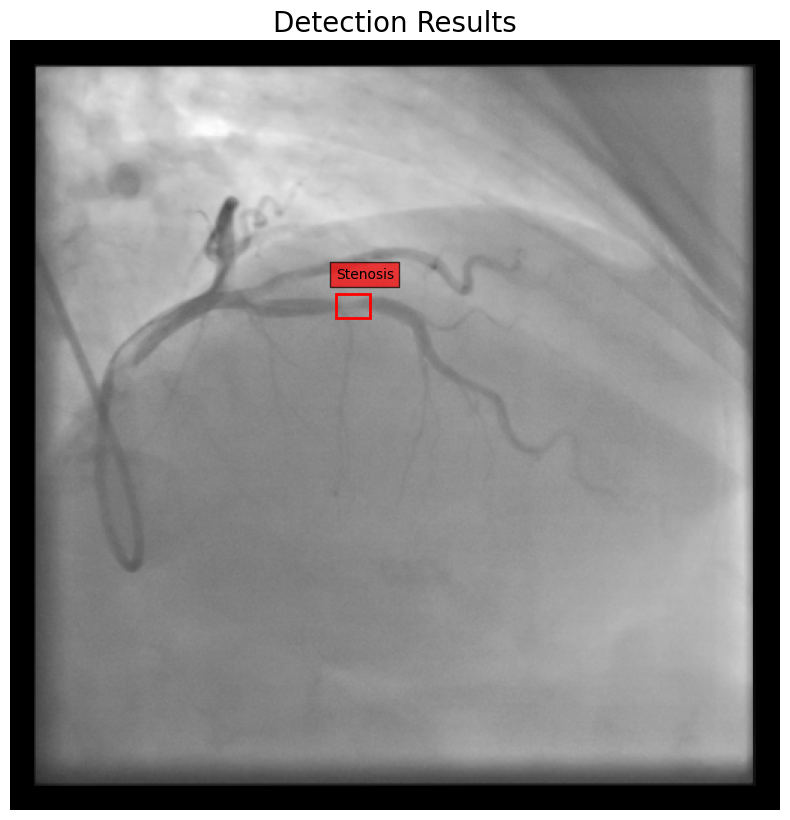

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def display_image_with_boxes(img_path, boxes, labels, scores, threshold=0.5):
    img = Image.open(img_path).convert("RGB")
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img)

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box
            width, height = xmax - xmin, ymax - ymin
            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(xmin, ymin - 10, 'Stenosis', fontsize=10, color='black', bbox=dict(facecolor='red', alpha=0.7))

    ax.set_title('Detection Results', fontsize=20)
    ax.axis('off')  # Hide axis
    plt.show()

# Use the uploaded image file
img_path = '/content/drive/MyDrive/po/test_images/14_002_5_0021.bmp'
pred_boxes, pred_labels, pred_scores = get_prediction(model, img_path, threshold=0.5)

print(f"Predicted boxes: {pred_boxes}")
print(f"Predicted labels: {pred_labels}")
print(f"Predicted scores: {pred_scores}")

display_image_with_boxes(img_path, pred_boxes, pred_labels, pred_scores, threshold=0.5)


In [ ]:
import os
import torch
import torchvision.transforms as T
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from PIL import Image

# Function to load the model with ResNet-101 backbone
def load_model(model_path, num_classes):
    # Load pre-trained Faster R-CNN model with ResNet-101 backbone
    backbone = resnet_fpn_backbone('resnet50', pretrained=True)
    model = FasterRCNN(backbone, num_classes=num_classes)

    # Load the model weights
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Load the model
model_path = '/content/drive/MyDrive/faster_rcnn_resnet50.pth'  # Ensure this path is correct
num_classes = 2  # 1 class (stenosis) + background
model = load_model(model_path, num_classes)

# Define the transformation
transform = T.Compose([T.ToTensor()])

# Function to make predictions on a single image
def get_prediction(model, img_path, threshold=0.3):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    img = Image.open(img_path).convert("RGB")
    img = transform(img).to(device)
    model.eval()
    with torch.no_grad():
        prediction = model([img])
    pred_boxes = prediction[0]['boxes'].cpu().numpy()
    pred_scores = prediction[0]['scores'].cpu().numpy()
    pred_labels = prediction[0]['labels'].cpu().numpy()

    pred_t = [i for i, x in enumerate(pred_scores) if x >= threshold]

    if len(pred_t) == 0:
        return [], [], []

    pred_boxes = pred_boxes[pred_t]
    pred_scores = pred_scores[pred_t]
    pred_labels = pred_labels[pred_t]
    return pred_boxes, pred_labels, pred_scores

# Example usage
img_path = '/content/drive/MyDrive/po/test_images/14_002_5_0021.bmp'  # Change to your image path
pred_boxes, pred_labels, pred_scores = get_prediction(model, img_path, threshold=0.5)

print(f"Predicted boxes: {pred_boxes}")
print(f"Predicted labels: {pred_labels}")
print(f"Predicted scores: {pred_scores}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 62.2MB/s]


Predicted boxes: [[217.48364 168.90181 238.2861  183.72893]]
Predicted labels: [1]
Predicted scores: [0.9693737]


Predicted boxes: [[217.48364 168.90181 238.2861  183.72893]]
Predicted labels: [1]
Predicted scores: [0.9693737]


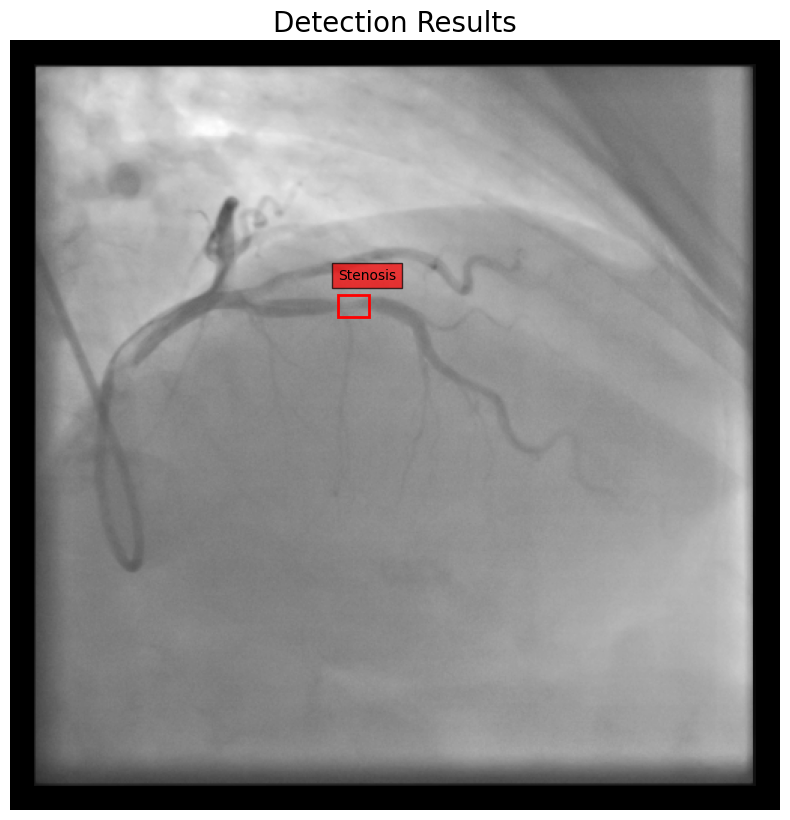

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def display_image_with_boxes(img_path, boxes, labels, scores, threshold=0.5):
    img = Image.open(img_path).convert("RGB")
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img)

    for box, label, score in zip(boxes, labels, scores):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box
            width, height = xmax - xmin, ymax - ymin
            rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            plt.text(xmin, ymin - 10, 'Stenosis', fontsize=10, color='black', bbox=dict(facecolor='red', alpha=0.7))

    ax.set_title('Detection Results', fontsize=20)
    ax.axis('off')  # Hide axis
    plt.show()

# Use the uploaded image file
img_path = '/content/drive/MyDrive/po/test_images/14_002_5_0021.bmp'
pred_boxes, pred_labels, pred_scores = get_prediction(model, img_path, threshold=0.5)

print(f"Predicted boxes: {pred_boxes}")
print(f"Predicted labels: {pred_labels}")
print(f"Predicted scores: {pred_scores}")

display_image_with_boxes(img_path, pred_boxes, pred_labels, pred_scores, threshold=0.5)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 77.9MB/s]


Found 833 images and 833 annotations.


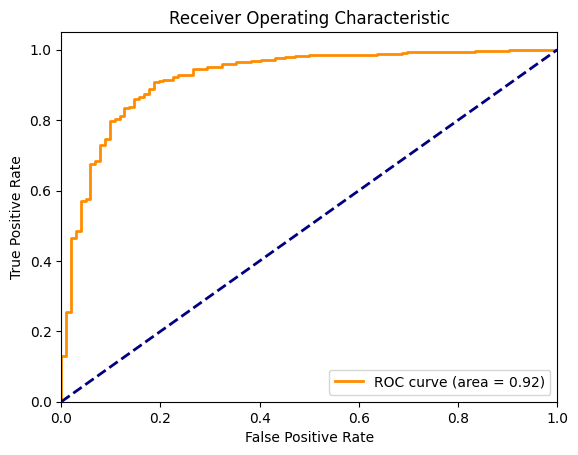

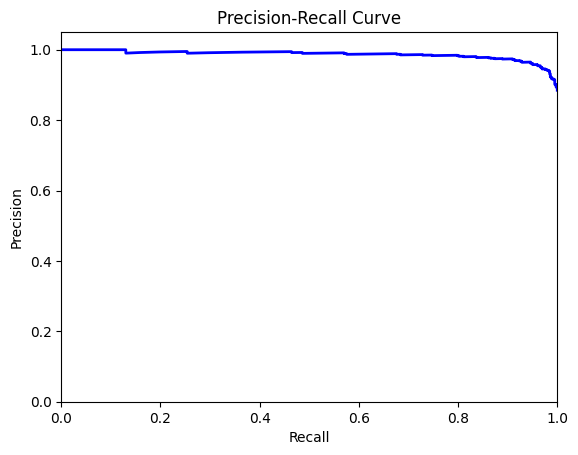

Average Precision: 0.9062
Average Recall: 0.9412
Average F1 Score: 0.9174
Average mAP: 0.9412
ROC AUC: 0.9221


In [6]:
import os
import warnings  # To suppress warnings
import torch
import torchvision.transforms as T
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from sklearn.metrics import average_precision_score, roc_curve, auc, precision_recall_curve
from PIL import Image
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Function to load the model with ResNet-50 backbone
def load_model(model_path, num_classes):
    # Load pre-trained Faster R-CNN model with ResNet-50 backbone
    backbone = resnet_fpn_backbone('resnet50', pretrained=True)
    model = FasterRCNN(backbone, num_classes=num_classes)

    # Load the model weights
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Load the model
model_path = '/content/drive/MyDrive/faster_rcnn_resnet50.pth'  # Ensure this path is correct
num_classes = 2  # 1 class (stenosis) + background
model = load_model(model_path, num_classes)

# Define the transformation
transform = T.Compose([T.ToTensor()])

# Function to make predictions on a single image
def get_prediction(model, img_path, threshold=0.3):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    img = Image.open(img_path).convert("RGB")
    img = transform(img).to(device)
    with torch.no_grad():
        prediction = model([img])
    pred_boxes = prediction[0]['boxes'].cpu().numpy()
    pred_scores = prediction[0]['scores'].cpu().numpy()
    pred_labels = prediction[0]['labels'].cpu().numpy()

    pred_t = [i for i, x in enumerate(pred_scores) if x >= threshold]

    if len(pred_t) == 0:
        return [], [], []

    pred_boxes = pred_boxes[pred_t]
    pred_scores = pred_scores[pred_t]
    pred_labels = pred_labels[pred_t]
    return pred_boxes, pred_labels, pred_scores

# Function to compute IoU
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1p, y1p, x2p, y2p = box2

    xi1 = max(x1, x1p)
    yi1 = max(y1, y1p)
    xi2 = min(x2, x2p)
    yi2 = min(y2, y2p)
    inter_area = max(0, xi2 - xi1 + 1) * max(0, yi2 - yi1 + 1)

    box1_area = (x2 - x1 + 1) * (y2 - y1 + 1)
    box2_area = (x2p - x1p + 1) * (y2p - y1p + 1)
    union_area = box1_area + box2_area - inter_area

    iou = inter_area / union_area
    return iou

# Function to calculate metrics and plot AU ROC and PR curves
def calculate_metrics_and_plot_roc_pr(images_dir, annotations_dir, model, iou_threshold=0.5, threshold=0.5):
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    total_mAP = 0
    total_iou = 0
    count = 0

    all_true_labels = []
    all_pred_scores = []

    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.bmp')]
    annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.xml')]

    print(f"Found {len(image_files)} images and {len(annotation_files)} annotations.")

    for img_name in image_files:
        img_path = os.path.join(images_dir, img_name)
        if not os.path.exists(img_path):
            print(f"Image file {img_path} not found.")
            continue

        true_boxes = []  # To store true boxes for the current image
        # Load true boxes from XML annotation
        xml_name = os.path.splitext(img_name)[0] + '.xml'
        xml_path = os.path.join(annotations_dir, xml_name)
        if not os.path.exists(xml_path):
            print(f"Annotation file {xml_path} not found.")
            continue

        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            true_boxes.append([xmin, ymin, xmax, ymax])

        # Get predictions
        pred_boxes, pred_labels, pred_scores = get_prediction(model, img_path, threshold)

        matched = set()
        TP = 0
        FP = 0
        FN = 0
        image_iou_sum = 0
        for pred_box, pred_label, pred_score in zip(pred_boxes, pred_labels, pred_scores):
            found_match = False
            for i, true_box in enumerate(true_boxes):
                if i in matched:
                    continue
                iou = compute_iou(pred_box, true_box)
                if iou >= iou_threshold:
                    TP += 1
                    matched.add(i)
                    found_match = True
                    image_iou_sum += iou
                    break
            if not found_match:
                FP += 1

        FN = len(true_boxes) - len(matched)

        if TP + FP == 0 and FN == 0:
            print(f"No true or predicted boxes found for {img_name}.")
            continue

        # Calculate precision, recall, and F1 score for this image
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        # Calculate average IoU for this image
        avg_iou = image_iou_sum / TP if TP > 0 else 0

        # Append results to calculate mAP
        y_true = [1] * TP + [0] * FP
        y_scores = [1] * TP + [0] * FP  # Using 1 and 0 as dummy scores
        if len(y_true) > 0 and len(y_scores) > 0:
            mAP = average_precision_score(y_true, y_scores)
        else:
            mAP = 0

        # Accumulate metrics
        total_precision += precision
        total_recall += recall
        total_f1 += f1
        total_mAP += mAP
        total_iou += avg_iou
        count += 1

        # Collect scores for ROC and PR curves
        all_true_labels.extend([1] * TP + [0] * FP)
        all_pred_scores.extend(pred_scores)

    if count == 0:
        raise ValueError("No images were processed successfully.")

    # Calculate average metrics
    avg_precision = total_precision / count
    avg_recall = total_recall / count
    avg_f1 = total_f1 / count
    avg_mAP = total_mAP / count
    avg_iou = total_iou / count

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(all_true_labels, all_pred_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(all_true_labels, all_pred_scores)

    # Plot Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    return avg_precision, avg_recall, avg_f1, avg_mAP, roc_auc, avg_iou

# Set directories
test_images_dir = '/content/drive/MyDrive/po/test_images'
test_annotations_dir = '/content/drive/MyDrive/po/test_ann'

# Calculate metrics and plot ROC and PR curves
avg_precision, avg_recall, avg_f1, avg_mAP, roc_auc, avg_iou = calculate_metrics_and_plot_roc_pr(test_images_dir, test_annotations_dir, model, iou_threshold=0.5, threshold=0.5)
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average mAP: {avg_mAP:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Found 833 images and 833 annotations.


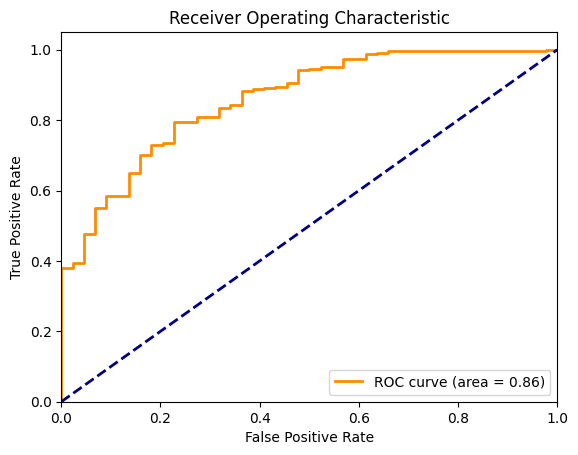

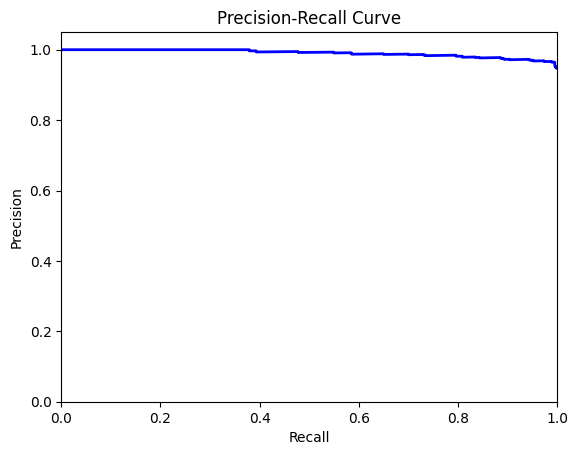

Average Precision: 0.9382
Average Recall: 0.9532
Average F1 Score: 0.9432
Average mAP: 0.9532
ROC AUC: 0.8587


In [7]:
import os
import torch
import torchvision.transforms as T
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from sklearn.metrics import average_precision_score, roc_curve, auc, precision_recall_curve
from PIL import Image
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


# Function to load the model with ResNet-101 backbone
def load_model(model_path, num_classes):
    # Load pre-trained Faster R-CNN model with ResNet-101 backbone
    backbone = resnet_fpn_backbone('resnet101', pretrained=True)
    model = FasterRCNN(backbone, num_classes=num_classes)

    # Load the model weights
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Load the model
model_path = '/content/drive/MyDrive/faster_rcnn_resnet101.pth'  # Ensure this path is correct
num_classes = 2  # 1 class (stenosis) + background
model = load_model(model_path, num_classes)

# Define the transformation
transform = T.Compose([T.ToTensor()])

# Function to make predictions on a single image
def get_prediction(model, img_path, threshold=0.3):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    img = Image.open(img_path).convert("RGB")
    img = transform(img).to(device)
    with torch.no_grad():
        prediction = model([img])
    pred_boxes = prediction[0]['boxes'].cpu().numpy()
    pred_scores = prediction[0]['scores'].cpu().numpy()
    pred_labels = prediction[0]['labels'].cpu().numpy()

    pred_t = [i for i, x in enumerate(pred_scores) if x >= threshold]

    if len(pred_t) == 0:
        return [], [], []

    pred_boxes = pred_boxes[pred_t]
    pred_scores = pred_scores[pred_t]
    pred_labels = pred_labels[pred_t]
    return pred_boxes, pred_labels, pred_scores

# Function to compute IoU
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1p, y1p, x2p, y2p = box2

    xi1 = max(x1, x1p)
    yi1 = max(y1, y1p)
    xi2 = min(x2, x2p)
    yi2 = min(y2, y2p)
    inter_area = max(0, xi2 - xi1 + 1) * max(0, yi2 - yi1 + 1)

    box1_area = (x2 - x1 + 1) * (y2 - y1 + 1)
    box2_area = (x2p - x1p + 1) * (y2p - y1p + 1)
    union_area = box1_area + box2_area - inter_area

    iou = inter_area / union_area
    return iou

# Function to calculate metrics and plot AU ROC and PR curves
def calculate_metrics_and_plot_roc_pr(images_dir, annotations_dir, model, iou_threshold=0.5, threshold=0.5):
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    total_mAP = 0
    total_iou = 0
    count = 0

    all_true_labels = []
    all_pred_scores = []

    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.bmp')]
    annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.xml')]

    print(f"Found {len(image_files)} images and {len(annotation_files)} annotations.")

    for img_name in image_files:
        img_path = os.path.join(images_dir, img_name)
        if not os.path.exists(img_path):
            print(f"Image file {img_path} not found.")
            continue

        true_boxes = []  # To store true boxes for the current image
        # Load true boxes from XML annotation
        xml_name = os.path.splitext(img_name)[0] + '.xml'
        xml_path = os.path.join(annotations_dir, xml_name)
        if not os.path.exists(xml_path):
            print(f"Annotation file {xml_path} not found.")
            continue

        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            true_boxes.append([xmin, ymin, xmax, ymax])

        # Get predictions
        pred_boxes, pred_labels, pred_scores = get_prediction(model, img_path, threshold)

        matched = set()
        TP = 0
        FP = 0
        FN = 0
        image_iou_sum = 0
        for pred_box, pred_label, pred_score in zip(pred_boxes, pred_labels, pred_scores):
            found_match = False
            for i, true_box in enumerate(true_boxes):
                if i in matched:
                    continue
                iou = compute_iou(pred_box, true_box)
                if iou >= iou_threshold:
                    TP += 1
                    matched.add(i)
                    found_match = True
                    image_iou_sum += iou
                    break
            if not found_match:
                FP += 1

        FN = len(true_boxes) - len(matched)

        if TP + FP == 0 and FN == 0:
            print(f"No true or predicted boxes found for {img_name}.")
            continue

        # Calculate precision, recall, and F1 score for this image
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        # Calculate average IoU for this image
        avg_iou = image_iou_sum / TP if TP > 0 else 0

        # Append results to calculate mAP
        y_true = [1] * TP + [0] * FP
        y_scores = [1] * TP + [0] * FP  # Using 1 and 0 as dummy scores
        if len(y_true) > 0 and len(y_scores) > 0:
            mAP = average_precision_score(y_true, y_scores)
        else:
            mAP = 0

        # Accumulate metrics
        total_precision += precision
        total_recall += recall
        total_f1 += f1
        total_mAP += mAP
        total_iou += avg_iou
        count += 1

        # Collect scores for ROC and PR curves
        all_true_labels.extend([1] * TP + [0] * FP)
        all_pred_scores.extend(pred_scores)

    if count == 0:
        raise ValueError("No images were processed successfully.")

    # Calculate average metrics
    avg_precision = total_precision / count
    avg_recall = total_recall / count
    avg_f1 = total_f1 / count
    avg_mAP = total_mAP / count
    avg_iou = total_iou / count

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(all_true_labels, all_pred_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(all_true_labels, all_pred_scores)

    # Plot Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    return avg_precision, avg_recall, avg_f1, avg_mAP, roc_auc, avg_iou

# Set directories
test_images_dir = '/content/drive/MyDrive/po/test_images'
test_annotations_dir = '/content/drive/MyDrive/po/test_ann'

# Calculate metrics and plot ROC and PR curves
avg_precision, avg_recall, avg_f1, avg_mAP, roc_auc, avg_iou = calculate_metrics_and_plot_roc_pr(test_images_dir, test_annotations_dir, model, iou_threshold=0.5, threshold=0.5)
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average mAP: {avg_mAP:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
